<a href="https://colab.research.google.com/github/ralphkp/7192416_APIs_DRF/blob/main/PredictEbolaTPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import openpyxl
import seaborn as sns
import os
import matplotlib.pyplot as plt
# Montez votre Google Drive
from google.colab import drive
# Spécifiez le chemin du fichier Excel sur votre Google Drive
file_path = '/content/drive/MyDrive/DataEbola/data4.csv'



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(file_path)

In [4]:
df.shape

(20000, 45)

In [5]:
df.head()

IDNational             Nom   Prénom  Age GROUPAGE Préfecture  \
0           1    Diallo Sekou    Sekou    9     < 15  Gueckedou   
1           2      Dabo Sekou    Sekou   10  15 - 75     Gaoual   
2           3    Dabo Aminata  Aminata    3     < 15    Siguiri   
3           4  Diallo Mariama  Mariama    7     < 15     Kindia   
4           5    Dabo Mariama  Mariama   65  15 - 75      Coyah   

  Sous-Préfecture  Datenotif  sortidate  \
0       Gueckedou  04-Jul-15  25-Oct-16   
1   Gaoual-Centre  28-Sep-14  08-Mar-14   
2        Mandiana  28-Jan-15  14-Jun-16   
3   Kindia-Centre  23-Mar-14  17-Mar-14   
4     Coyah Rural  22-Mar-16  14-Jun-14   

                                           Symptômes  ...  Congestion nasale  \
0                                                NaN  ...                Non   
1  Fatigue extrême et faiblesse générale, Hémorra...  ...                Non   
2                                                NaN  ...                Non   
3  Douleurs abdominales intenses, Insuffisance ré...  ...                Non   
4  Douleurs abdominales intenses, Fatigue extrême...  ...                Non   

   Éternuements  Toux  Nausées  Vomissements  Diarrhée Éruption cutanée  \
0           Non   Non      Non           Non       Non              Non   
1           Non   Non      Non           Non       Oui              Non   
2           Non   Non      Non           Non       Non              Non   
3           Non   Non      Non           Oui       Non              Oui   
4           Non   Non      Non           Non       Non              Non   

   Douleurs abdominales Difficulté à respirer Vertiges  
0                   Non                   Non      Non  
1                   Oui                   Non      Non  
2                   Non                   Non      Non  
3                   Oui                   Non      Non  
4                   Oui                   Non      Non  

[5 rows x 45 columns]

<Axes: >

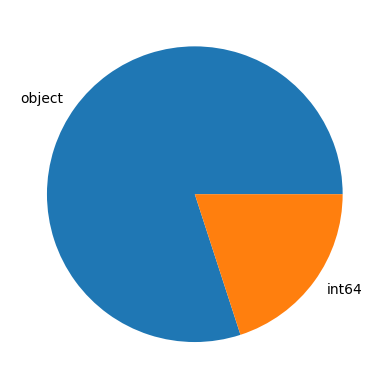

In [6]:
# visualiser la répartition des types de données

df.dtypes.value_counts().plot.pie()


<Axes: >

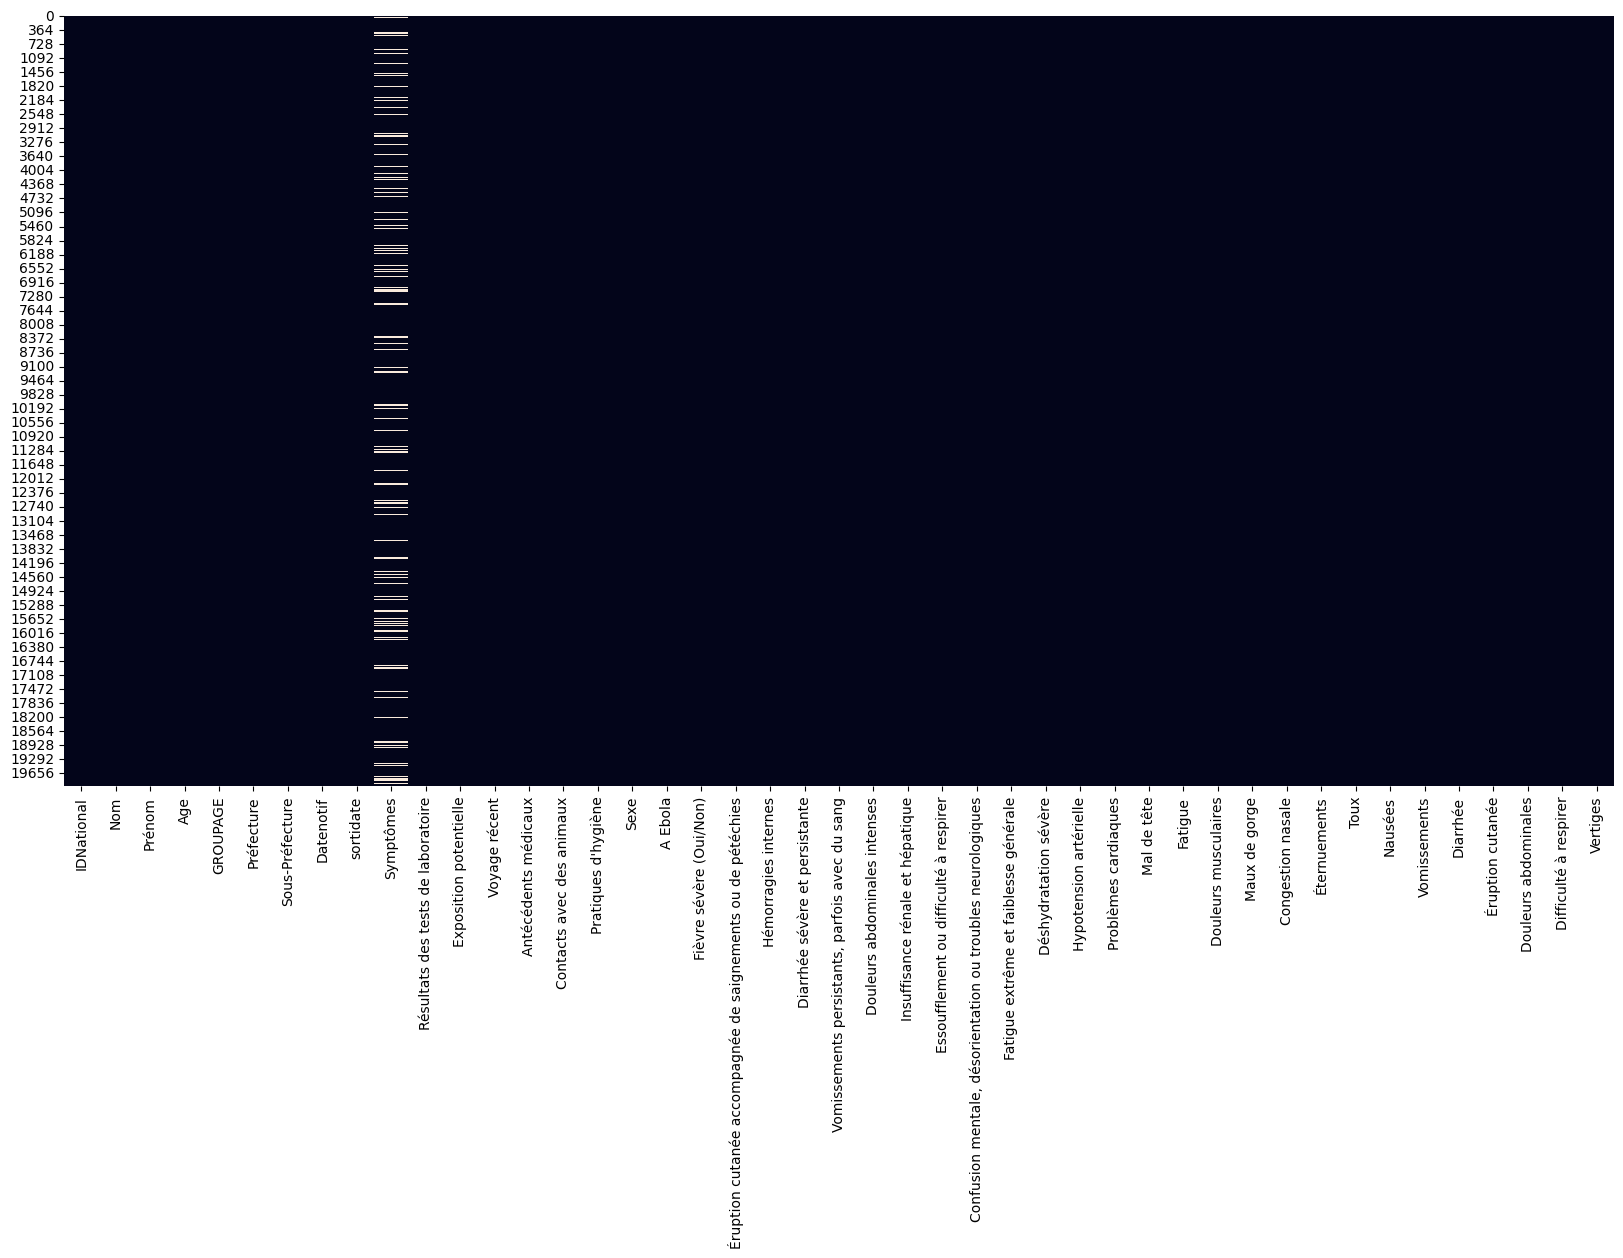

In [7]:
# visualiser les valeurs manquantes dans le DataFrame  figure pour ajuster la vue
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
# Vérifier s'il y a des valeurs manquantes dans le DataFrame
# if df.isna().any().any():
 #    print("Il y a des valeurs manquantes dans le DataFrame.")
# else:
#     print("Il n'y a pas de valeurs manquantes dans le DataFrame.")


In [8]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

IDNational                                                     0.00000
Insuffisance rénale et hépatique                               0.00000
Essoufflement ou difficulté à respirer                         0.00000
Confusion mentale, désorientation ou troubles neurologiques    0.00000
Fatigue extrême et faiblesse générale                          0.00000
Déshydratation sévère                                          0.00000
Hypotension artérielle                                         0.00000
Problèmes cardiaques                                           0.00000
Mal de tête                                                    0.00000
Fatigue                                                        0.00000
Douleurs musculaires                                           0.00000
Maux de gorge                                                  0.00000
Congestion nasale                                              0.00000
Éternuements                                                   0.00000
Toux  

In [9]:
# Supprimer les lignes avec des valeurs manquantes et créer un nouveau DataFrame
df = df.dropna()

# Afficher les informations sur le nouveau DataFrame
print("DataFrame original:", df.shape)
print("Nouveau DataFrame sans valeurs manquantes:", df.shape)

DataFrame original: (17187, 45)
Nouveau DataFrame sans valeurs manquantes: (17187, 45)


<Axes: >

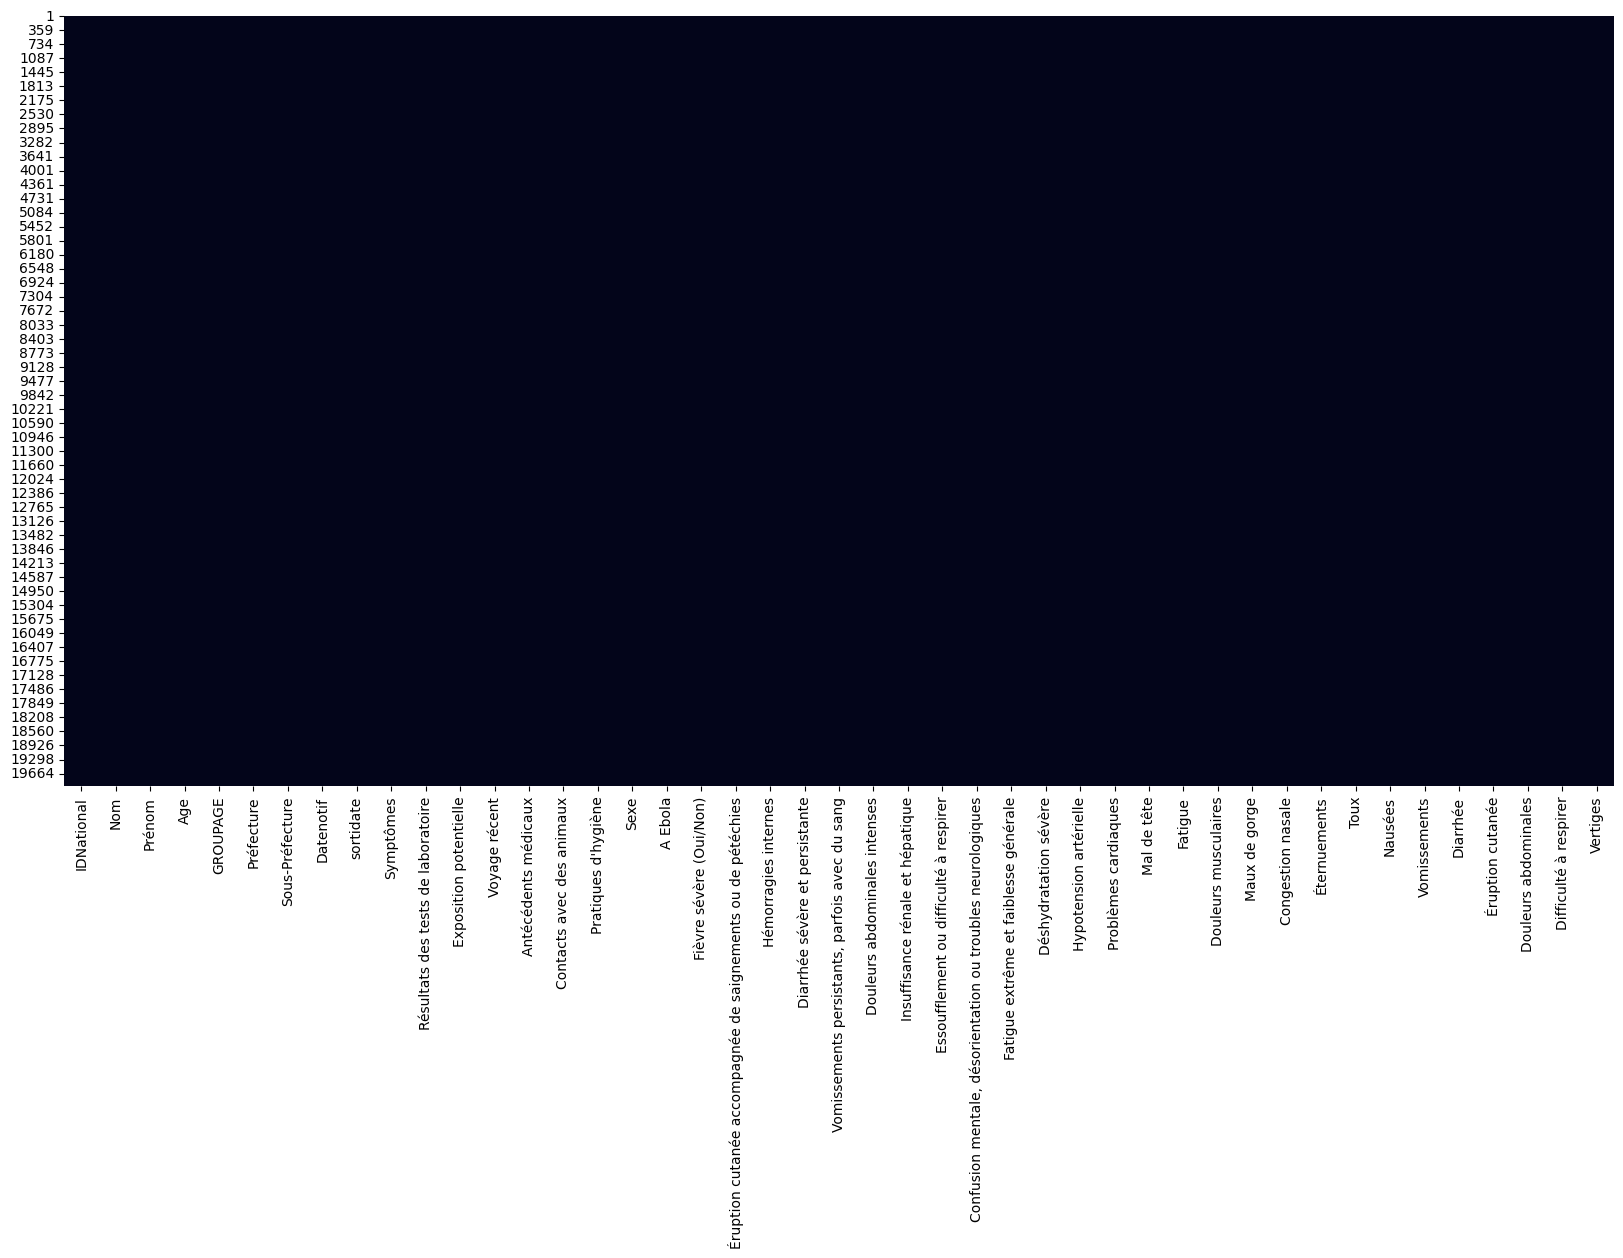

In [10]:
# visualiser les valeurs manquantes dans le DataFrame  figure pour ajuster la vue
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
# Vérifier s'il y a des valeurs manquantes dans le DataFrame
# if df.isna().any().any():
 #    print("Il y a des valeurs manquantes dans le DataFrame.")
# else:
#     print("Il n'y a pas de valeurs manquantes dans le DataFrame.")

In [11]:
# Suppression de certaines variables moins pertinent
variables_a_supprimer = ['IDNational']
df = df.drop(variables_a_supprimer, axis=1)
variables_a_supprimer = ['GROUPAGE']
df = df.drop(variables_a_supprimer, axis=1)
variables_a_supprimer = ['Sous-Préfecture']
df = df.drop(variables_a_supprimer, axis=1)
# Suppression de certaines variables moins pertinent
variables_a_supprimer = ['Nom']
df = df.drop(variables_a_supprimer, axis=1)
variables_a_supprimer = ['Prénom']
df = df.drop(variables_a_supprimer, axis=1)
variables_a_supprimer = ['Datenotif']
df = df.drop(variables_a_supprimer, axis=1)
variables_a_supprimer = ['Symptômes']
df = df.drop(variables_a_supprimer, axis=1)
variables_a_supprimer = ['sortidate']
df = df.drop(variables_a_supprimer, axis=1)

In [12]:
df.head()

Age Préfecture  Résultats des tests de laboratoire  Exposition potentielle  \
1   10     Gaoual                                   1                       0   
3    7     Kindia                                   1                       0   
4   65      Coyah                                   1                       0   
5   43       Mali                                   1                       1   
6   53       Fria                                   0                       1   

   Voyage récent  Antécédents médicaux  Contacts avec des animaux  \
1              1                     1                          0   
3              1                     1                          1   
4              1                     1                          1   
5              0                     0                          0   
6              0                     0                          0   

   Pratiques d'hygiène Sexe  A Ebola  ... Congestion nasale Éternuements Toux  \
1                    1    M        0  ...               Non          Non  Non   
3                    0    F        1  ...               Non          Non  Non   
4                    0    F        0  ...               Non          Non  Non   
5                    0    F        0  ...               Non          Non  Non   
6                    1    F        0  ...               Non          Non  Non   

  Nausées Vomissements Diarrhée Éruption cutanée Douleurs abdominales  \
1     Non          Non      Oui              Non                  Oui   
3     Non          Oui      Non              Oui                  Oui   
4     Non          Non      Non              Non                  Oui   
5     Non          Non      Non              Non                  Non   
6     Non          Non      Non              Oui                  Oui   

  Difficulté à respirer Vertiges  
1                   Non      Non  
3                   Non      Non  
4                   Non      Non  
5                   Non      Non  
6                   Non      Non  

[5 rows x 37 columns]

In [13]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Préfecture---------------------------------------- ['Gaoual' 'Kindia' 'Coyah' 'Mali' 'Fria' 'Beyla' 'Forecariah' 'Yomou'
 'Dalaba' 'Boke' 'Dinguiraye' 'Kankan' 'Koundara' 'Dabola' 'Macenta'
 'Dubréka' 'Mamou' 'Faranah' 'Boffa' 'Siguiri' "N'Zérekoré" 'Lélouma'
 'Conakry' 'Mandiana' 'Gueckedou' 'Kouroussa' 'Koubia' 'Télimélé'
 'Kissidougou' 'Pita' 'Kérouané' 'Lola']
Sexe---------------------------------------------- ['M' 'F']
Fièvre sévère (Oui/Non)--------------------------- ['Non' 'Oui']
Éruption cutanée accompagnée de saignements ou de pétéchies ['Non' 'Oui']
Hémorragies internes------------------------------ ['Oui' 'Non']
Diarrhée sévère et persistante-------------------- ['Non' 'Oui']
Vomissements persistants, parfois avec du sang---- ['Non' 'Oui']
Douleurs abdominales intenses--------------------- ['Oui' 'Non']
Insuffisance rénale et hépatique------------------ ['Oui' 'Non']
Essoufflement ou difficulté à respirer------------ ['Non' 'Oui']
Confusion mentale, désorientation ou troubl

<ipython-input-14-5c82b7b87ccc>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


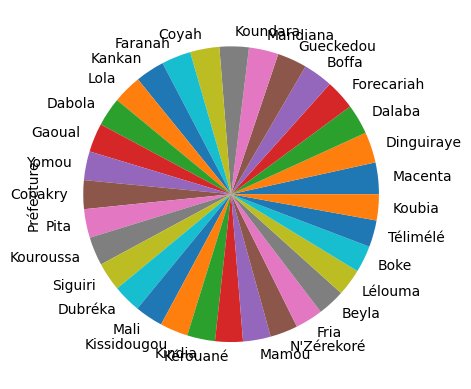

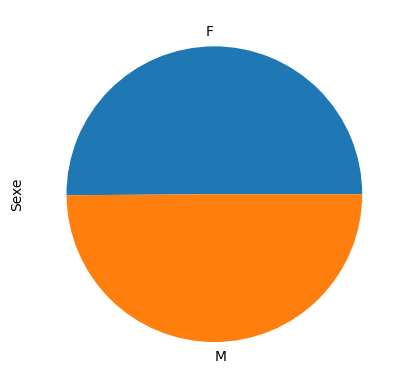

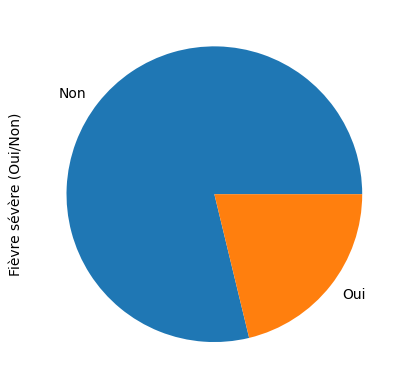

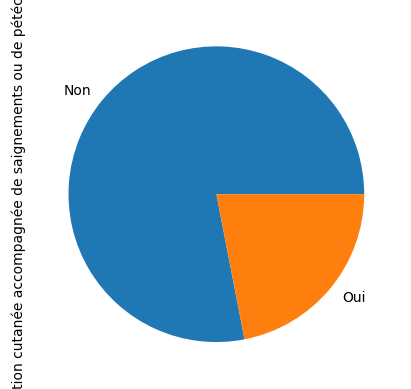

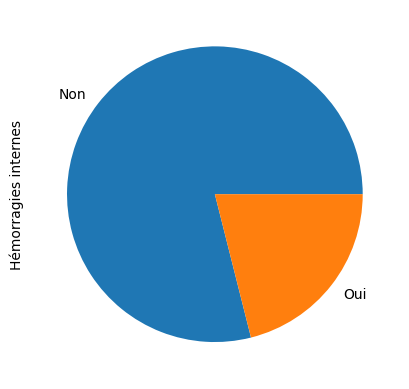

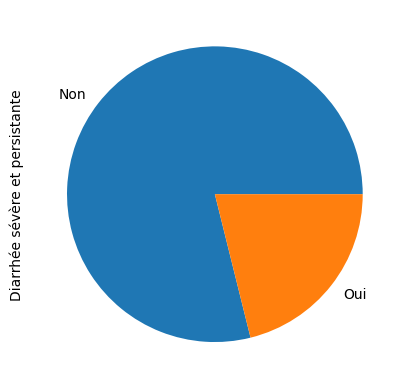

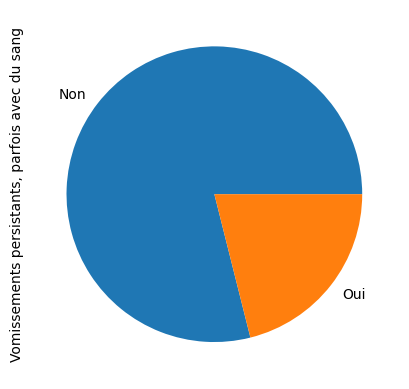

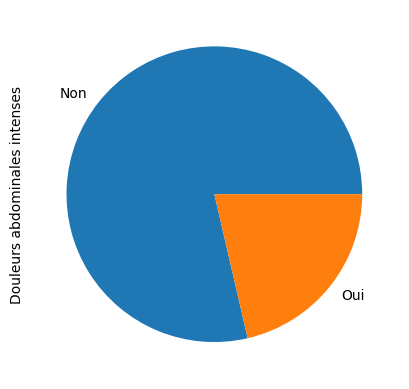

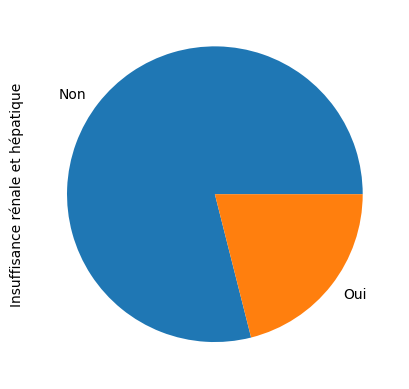

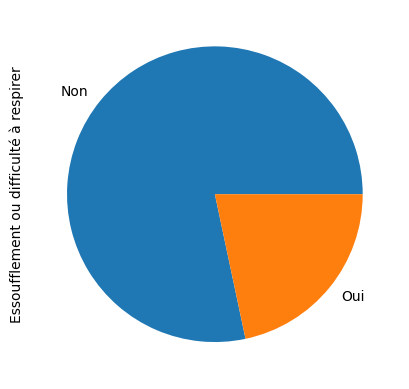

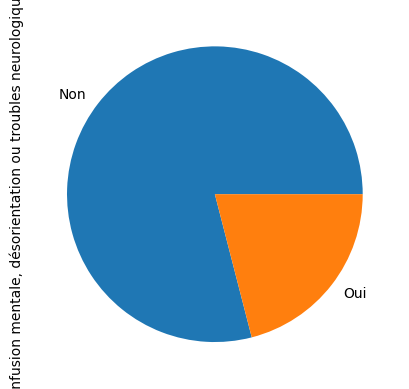

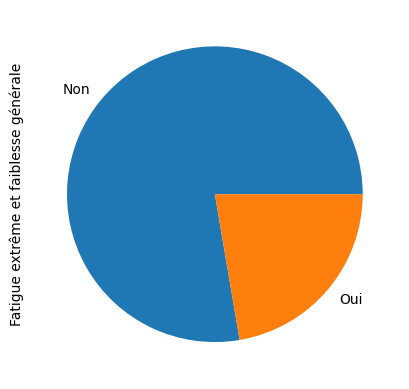

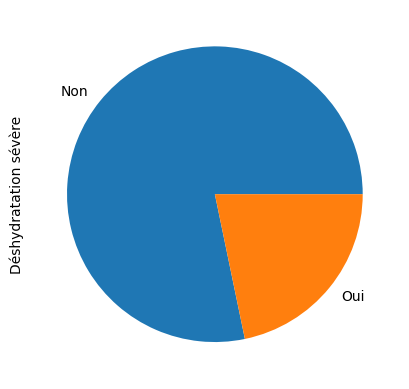

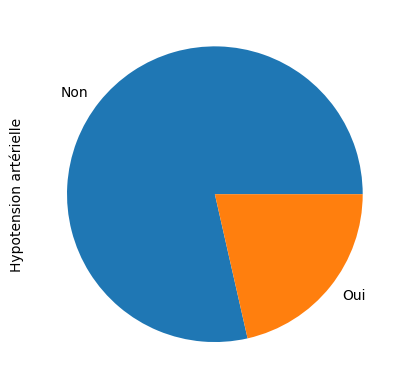

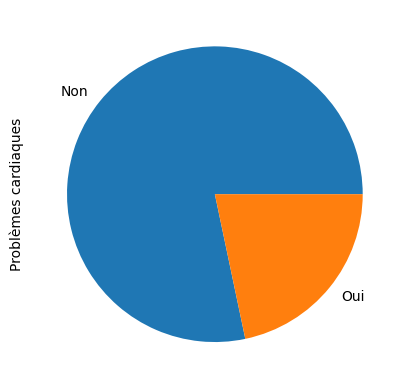

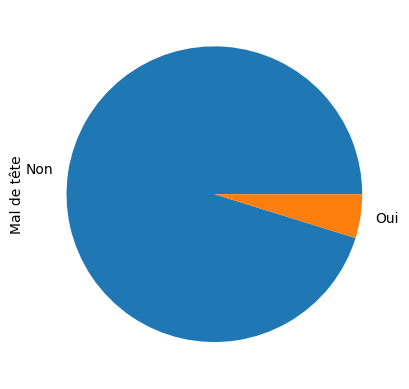

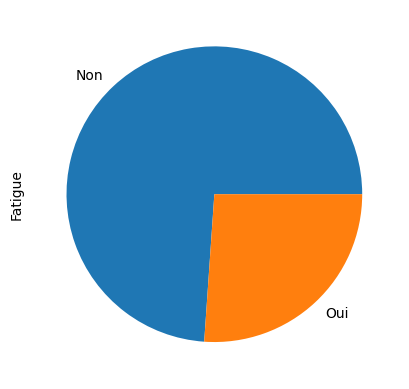

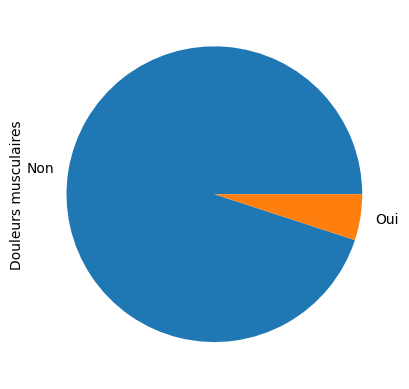

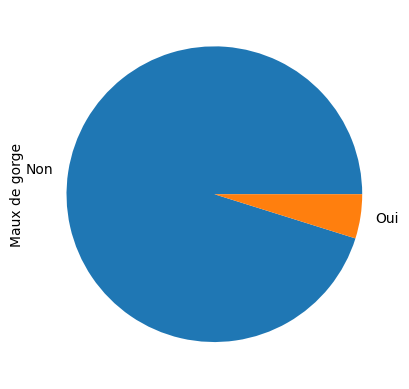

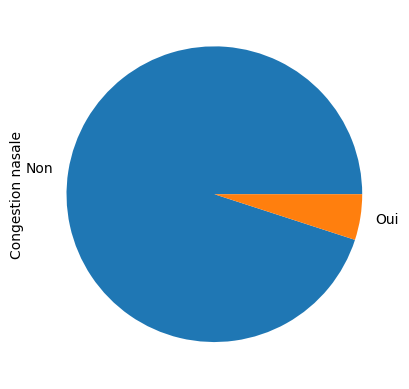

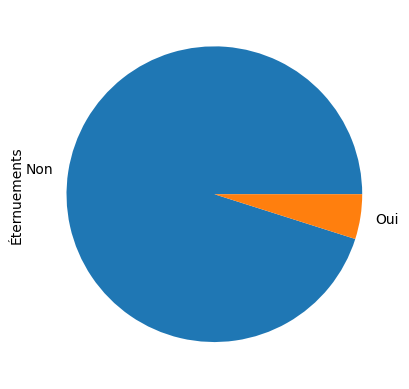

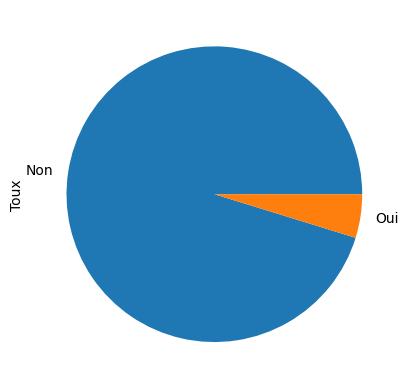

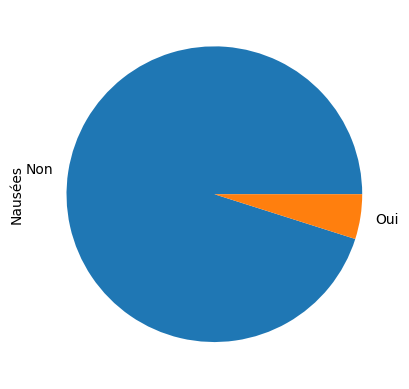

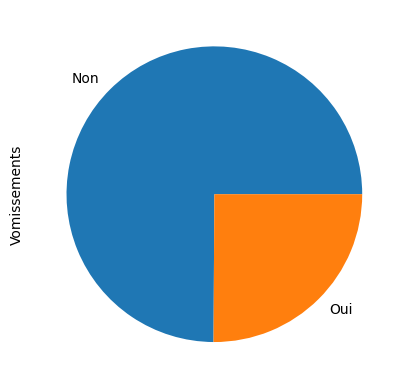

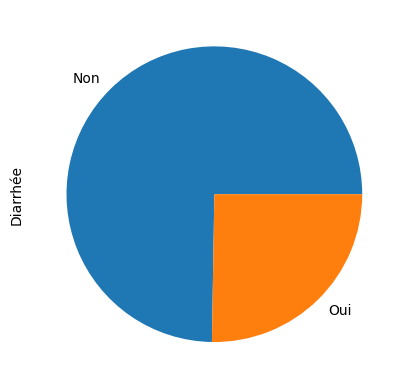

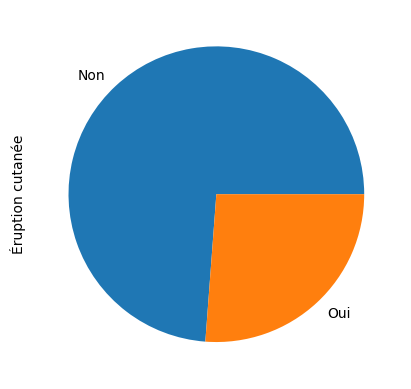

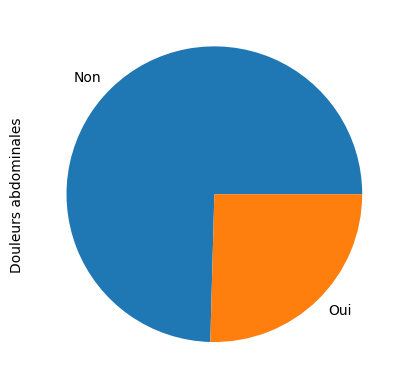

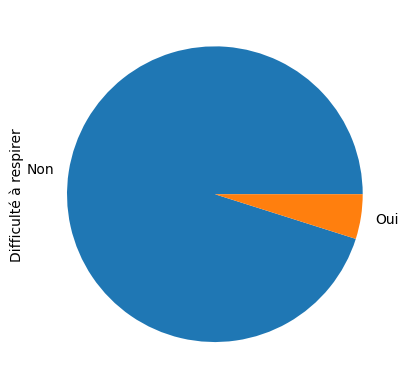

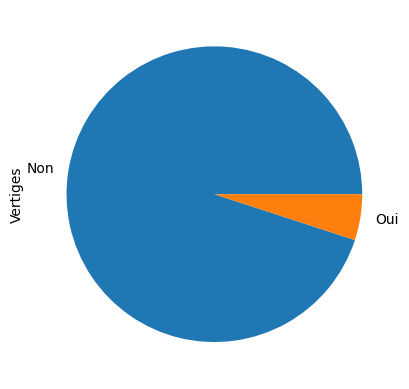

In [14]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

<ipython-input-15-7b4d61384baa>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()



Counts for variable Préfecture:
Macenta        594
Dinguiraye     578
Dalaba         565
Forecariah     561
Boffa          556
Gueckedou      555
Mandiana       555
Koundara       551
Coyah          550
Faranah        550
Kankan         547
Lola           545
Dabola         542
Gaoual         542
Yomou          541
Conakry        540
Pita           539
Kouroussa      537
Siguiri        536
Dubréka        529
Mali           528
Kissidougou    526
Kindia         524
Kérouané       521
Mamou          520
N'Zérekoré     520
Fria           519
Beyla          513
Lélouma        508
Boke           503
Télimélé       502
Koubia         490
Name: Préfecture, dtype: int64

Counts for variable Sexe:
F    8613
M    8574
Name: Sexe, dtype: int64

Counts for variable Fièvre sévère (Oui/Non):
Non    13540
Oui     3647
Name: Fièvre sévère (Oui/Non), dtype: int64

Counts for variable Éruption cutanée accompagnée de saignements ou de pétéchies:
Non    13415
Oui     3772
Name: Éruption cutanée accompagn

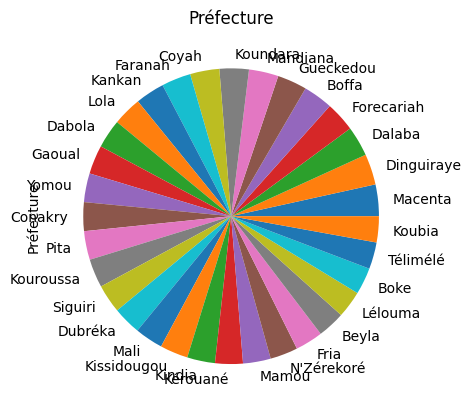

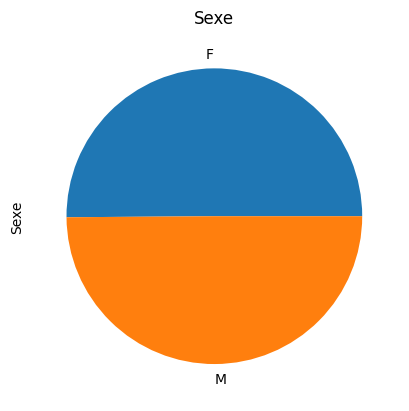

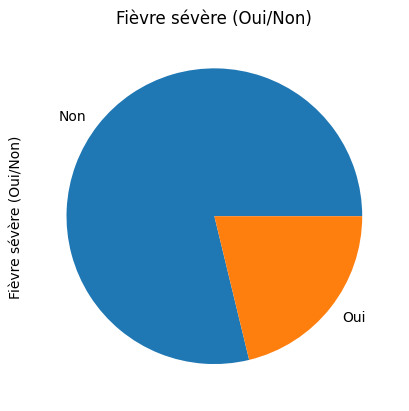

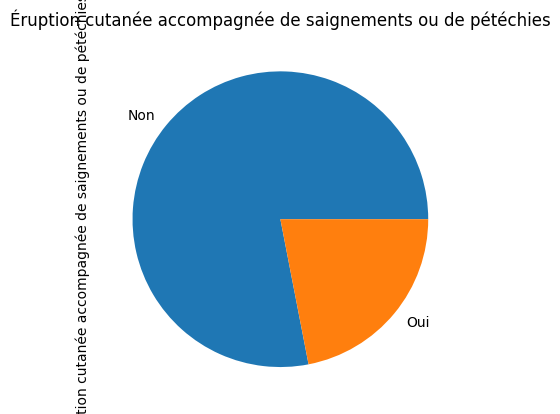

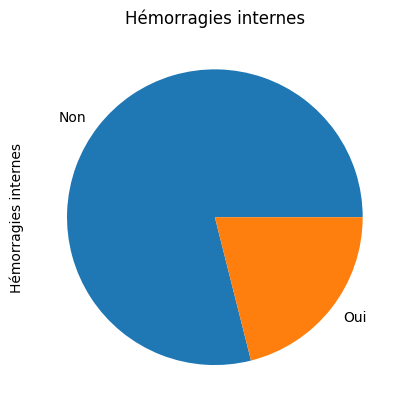

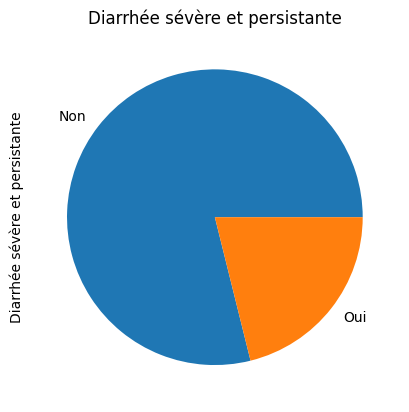

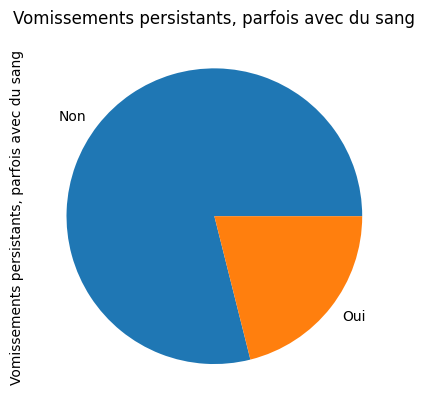

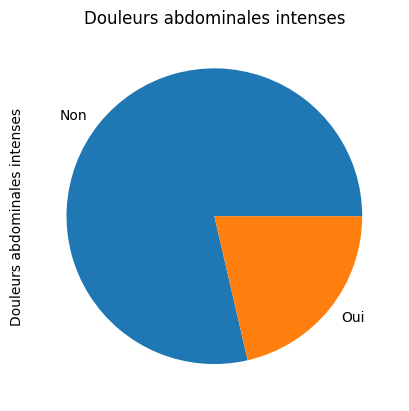

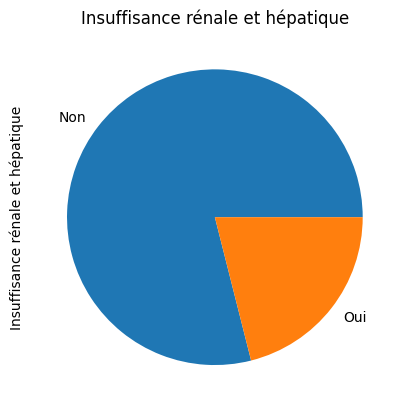

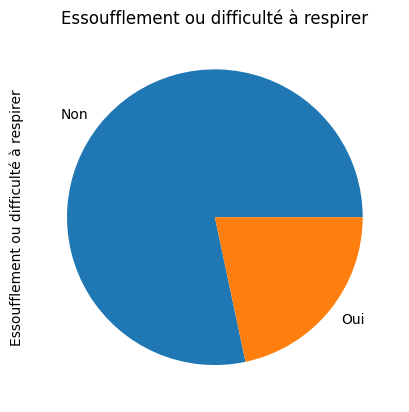

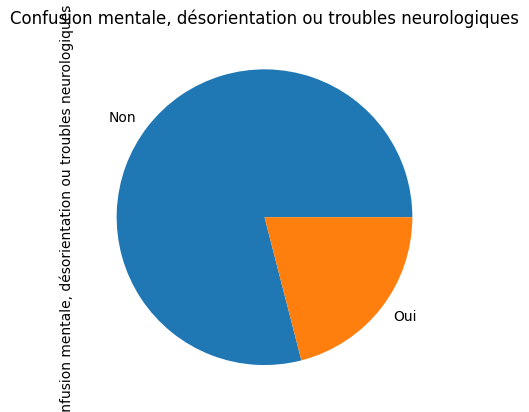

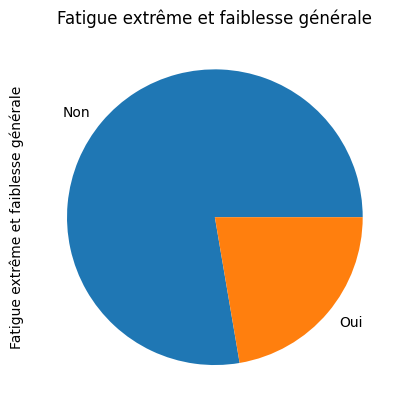

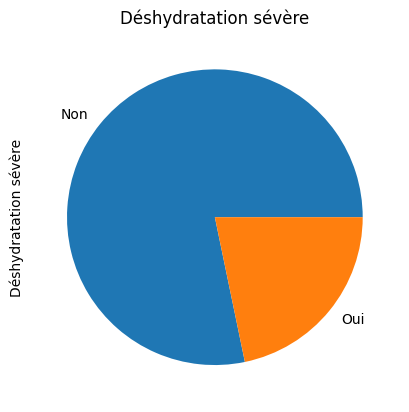

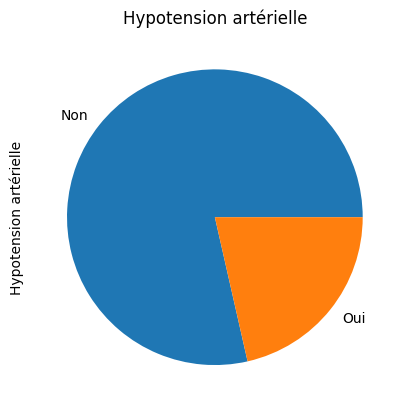

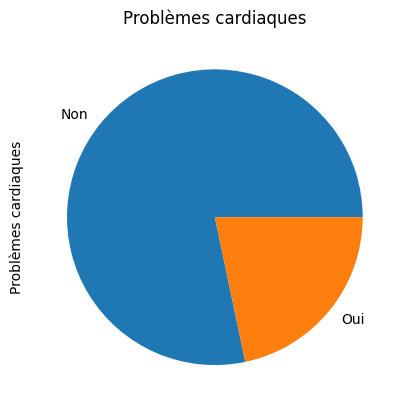

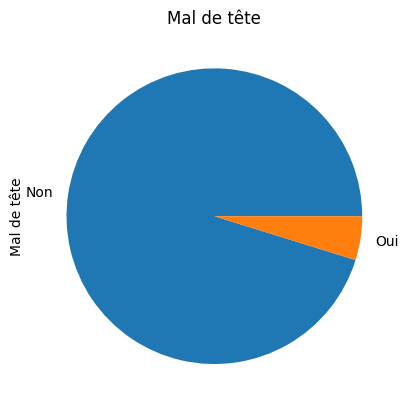

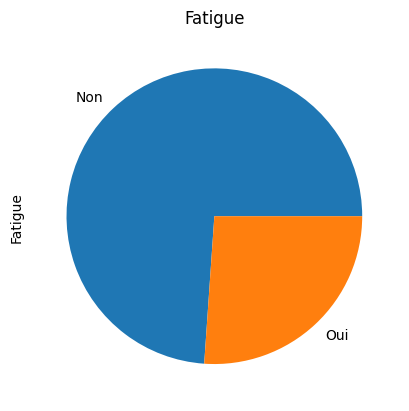

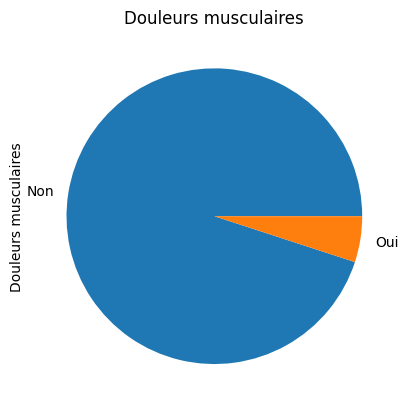

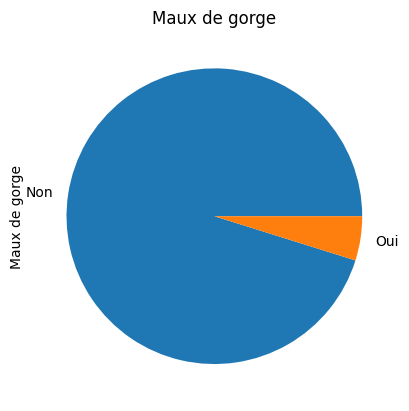

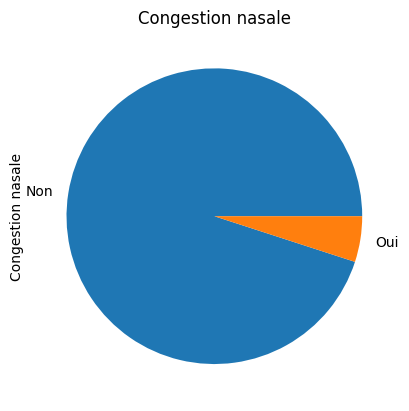

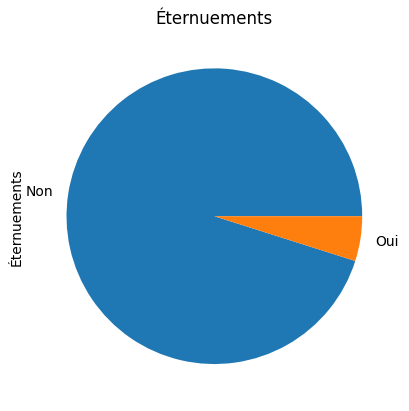

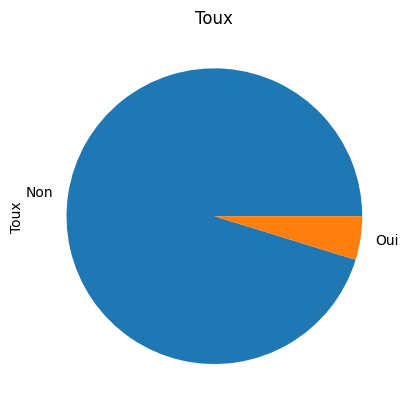

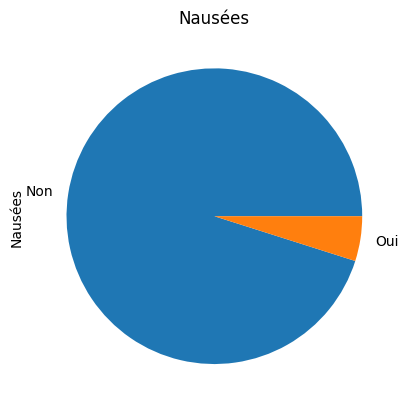

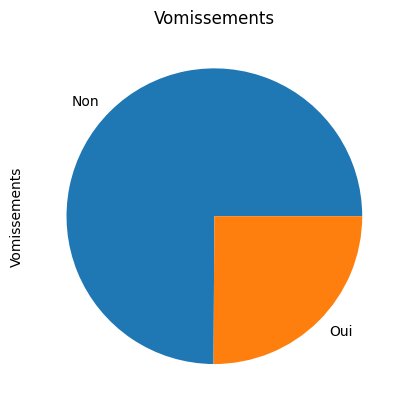

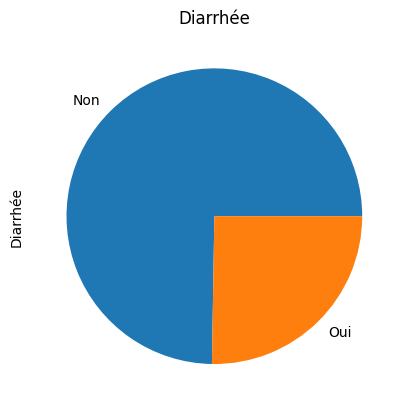

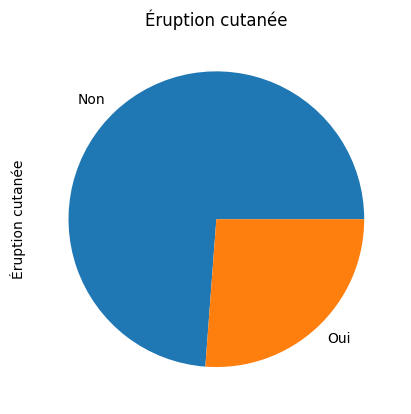

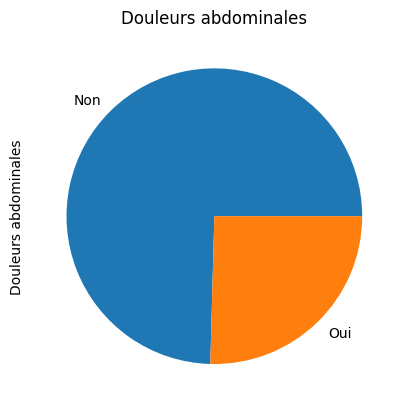

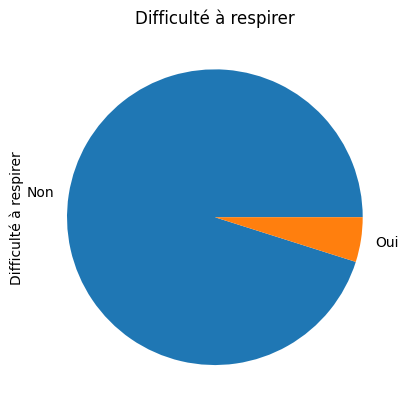

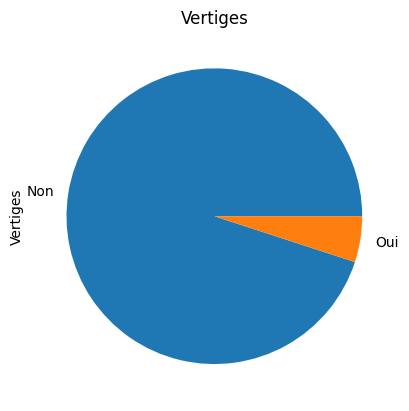

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df

# Créer un dictionnaire pour stocker les résultats
count_results = {}

# Parcourir chaque colonne de type 'object'
for col in df.select_dtypes('object'):
    # Compter les occurrences de chaque valeur
    value_counts = df[col].value_counts()

    # Stocker le résultat dans le dictionnaire
    count_results[col] = value_counts

    # Afficher le pie chart
    plt.figure()
    value_counts.plot.pie(title=col)

# Afficher le résultat global du comptage
for col, counts in count_results.items():
    print(f"\nCounts for variable {col}:\n{counts}")


In [16]:
df

Age Préfecture  Résultats des tests de laboratoire  \
1       10     Gaoual                                   1   
3        7     Kindia                                   1   
4       65      Coyah                                   1   
5       43       Mali                                   1   
6       53       Fria                                   0   
...    ...        ...                                 ...   
19994   32      Beyla                                   0   
19995   49   Télimélé                                   1   
19996    2   Koundara                                   0   
19997   55      Boffa                                   0   
19998   29     Kankan                                   1   

       Exposition potentielle  Voyage récent  Antécédents médicaux  \
1                           0              1                     1   
3                           0              1                     1   
4                           0              1                     1   
5                           1              0                     0   
6                           1              0                     0   
...                       ...            ...                   ...   
19994                       0              1                     1   
19995                       1              0                     0   
19996                       0              0                     1   
19997                       0              0                     0   
19998                       1              1                     0   

       Contacts avec des animaux  Pratiques d'hygiène Sexe  A Ebola  ...  \
1                              0                    1    M        0  ...   
3                              1                    0    F        1  ...   
4                              1                    0    F        0  ...   
5                              0                    0    F        0  ...   
6                              0                    1    F        0  ...   
...                          ...                  ...  ...      ...  ...   
19994                          0                    1    F        0  ...   
19995                          1                    0    M        1  ...   
19996                          0                    0    F        0  ...   
19997                          1                    0    M        1  ...   
19998                          1                    1    F        0  ...   

      Congestion nasale Éternuements Toux Nausées Vomissements Diarrhée  \
1                   Non          Non  Non     Non          Non      Oui   
3                   Non          Non  Non     Non          Oui      Non   
4                   Non          Non  Non     Non          Non      Non   
5                   Non          Non  Non     Non          Non      Non   
6                   Non          Non  Non     Non          Non      Non   
...                 ...          ...  ...     ...          ...      ...   
19994               Non          Non  Non     Non          Oui      Non   
19995               Non          Non  Oui     Non          Non      Non   
19996               Non          Non  Non     Non          Non      Non   
19997               Non          Non  Non     Non          Oui      Non   
19998               Non          Non  Non     Non          Non      Oui   

      Éruption cutanée Douleurs abdominales Difficulté à respirer Vertiges  
1                  Non                  Oui                   Non      Non  
3                  Oui                  Oui                   Non      Non  
4                  Non                  Oui                   Non      Non  
5                  Non                  Non                   Non      Non  
6                  Oui                  Oui                   Non      Non  
...                ...                  ...                   ...      ...  
19994              Non                  Non                   Non      Non  
199

In [17]:
# Remplacer les valeurs 'F' par 0 et 'M' par 1
df['Sexe'] = df['Sexe'].replace({'F': 0, 'M': 1})


In [18]:
# Créez un dictionnaire qui indique comment chaque catégorie doit être remplacée.
replacement_mapping = {'Oui': 1, 'Non': 0}

# Parcourez toutes les colonnes du DataFrame df
for column in df.columns:
    if df[column].dtype == 'object':
        # Vérifiez si la colonne est de type "object" (typiquement, une colonne catégorielle)
        df[column] = df[column].replace(replacement_mapping)

In [19]:
df.head()

Age Préfecture  Résultats des tests de laboratoire  Exposition potentielle  \
1   10     Gaoual                                   1                       0   
3    7     Kindia                                   1                       0   
4   65      Coyah                                   1                       0   
5   43       Mali                                   1                       1   
6   53       Fria                                   0                       1   

   Voyage récent  Antécédents médicaux  Contacts avec des animaux  \
1              1                     1                          0   
3              1                     1                          1   
4              1                     1                          1   
5              0                     0                          0   
6              0                     0                          0   

   Pratiques d'hygiène  Sexe  A Ebola  ...  Congestion nasale  Éternuements  \
1                    1     1        0  ...                  0             0   
3                    0     0        1  ...                  0             0   
4                    0     0        0  ...                  0             0   
5                    0     0        0  ...                  0             0   
6                    1     0        0  ...                  0             0   

   Toux  Nausées  Vomissements  Diarrhée  Éruption cutanée  \
1     0        0             0         1                 0   
3     0        0             1         0                 1   
4     0        0             0         0                 0   
5     0        0             0         0                 0   
6     0        0             0         0                 1   

   Douleurs abdominales  Difficulté à respirer  Vertiges  
1                     1                      0         0  
3                     1                      0         0  
4                     1                      0         0  
5                     0                      0         0  
6                     1                      0         0  

[5 rows x 37 columns]

In [20]:
!pip install scipy

<Figure size 1200x800 with 0 Axes>

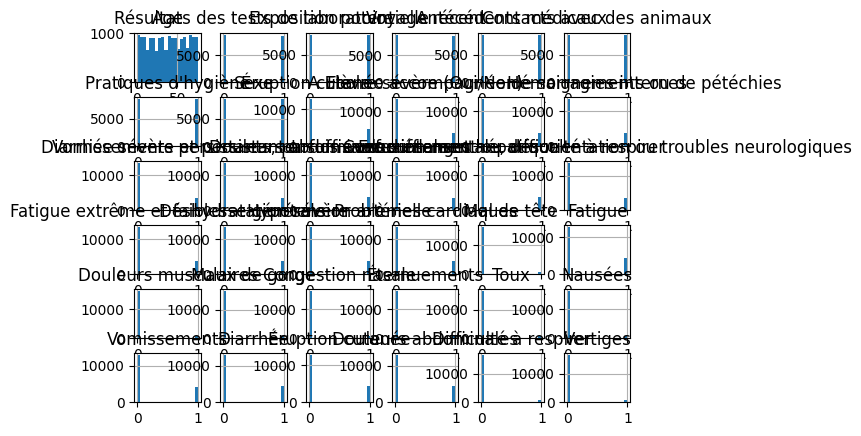

<ipython-input-21-2df79e7f32dc>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


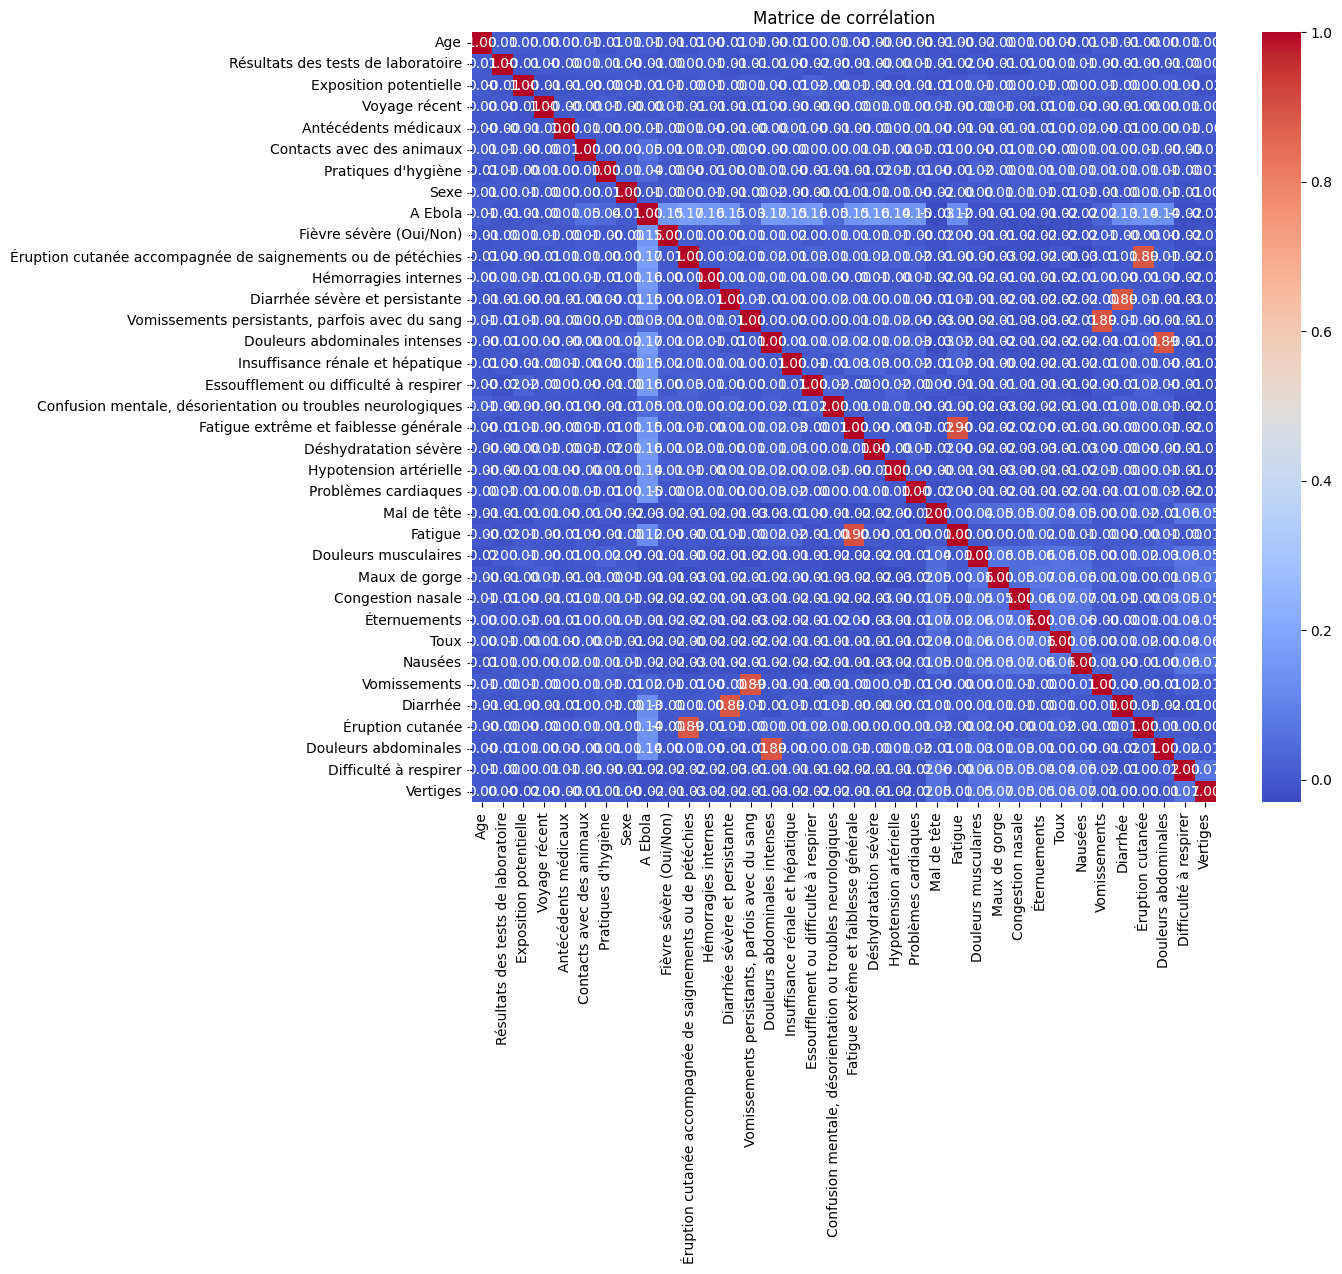


Comparaison de la moyenne pour Fièvre sévère (Oui/Non):
T-statistique: 19.74118043905312, p-valeur: 8.516146198012594e-86

Comparaison de la moyenne pour Éruption cutanée accompagnée de saignements ou de pétéchies:
T-statistique: 23.28255375946252, p-valeur: 4.4527400127129145e-118

Comparaison de la moyenne pour Hémorragies internes:
T-statistique: 21.06386930234525, p-valeur: 2.8864971411712014e-97

Comparaison de la moyenne pour Diarrhée sévère et persistante:
T-statistique: 19.271003852932463, p-valeur: 6.873692565239849e-82

Comparaison de la moyenne pour Vomissements persistants, parfois avec du sang:
T-statistique: 4.349964631535245, p-valeur: 1.3694398255157224e-05

Comparaison de la moyenne pour Douleurs abdominales intenses:
T-statistique: 21.990960950514058, p-valeur: 1.00539667443837e-105

Comparaison de la moyenne pour Insuffisance rénale et hépatique:
T-statistique: 19.551730069179882, p-valeur: 3.2753998191509228e-84

Comparaison de la moyenne pour Essoufflement ou diff

In [21]:
# Visualisation de la distribution des variables numériques
plt.figure(figsize=(12, 8))
from scipy.stats import ttest_ind
df.hist(bins=20)
plt.show()

# Matrice de corrélation pour les variables numériques
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

# Sélectionner les colonnes potentiellement liées à Ebola
ebola_related_columns = ['Fièvre sévère (Oui/Non)', 'Éruption cutanée accompagnée de saignements ou de pétéchies',
                         'Hémorragies internes', 'Diarrhée sévère et persistante',
                         'Vomissements persistants, parfois avec du sang',
                         'Douleurs abdominales intenses', 'Insuffisance rénale et hépatique',
                         'Essoufflement ou difficulté à respirer',
                         'Confusion mentale, désorientation ou troubles neurologiques',
                         'Fatigue extrême et faiblesse générale', 'Déshydratation sévère',
                         'Hypotension artérielle', 'Problèmes cardiaques', 'Mal de tête', 'Fatigue',
                         'Douleurs musculaires', 'Maux de gorge', 'Congestion nasale', 'Éternuements', 'Toux',
                         'Nausées', 'Vomissements', 'Diarrhée', 'Éruption cutanée', 'Douleurs abdominales',
                         'Difficulté à respirer', 'Vertiges']

# Convertir les colonnes pertinentes en type numérique avec 'coerce' pour gérer les chaînes de caractères
for col in ebola_related_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Comparer les moyennes de ces variables entre les cas d'Ebola et le groupe de contrôle (hypothèse ici)
for col in ebola_related_columns:
    print(f"\nComparaison de la moyenne pour {col}:")

    # Supprimer les valeurs manquantes (NaN) dans les groupes
    ebola_group = df[df['A Ebola'] == 1][col].dropna()
    non_ebola_group = df[df['A Ebola'] == 0][col].dropna()

    # Effectuer le test t uniquement si les groupes ont des valeurs
    if not ebola_group.empty and not non_ebola_group.empty:
        t_stat, p_value = ttest_ind(ebola_group, non_ebola_group)
        print(f"T-statistique: {t_stat}, p-valeur: {p_value}")
    else:
        print("Impossible de réaliser le test t en raison de valeurs manquantes.")

In [22]:
df['A Ebola'].value_counts()


0    12654
1     4533
Name: A Ebola, dtype: int64

In [23]:
# Calculer les occurrences des valeurs dans la colonne 'A Ebola'
value_counts = df['A Ebola'].value_counts()

# Calculer le nombre total d'entrées dans la colonne
total_entries = len(df['A Ebola'])

# Calculer les pourcentages
percentages = (value_counts / total_entries) * 100

# Afficher les pourcentages
print(percentages)


0    73.625415
1    26.374585
Name: A Ebola, dtype: float64


Creation de sous-ensemble de ceux qui ont ebola ou pas

In [24]:
negative_df = df[df['A Ebola']== 0]
positive_df = df[df['A Ebola']== 1]

In [25]:
df.shape

(17187, 37)

<Axes: xlabel='Résultats des tests de laboratoire', ylabel='count'>

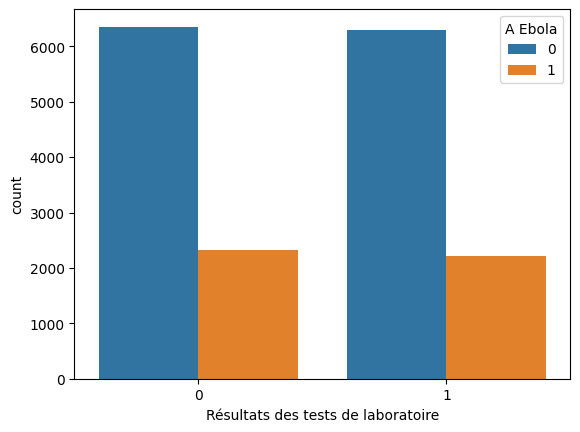

In [26]:
sns.countplot(x='Résultats des tests de laboratoire', hue='A Ebola', data=df)

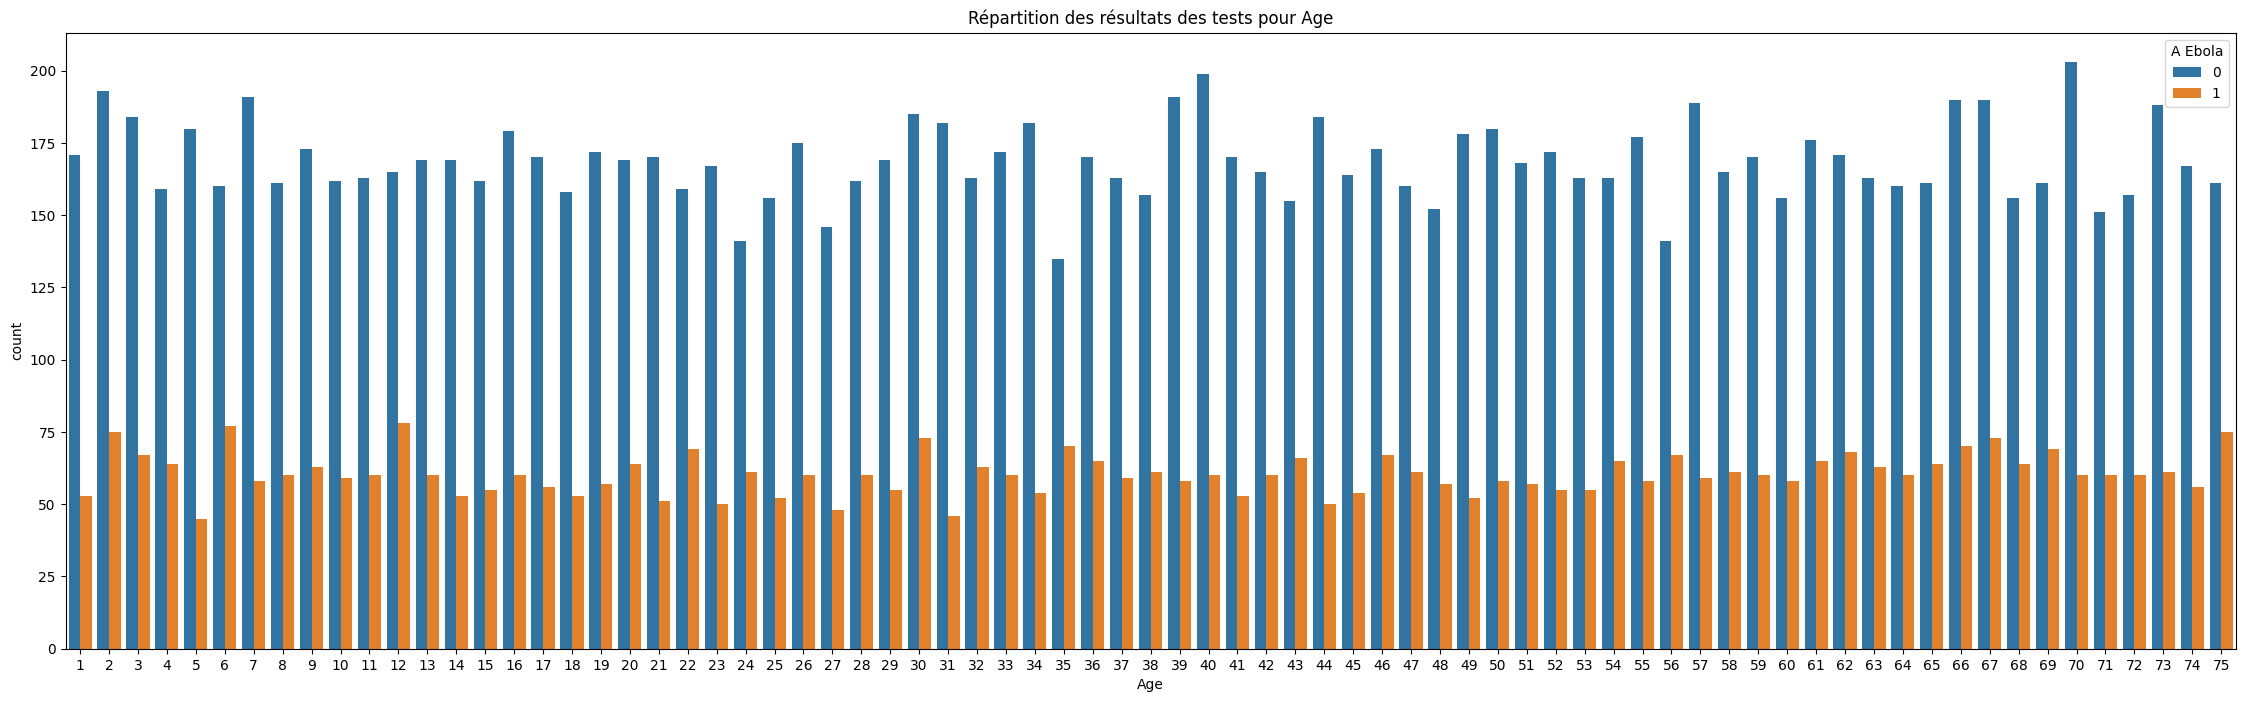

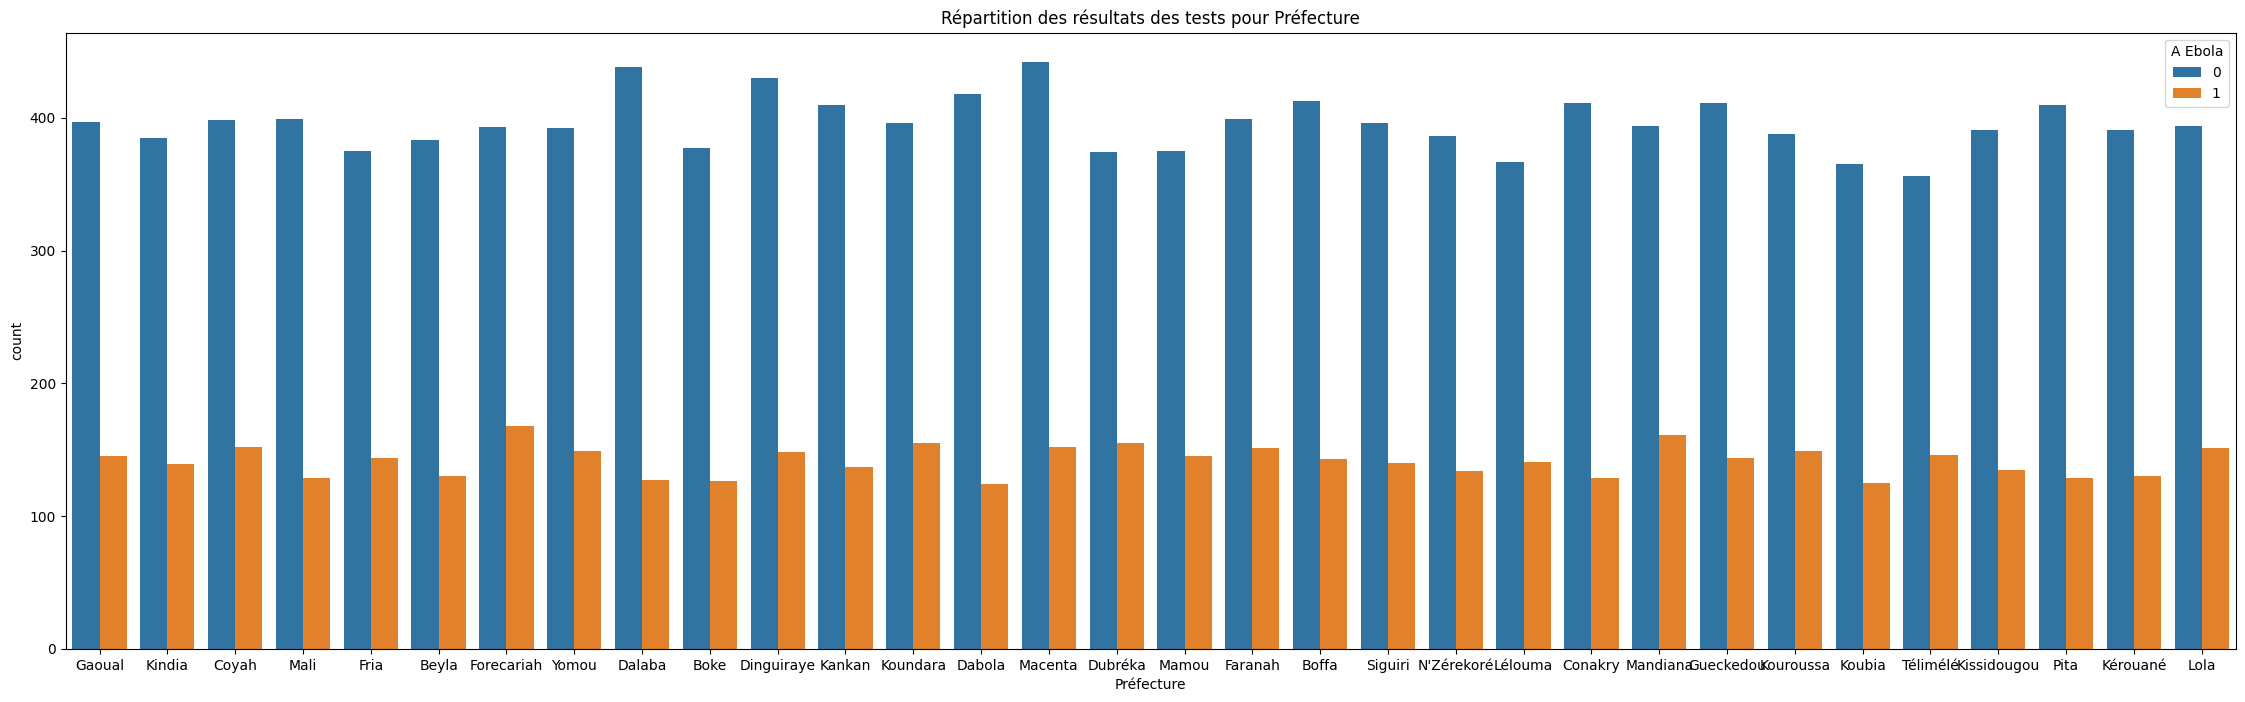

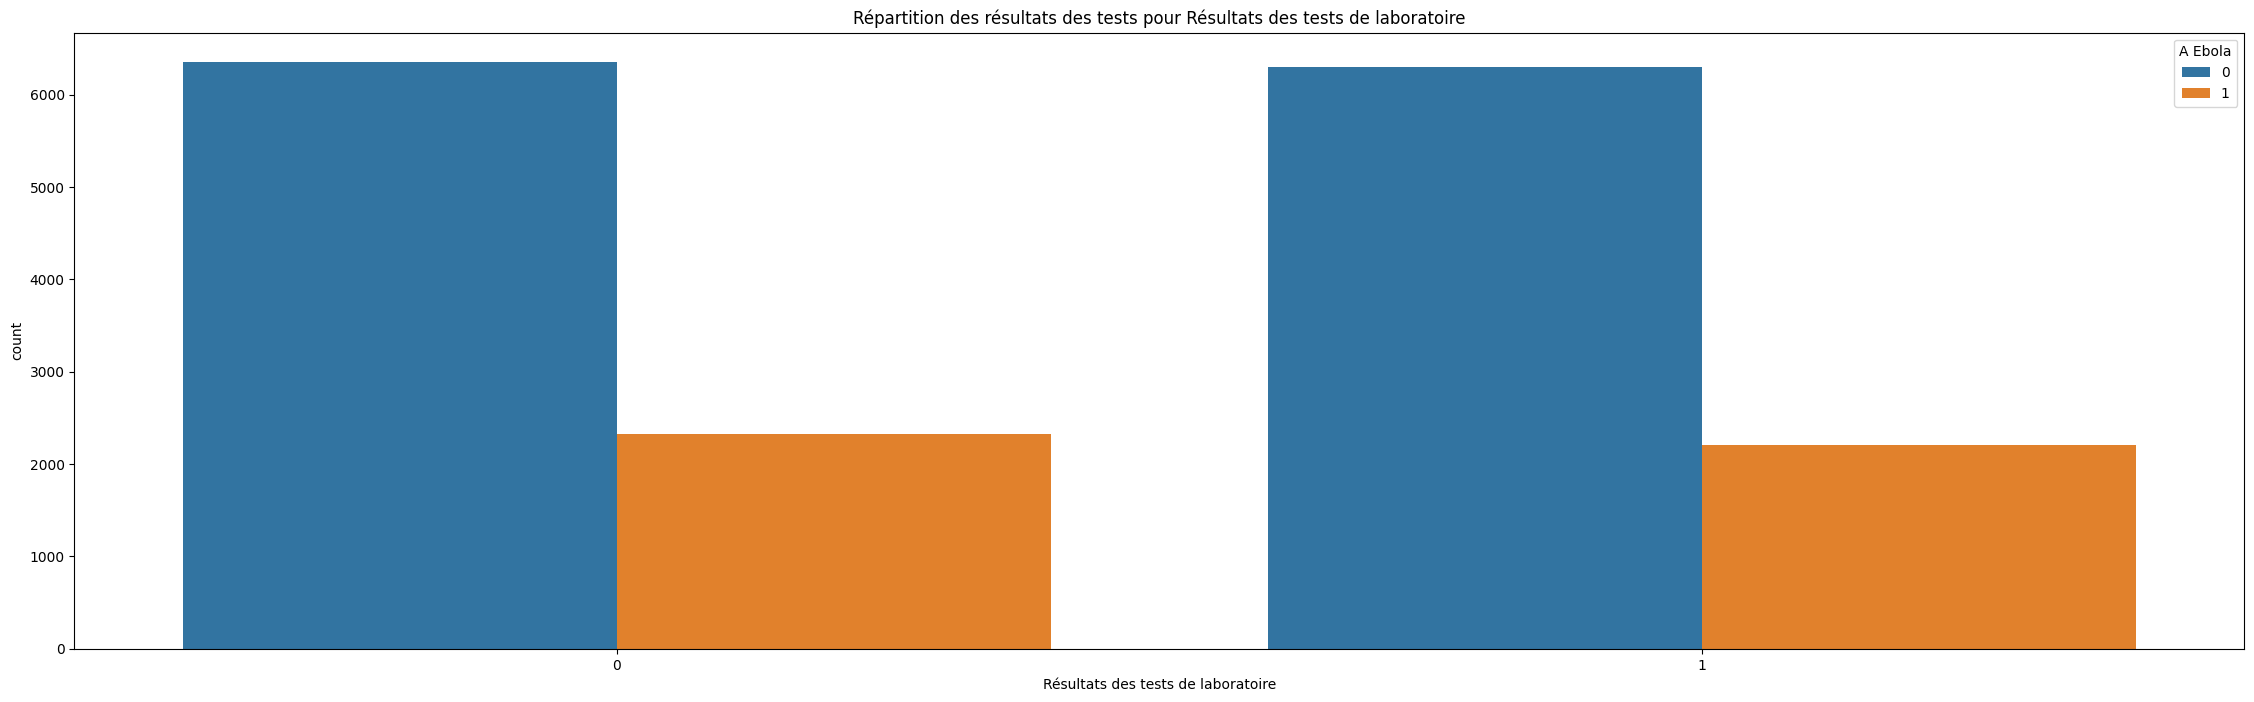

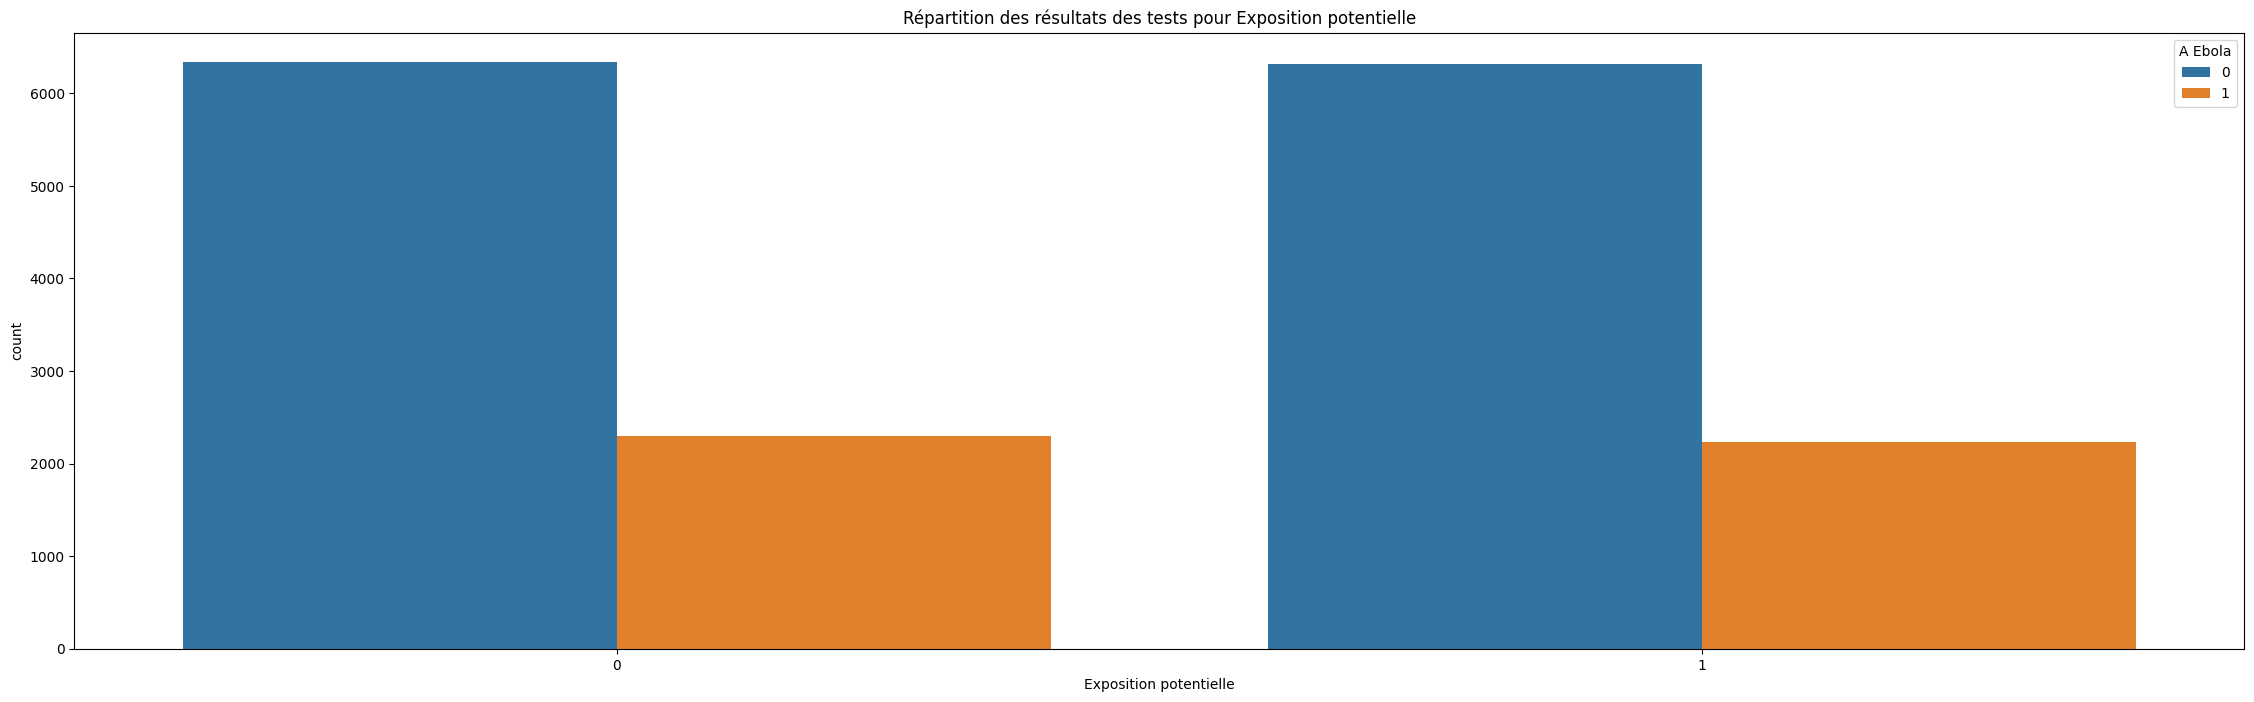

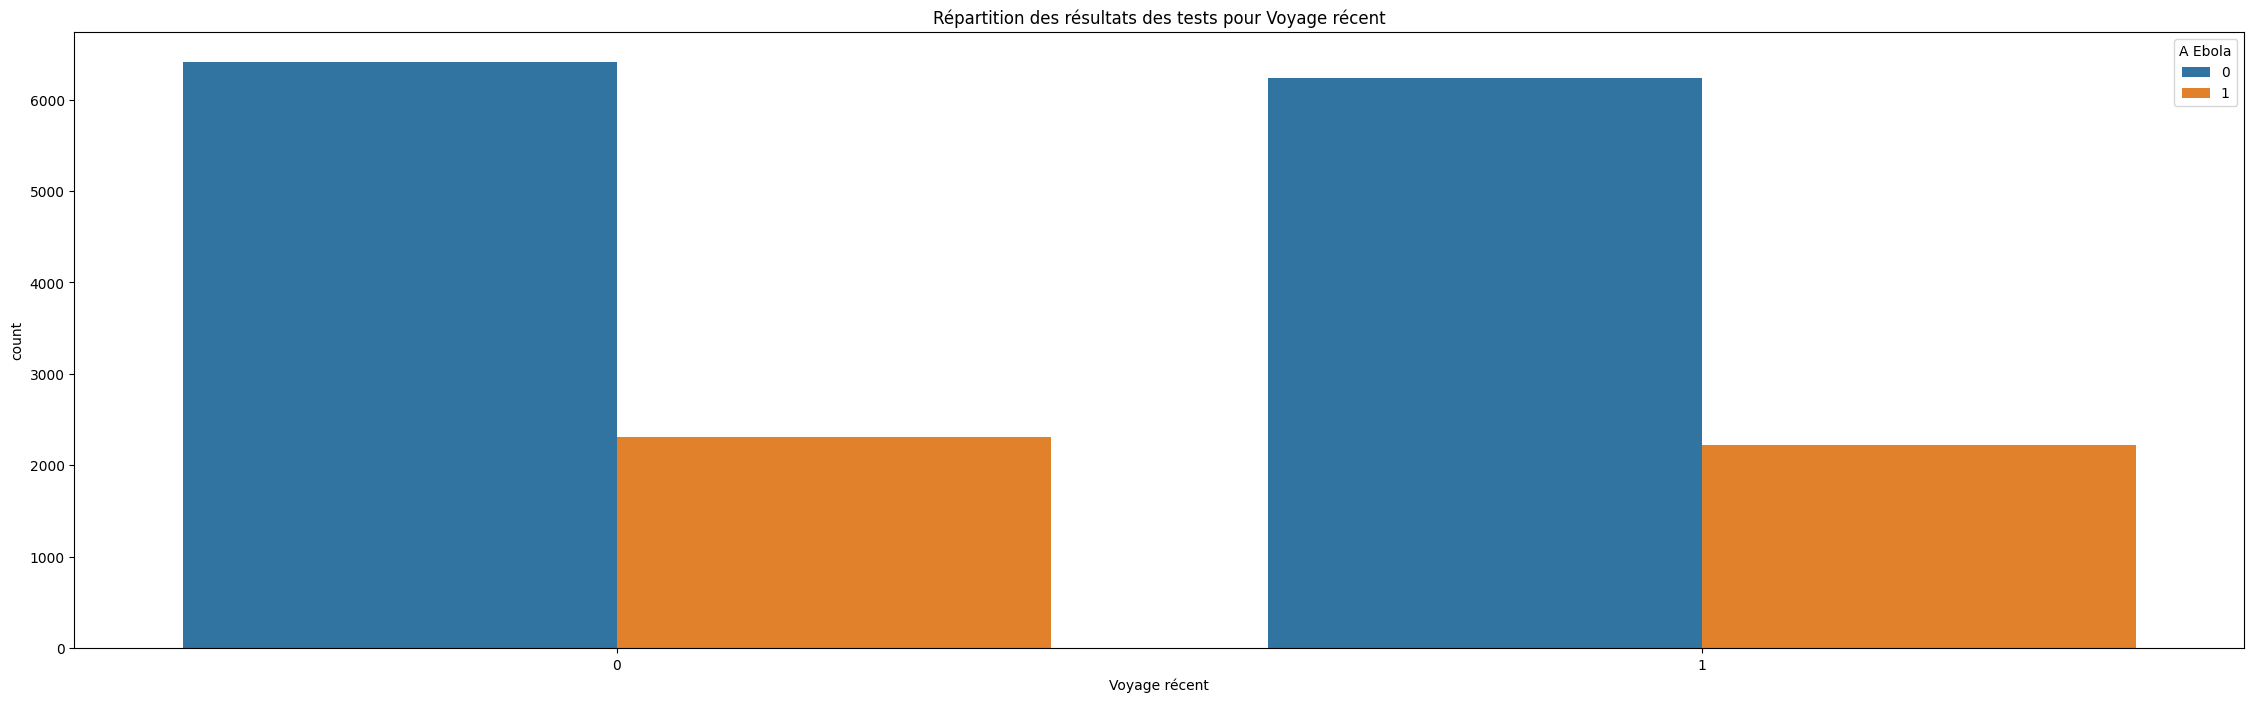

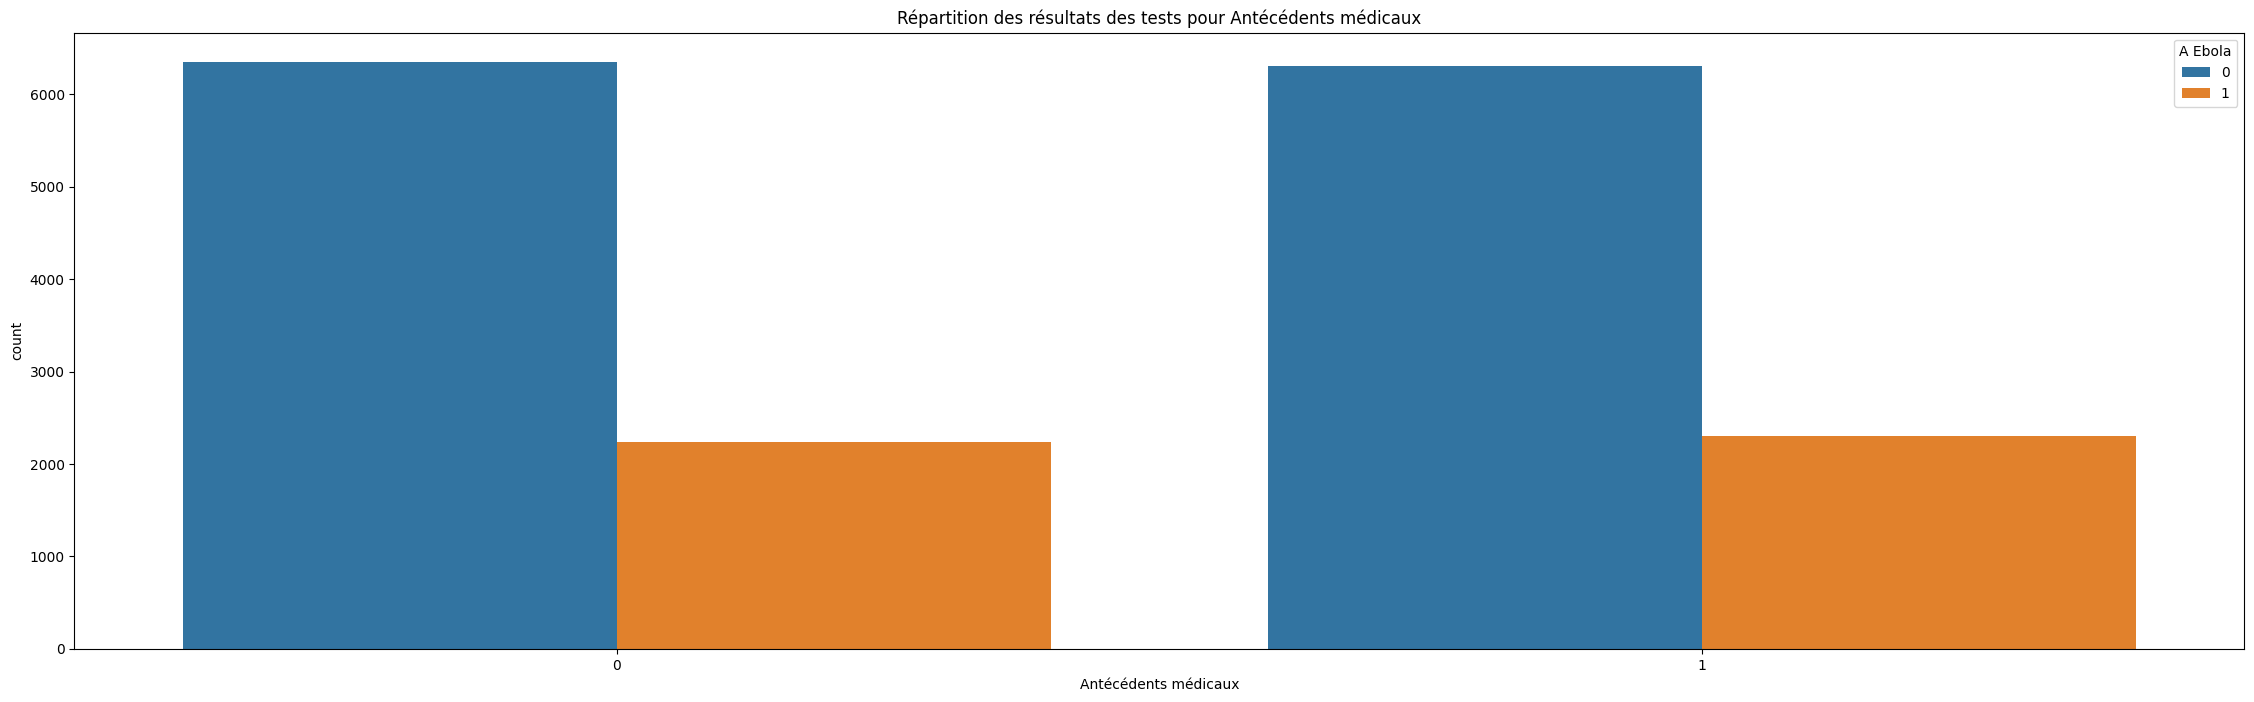

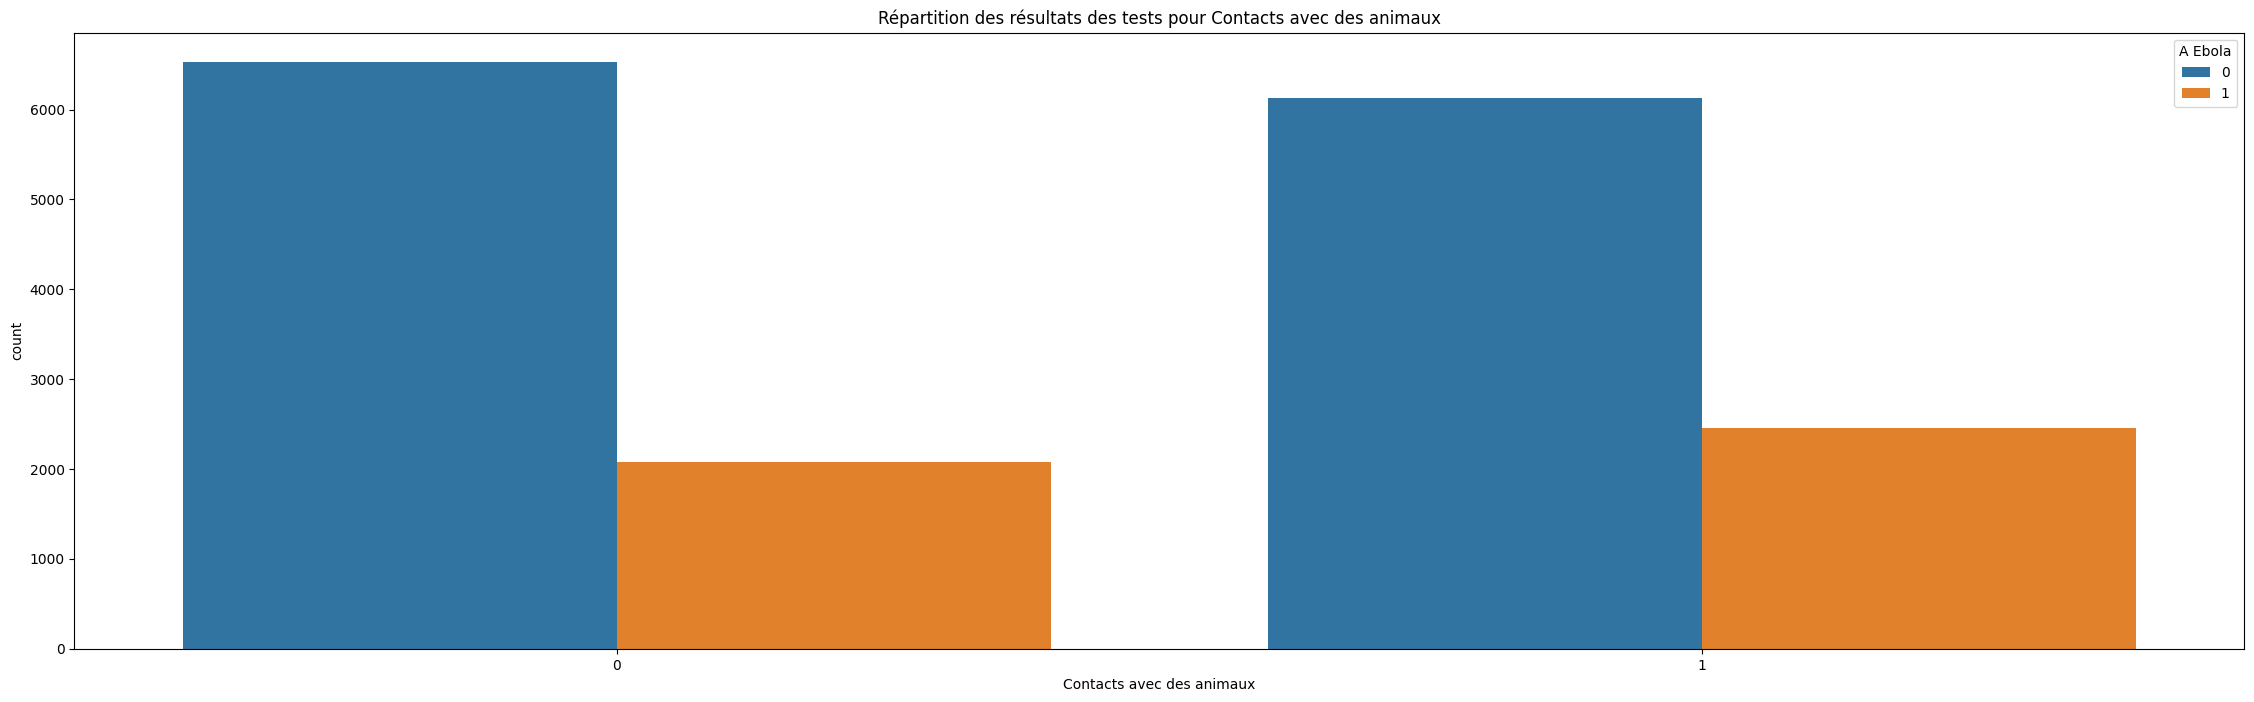

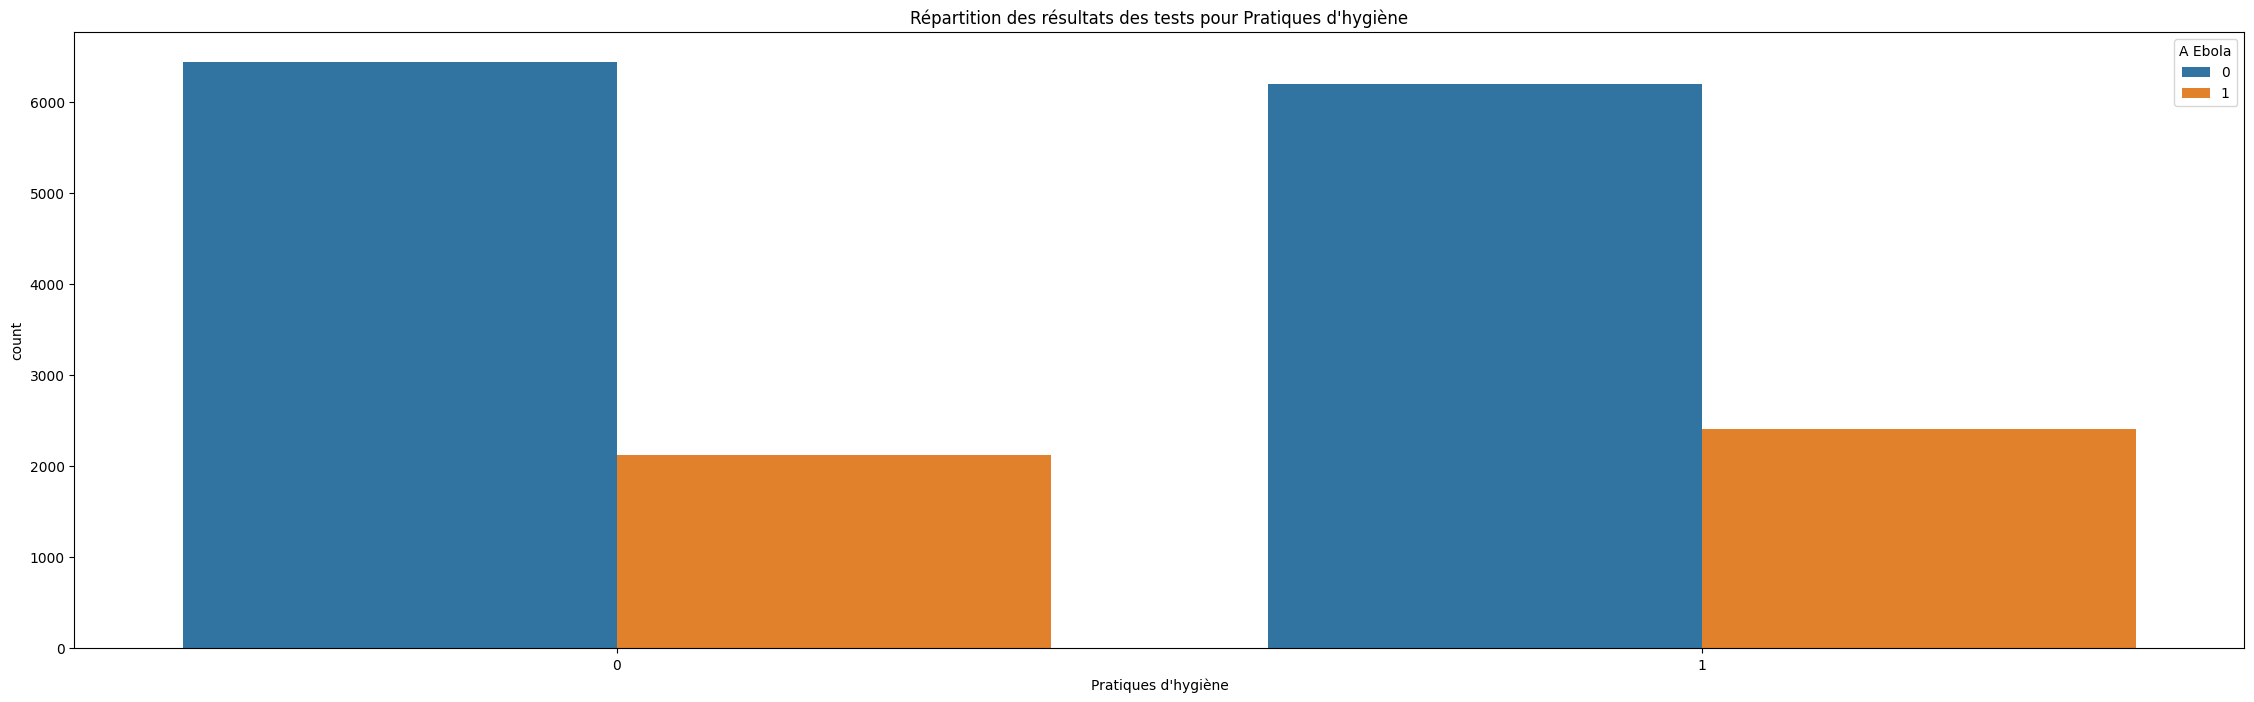

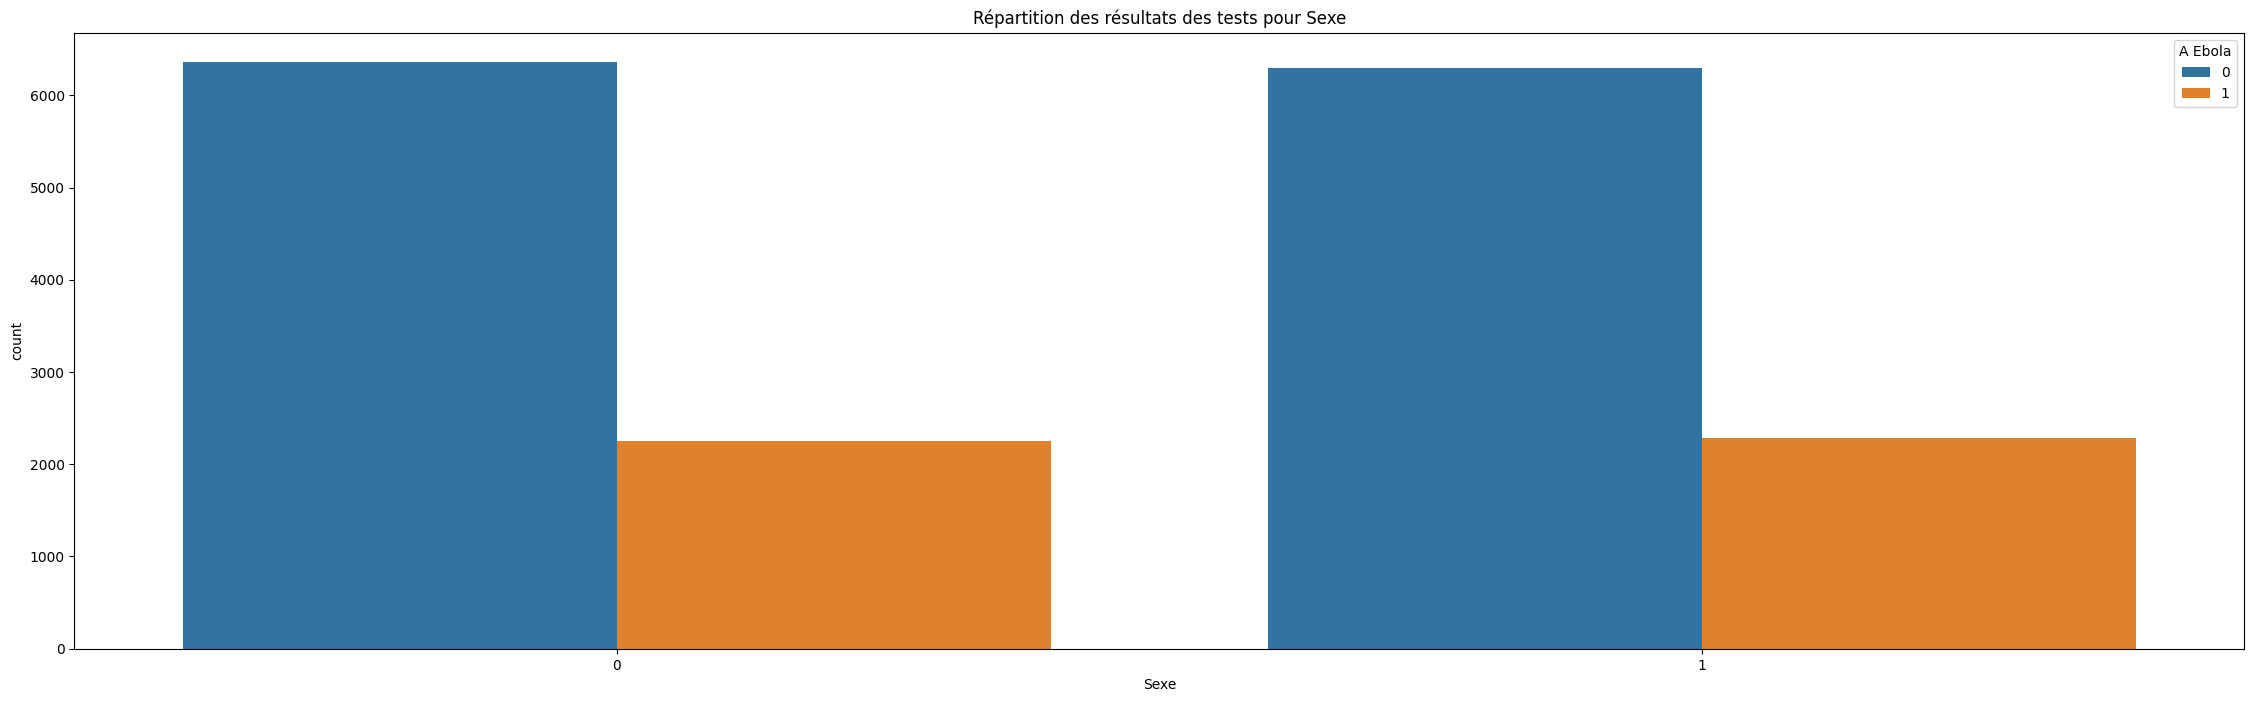

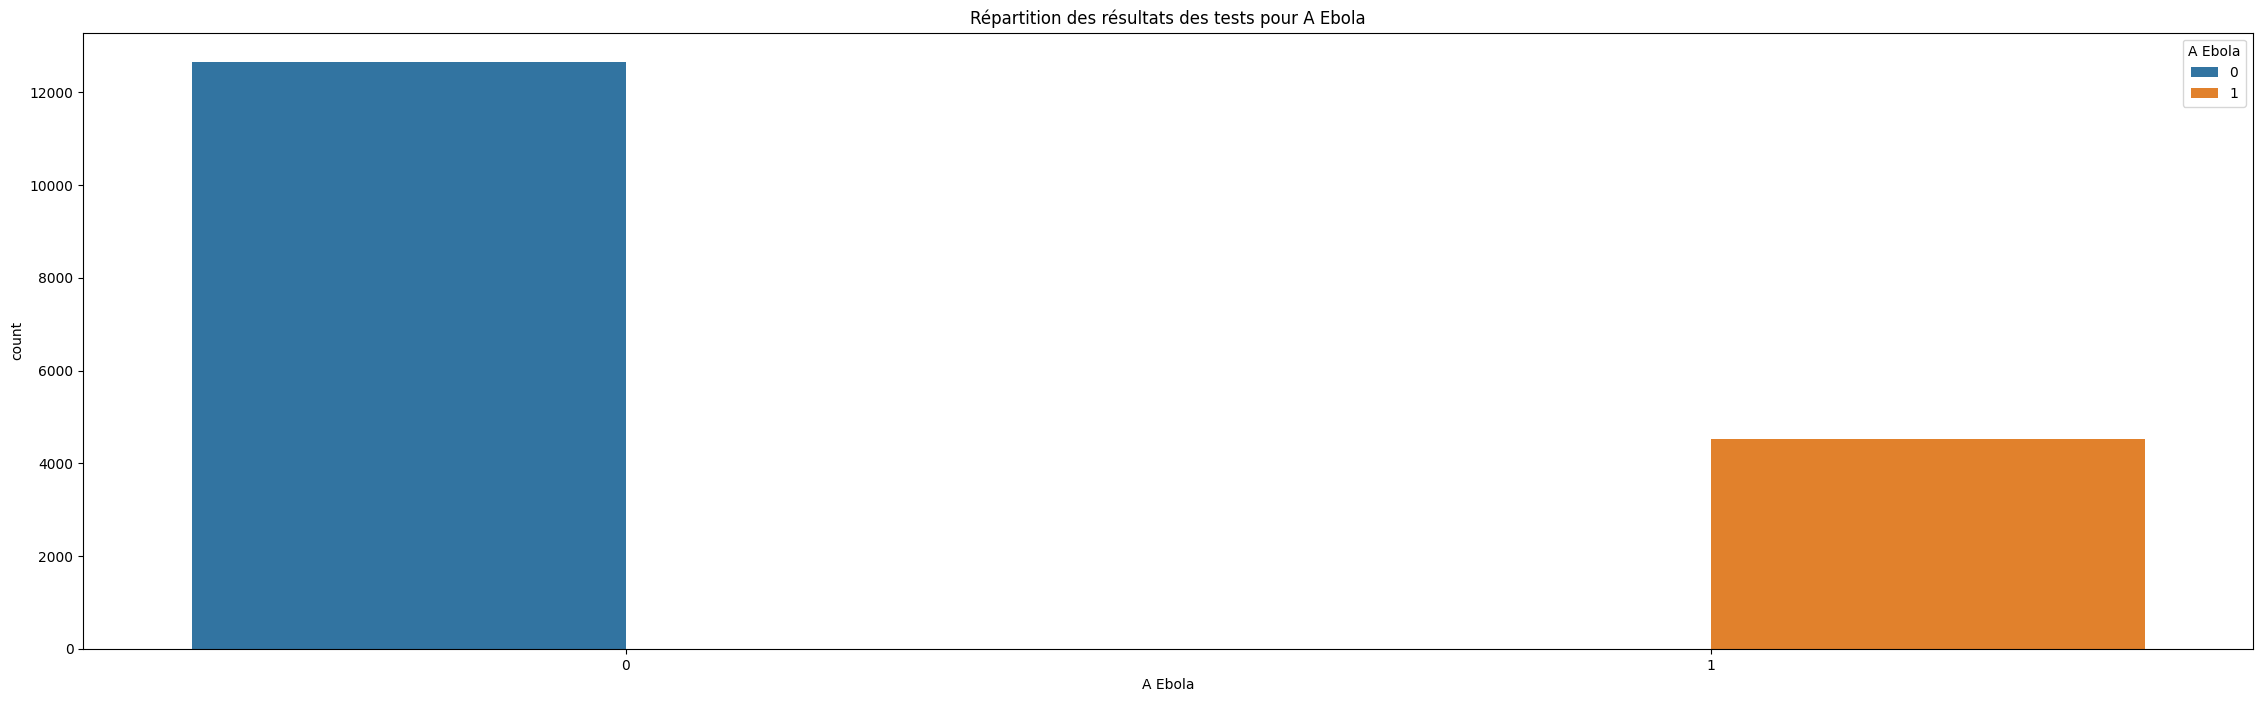

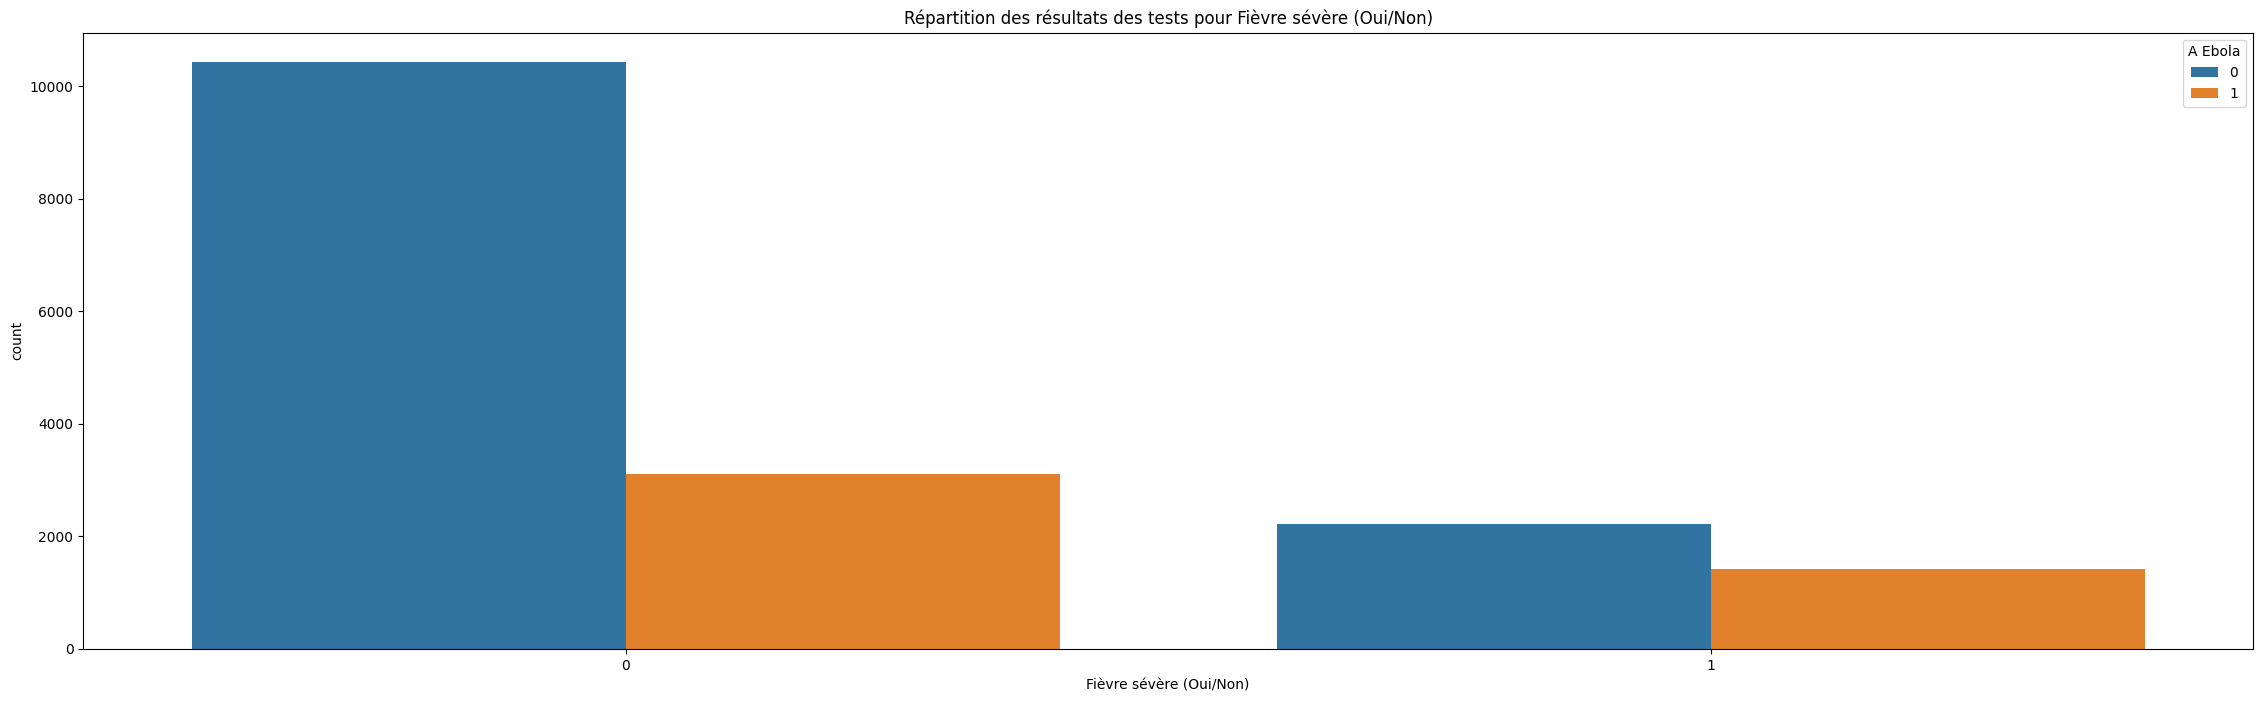

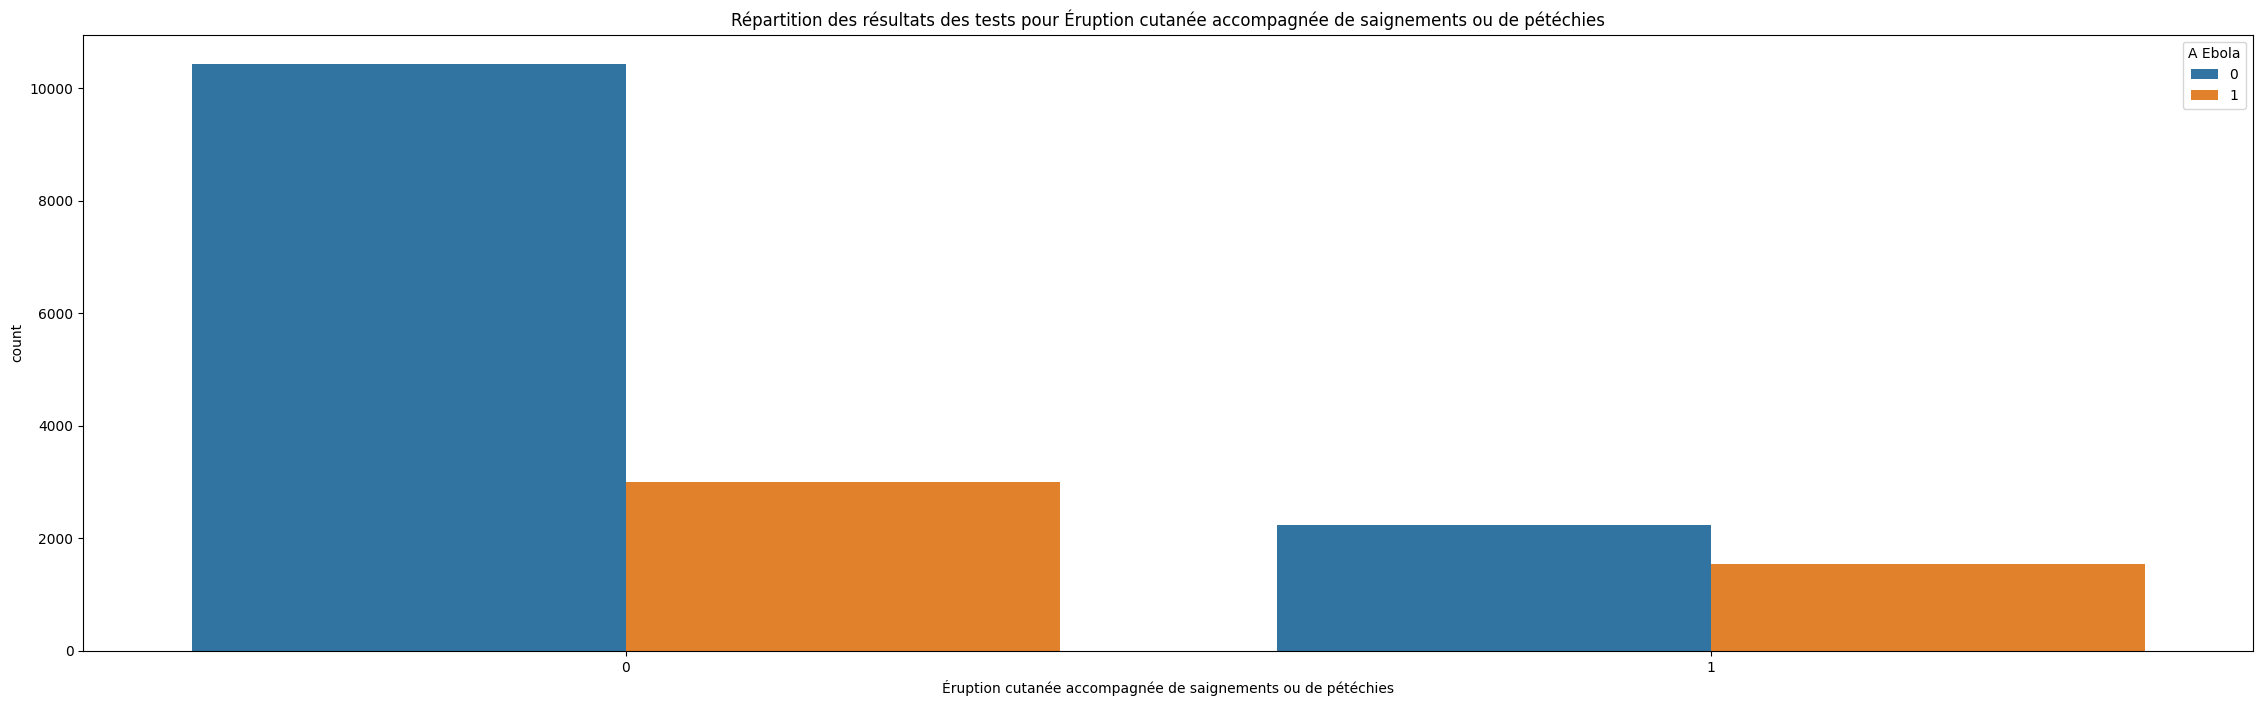

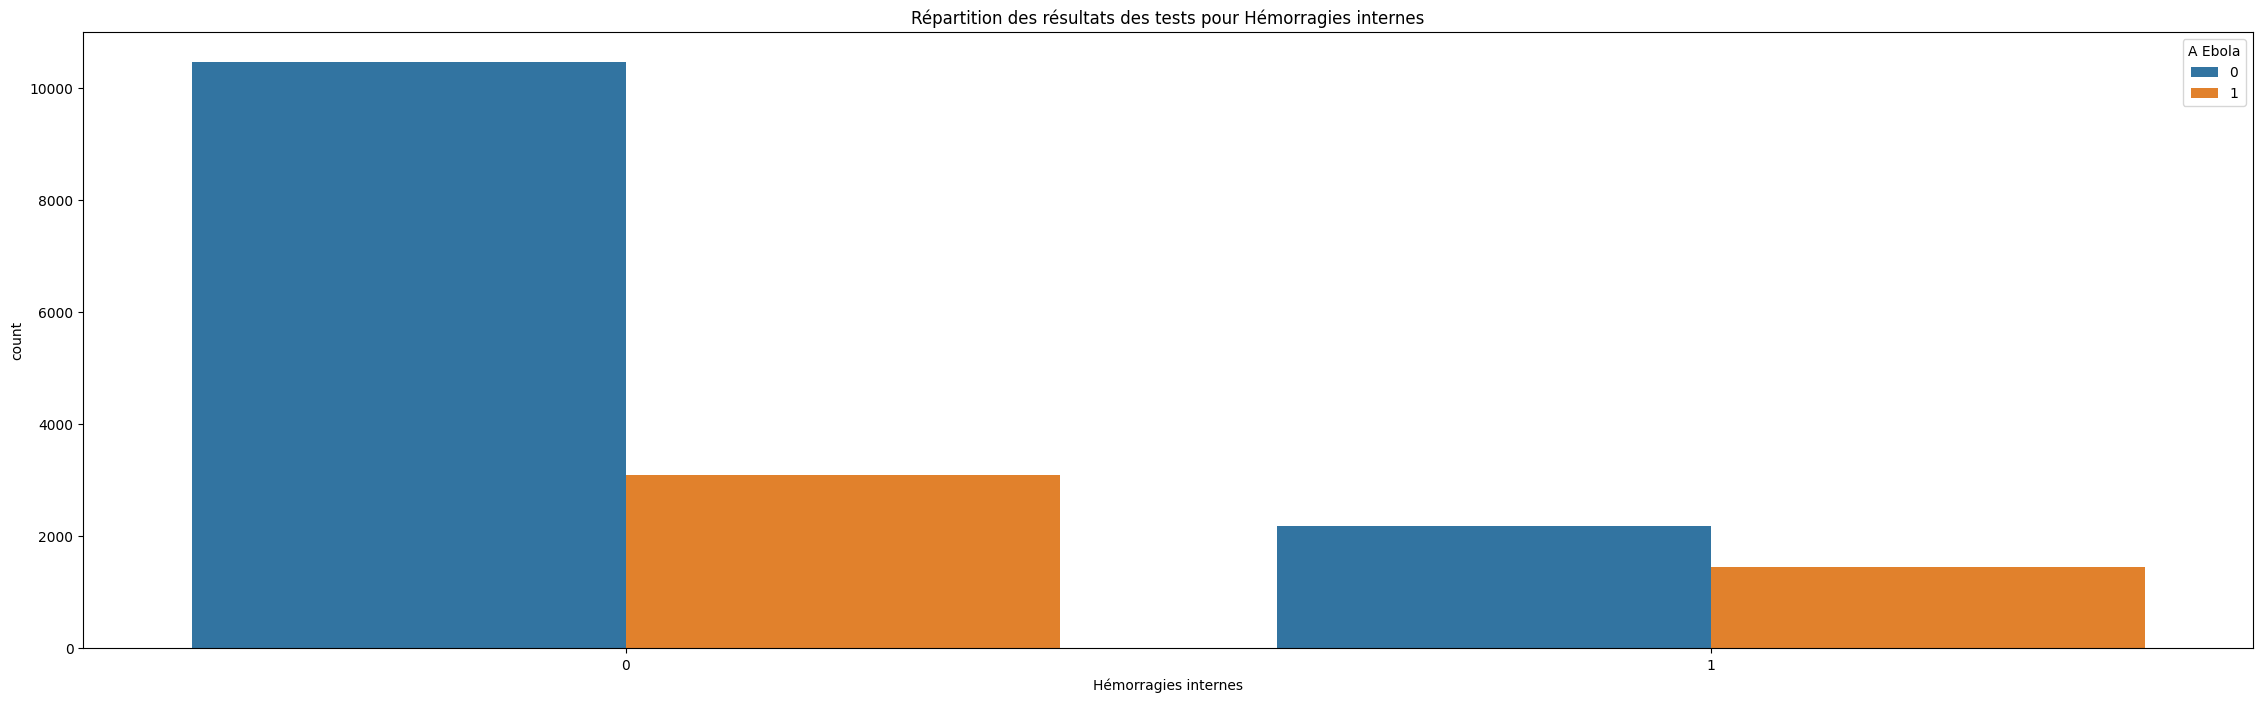

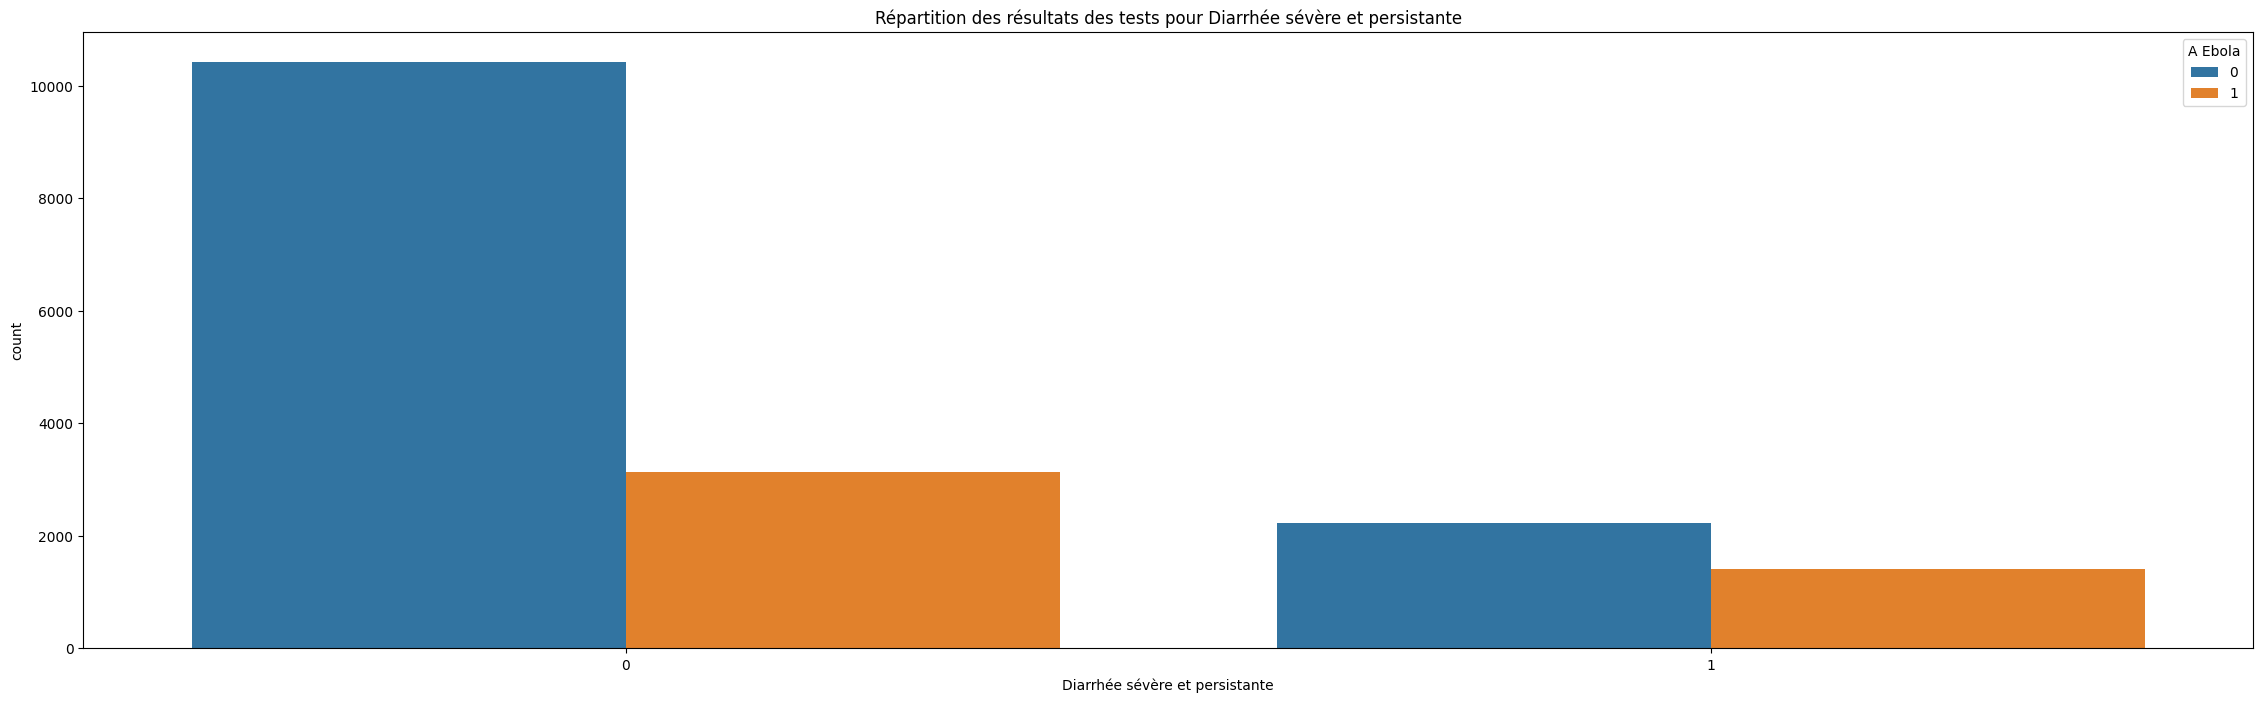

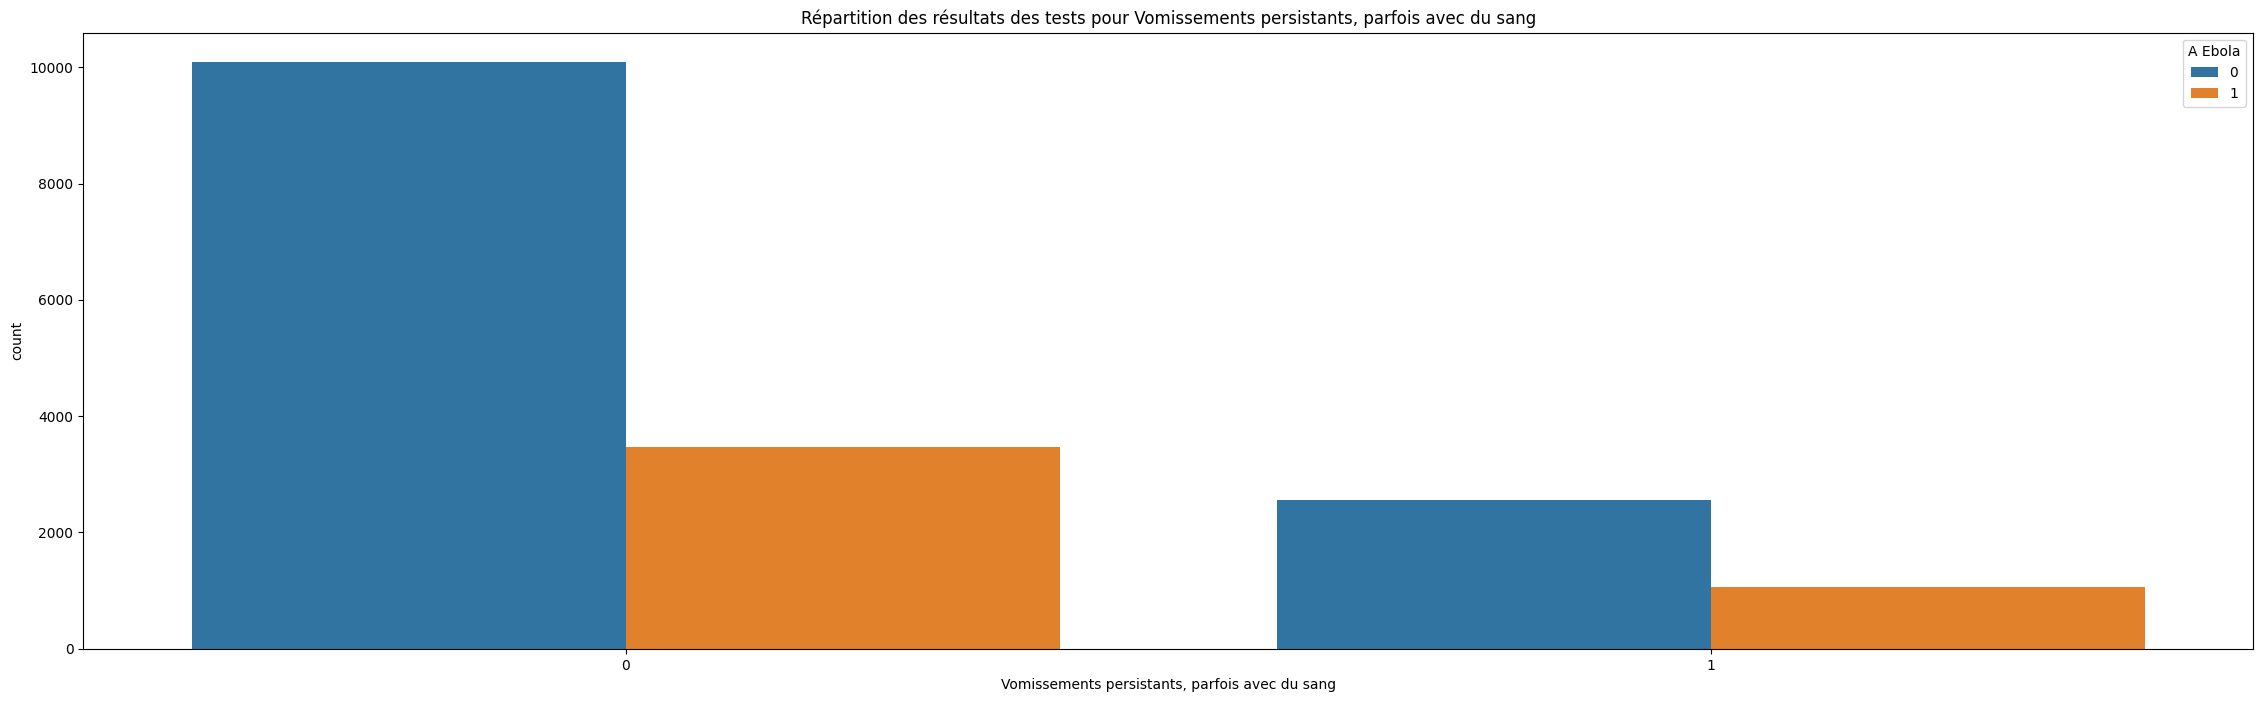

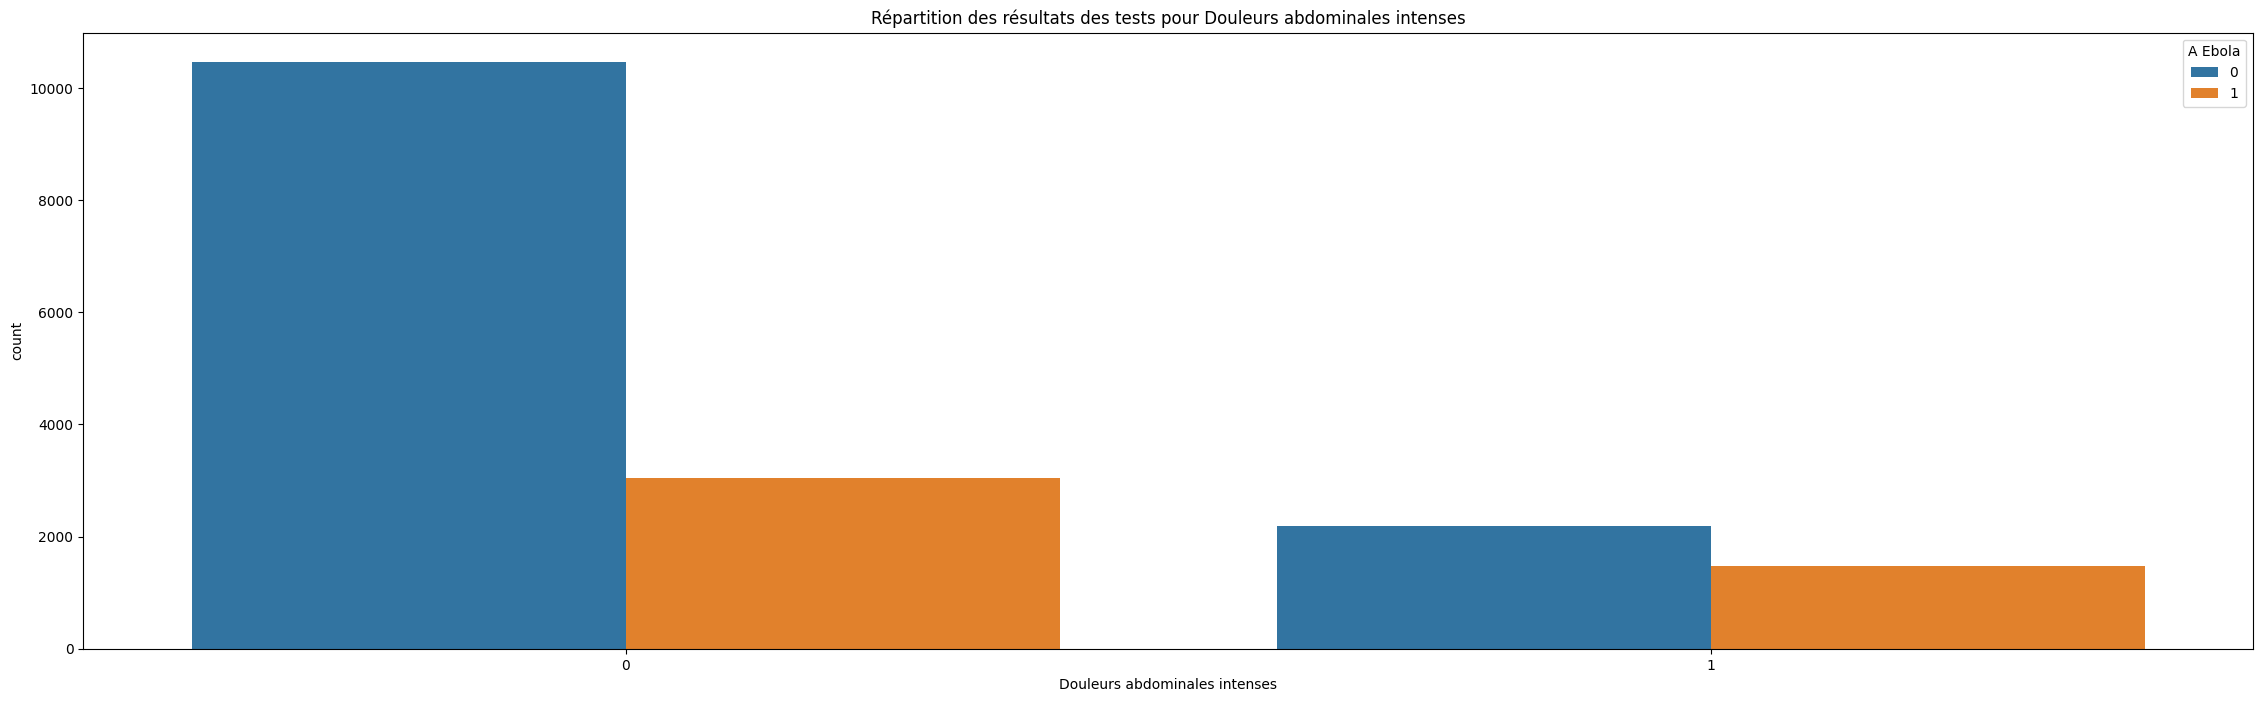

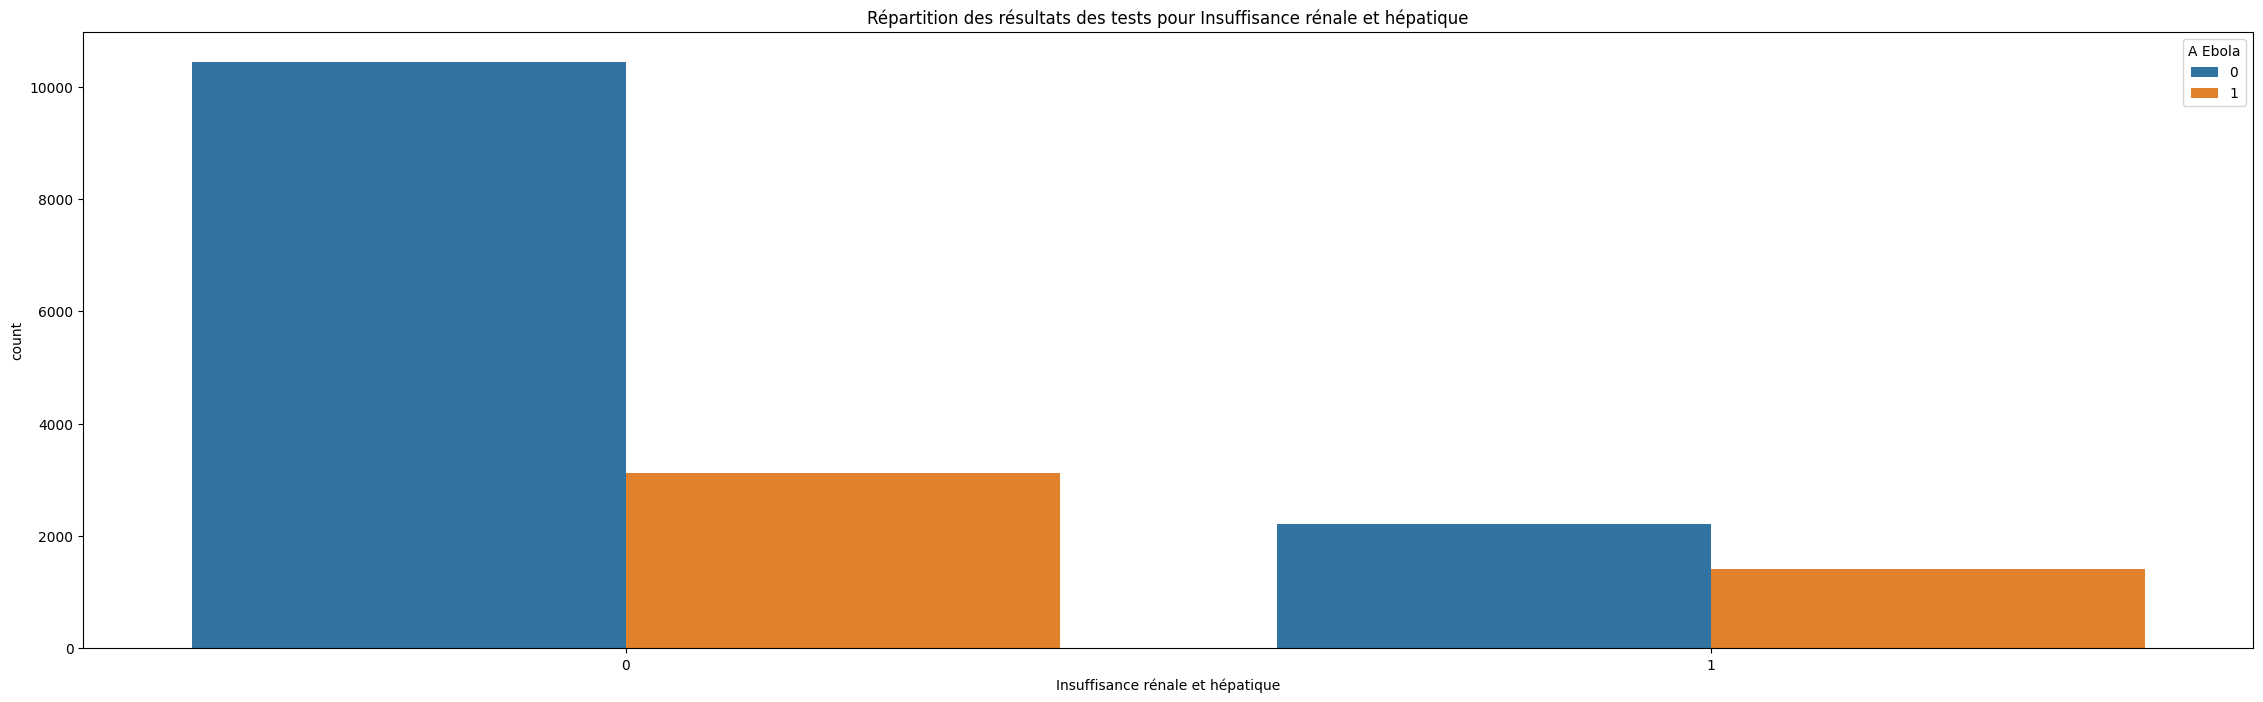

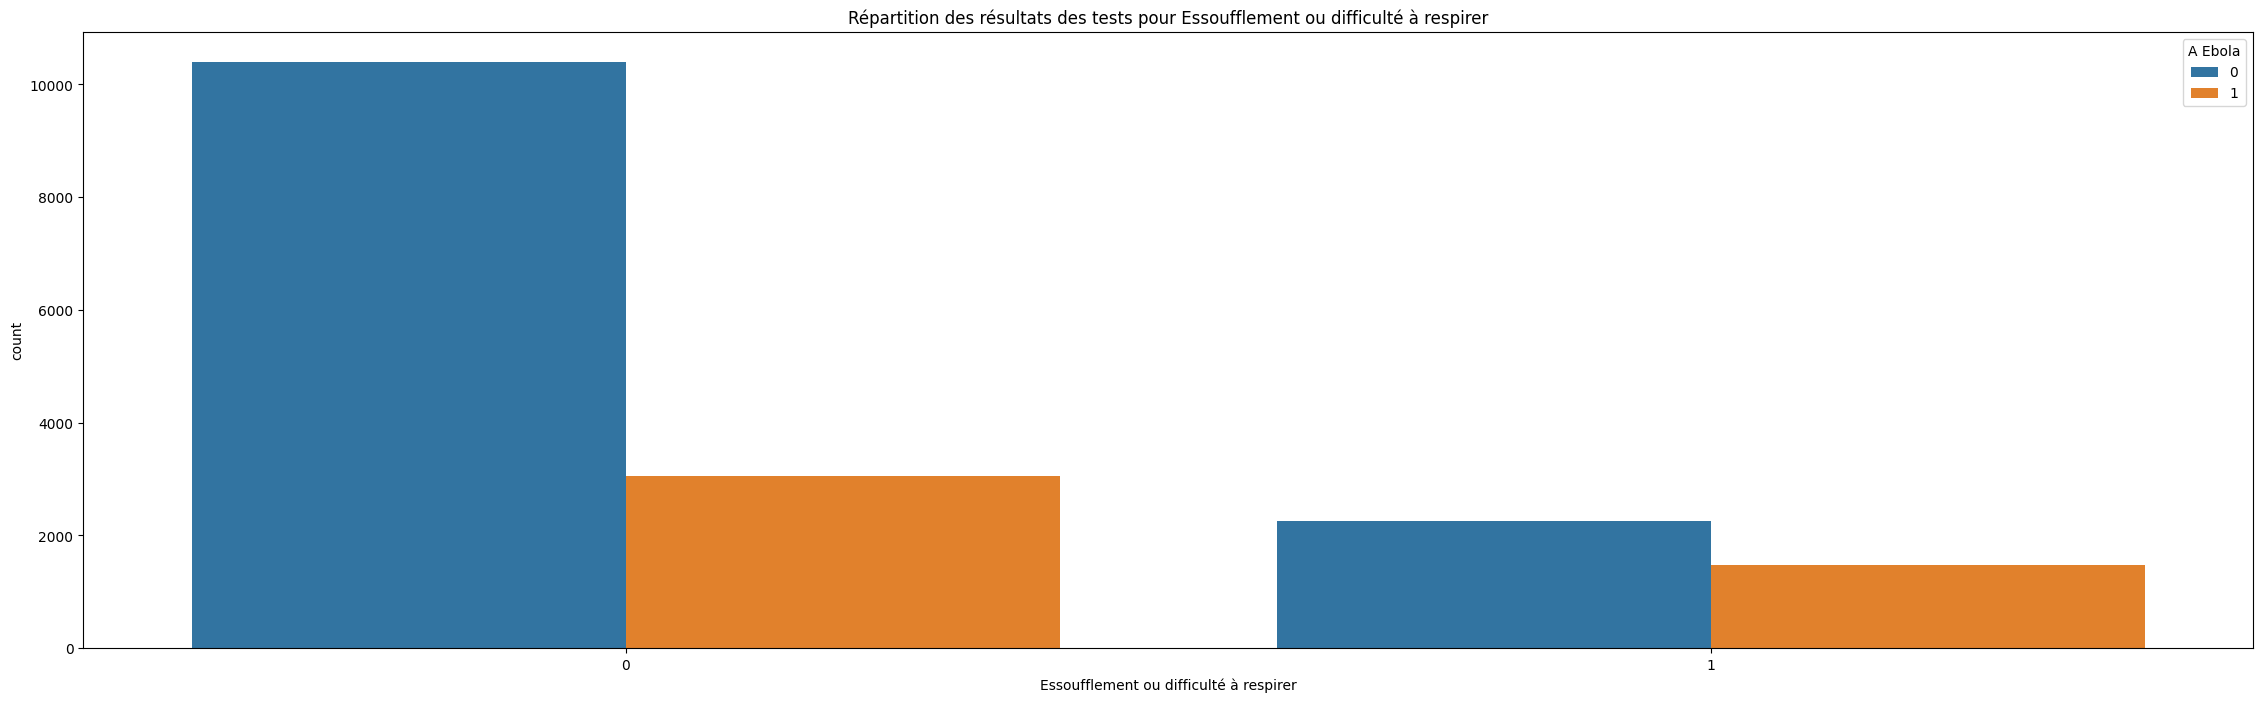

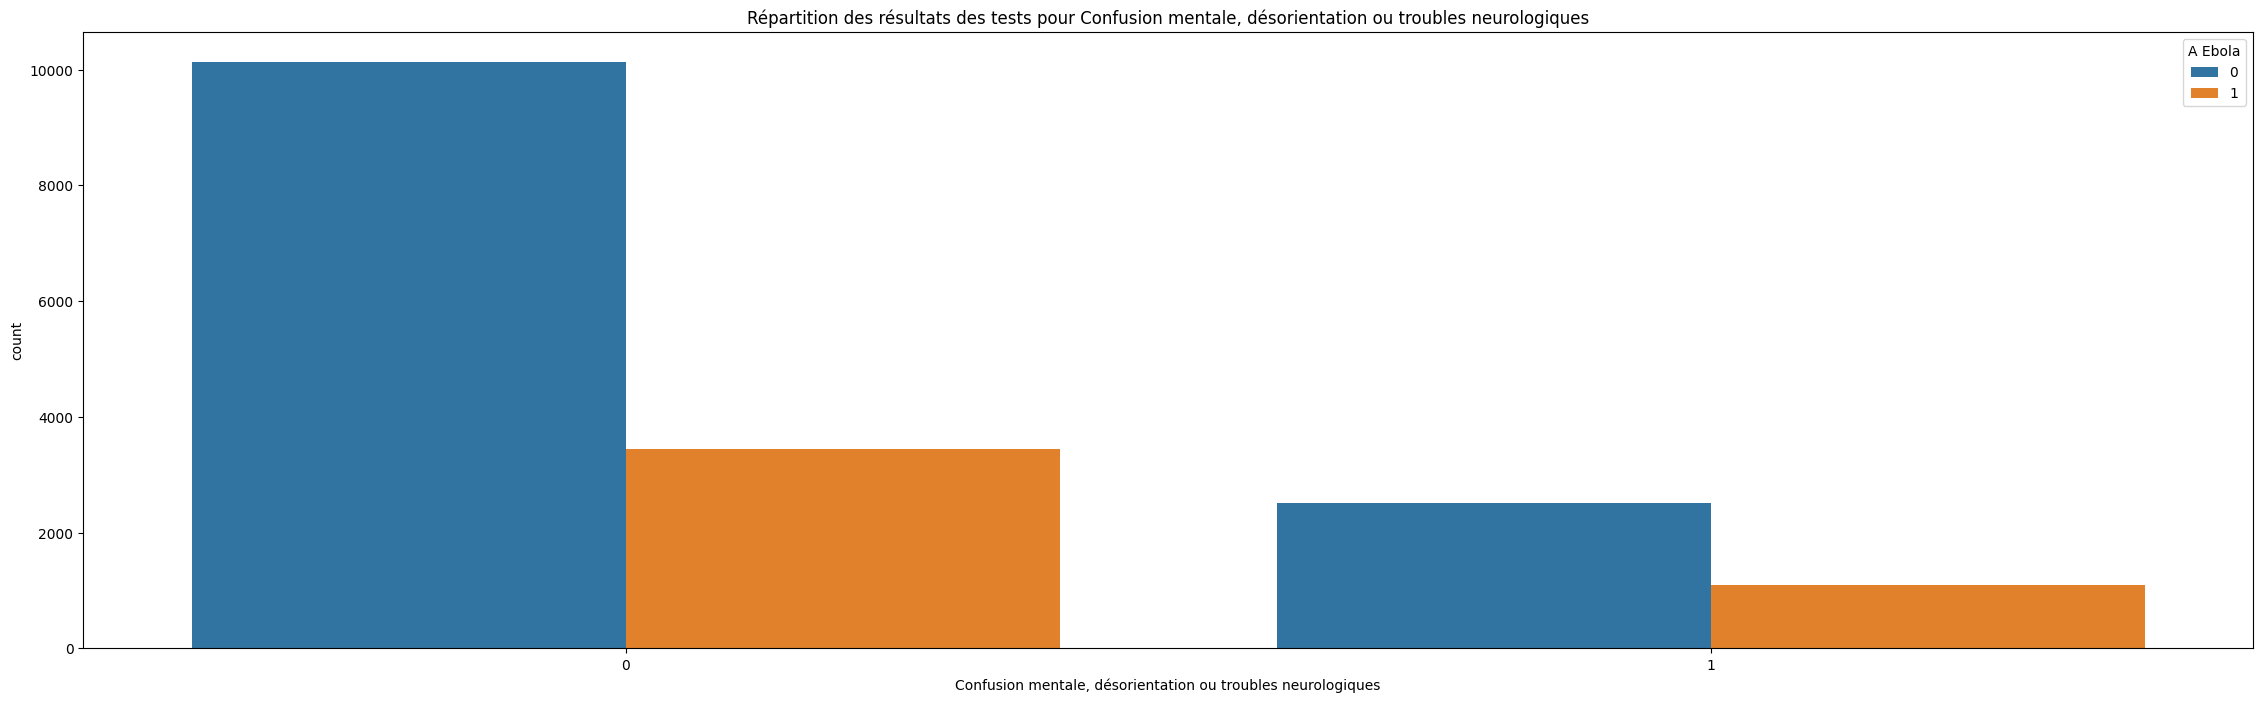

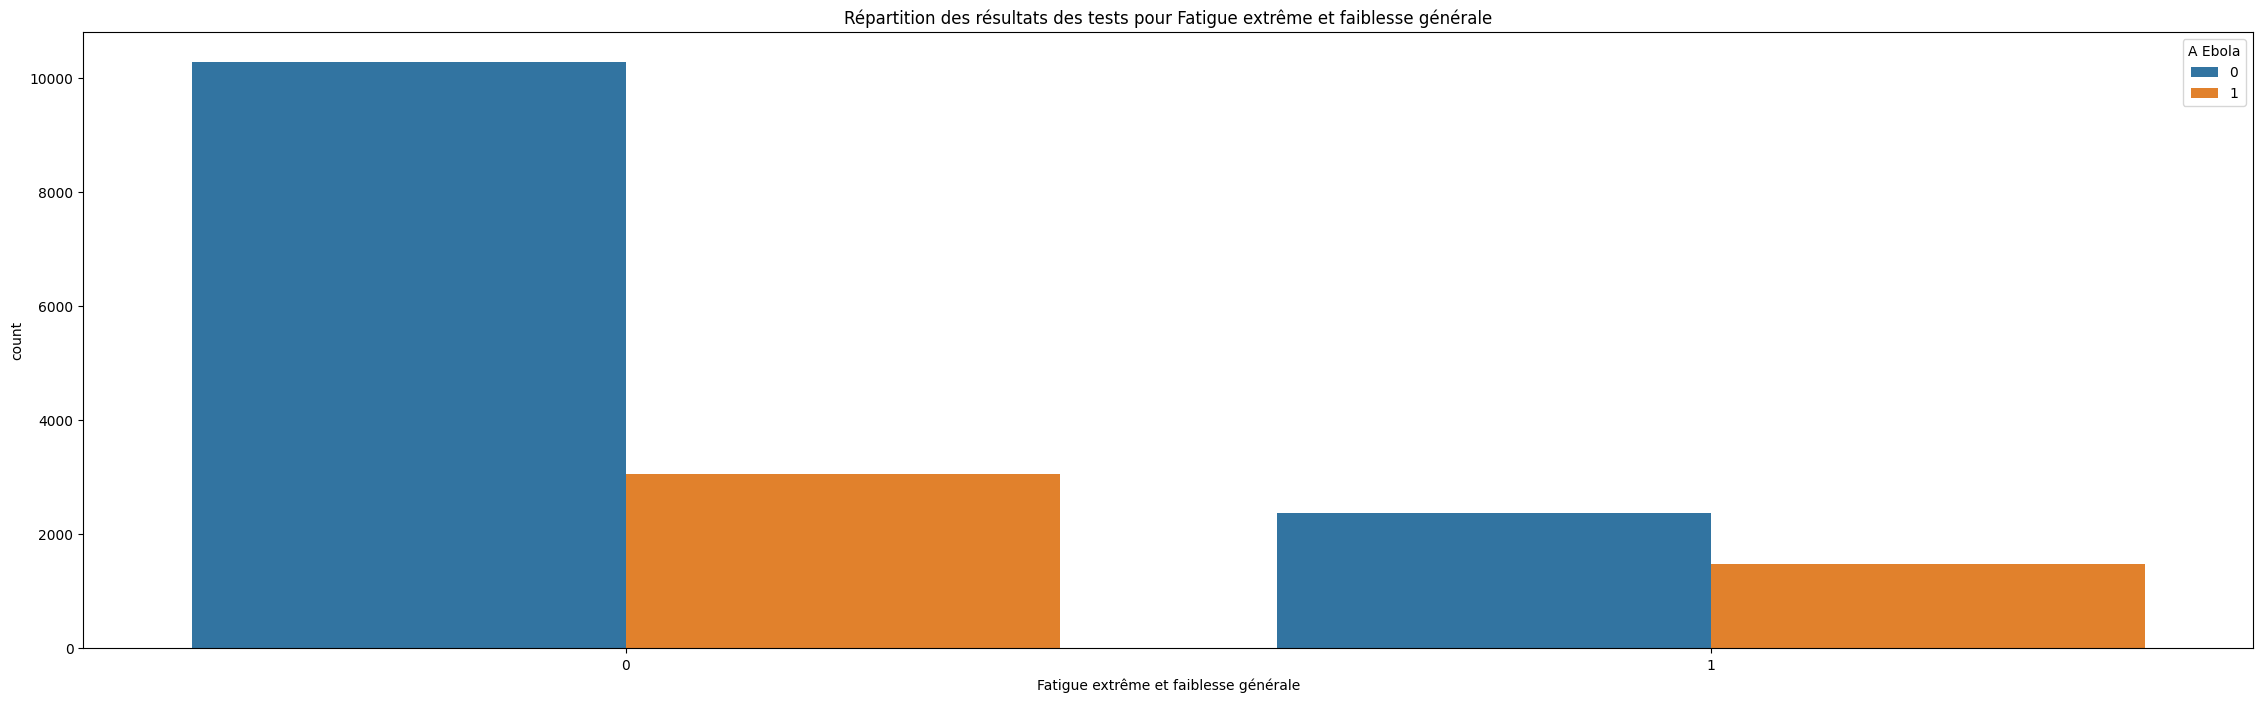

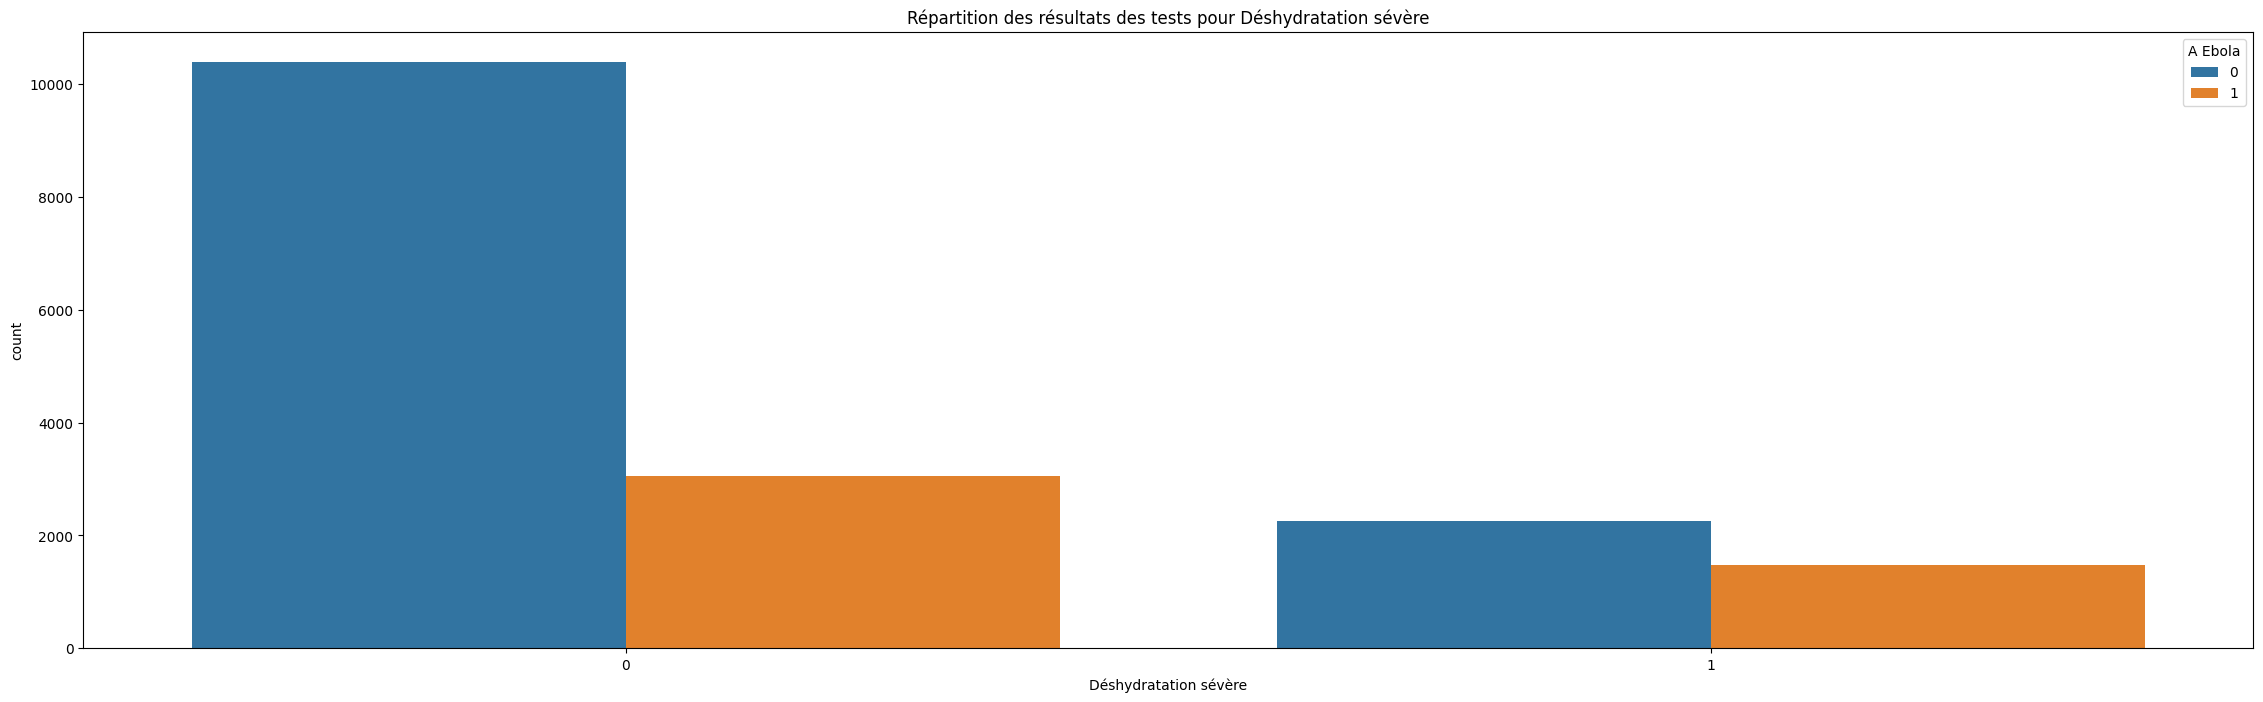

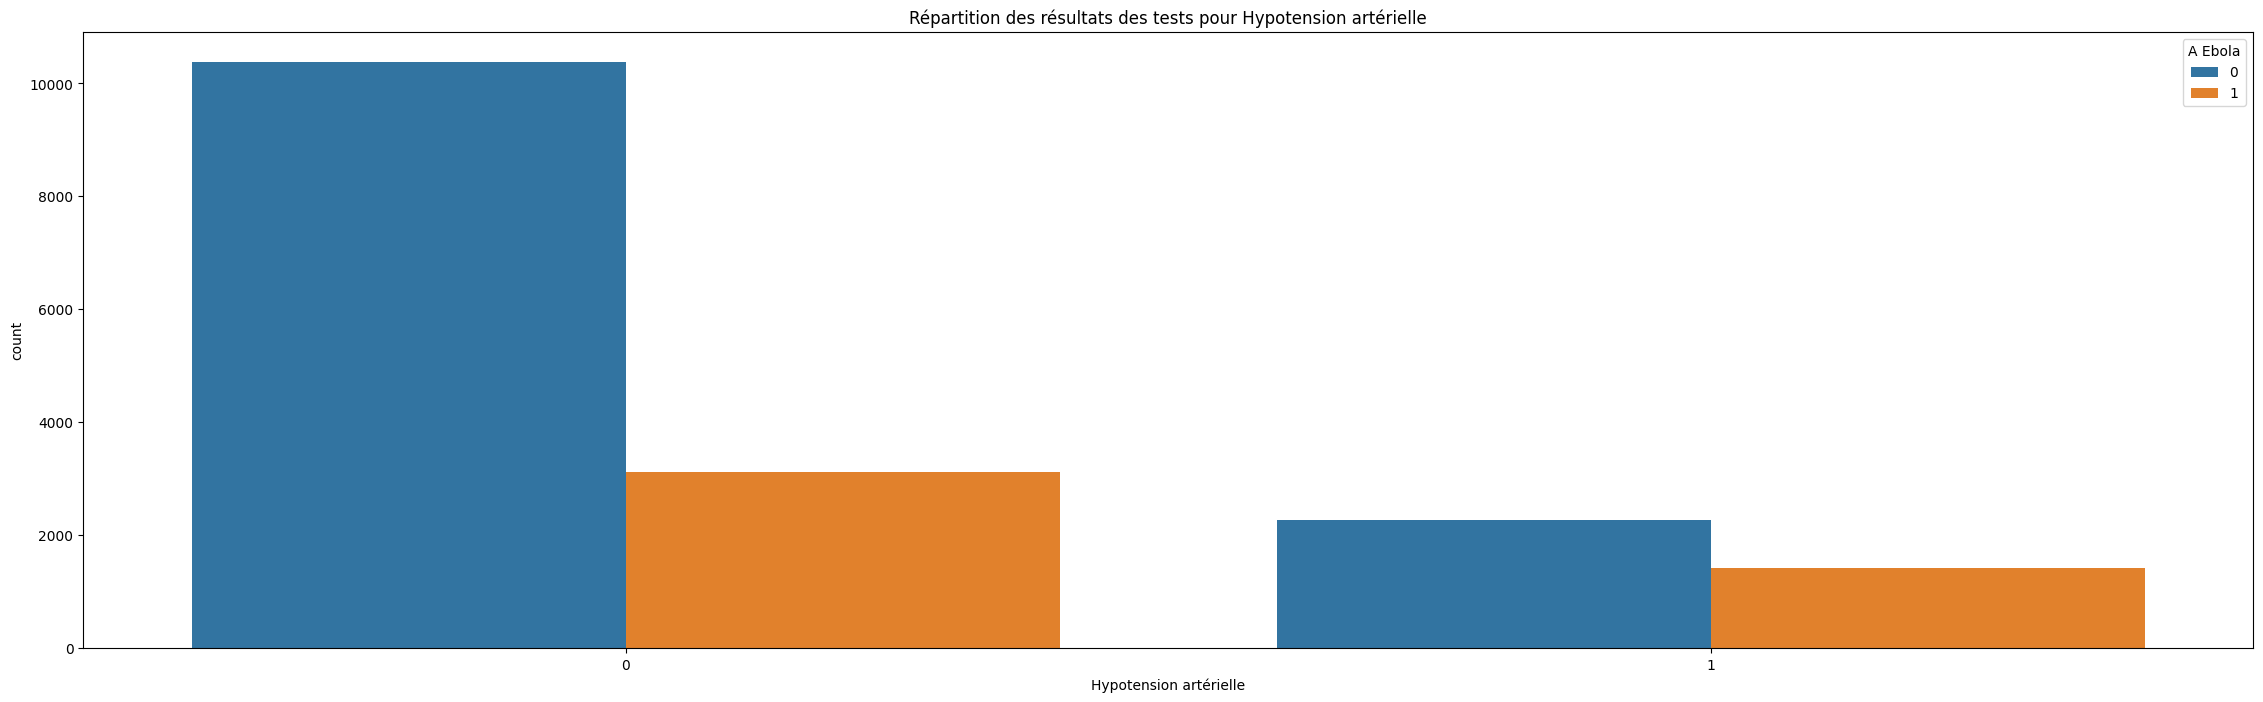

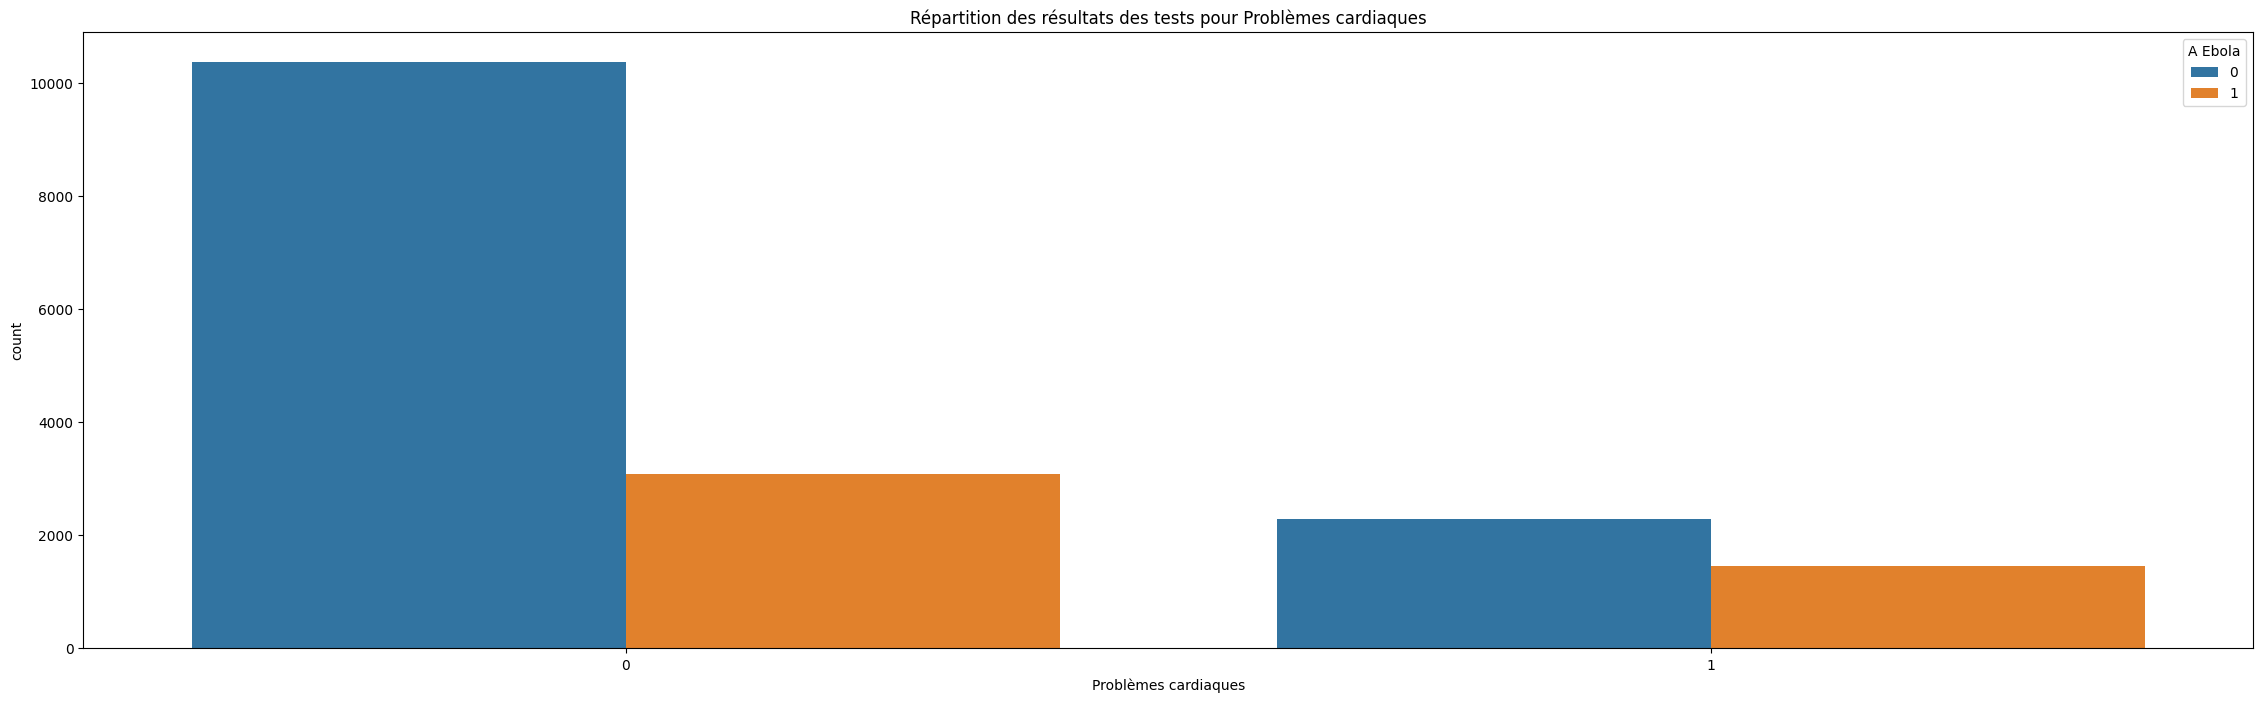

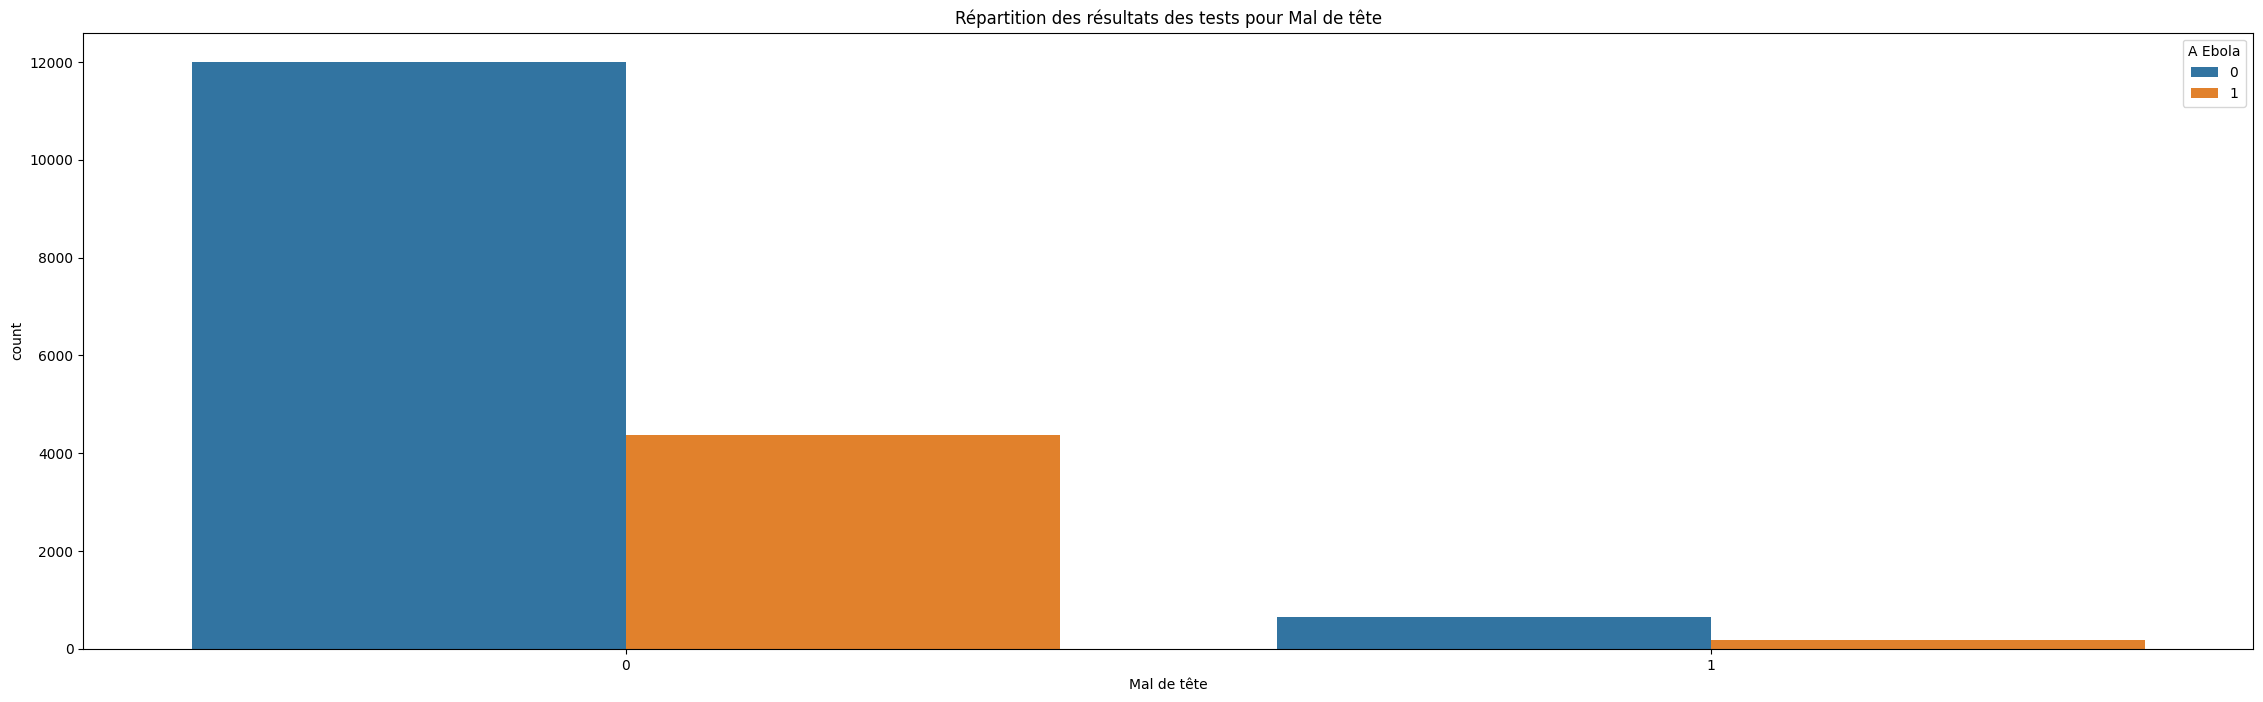

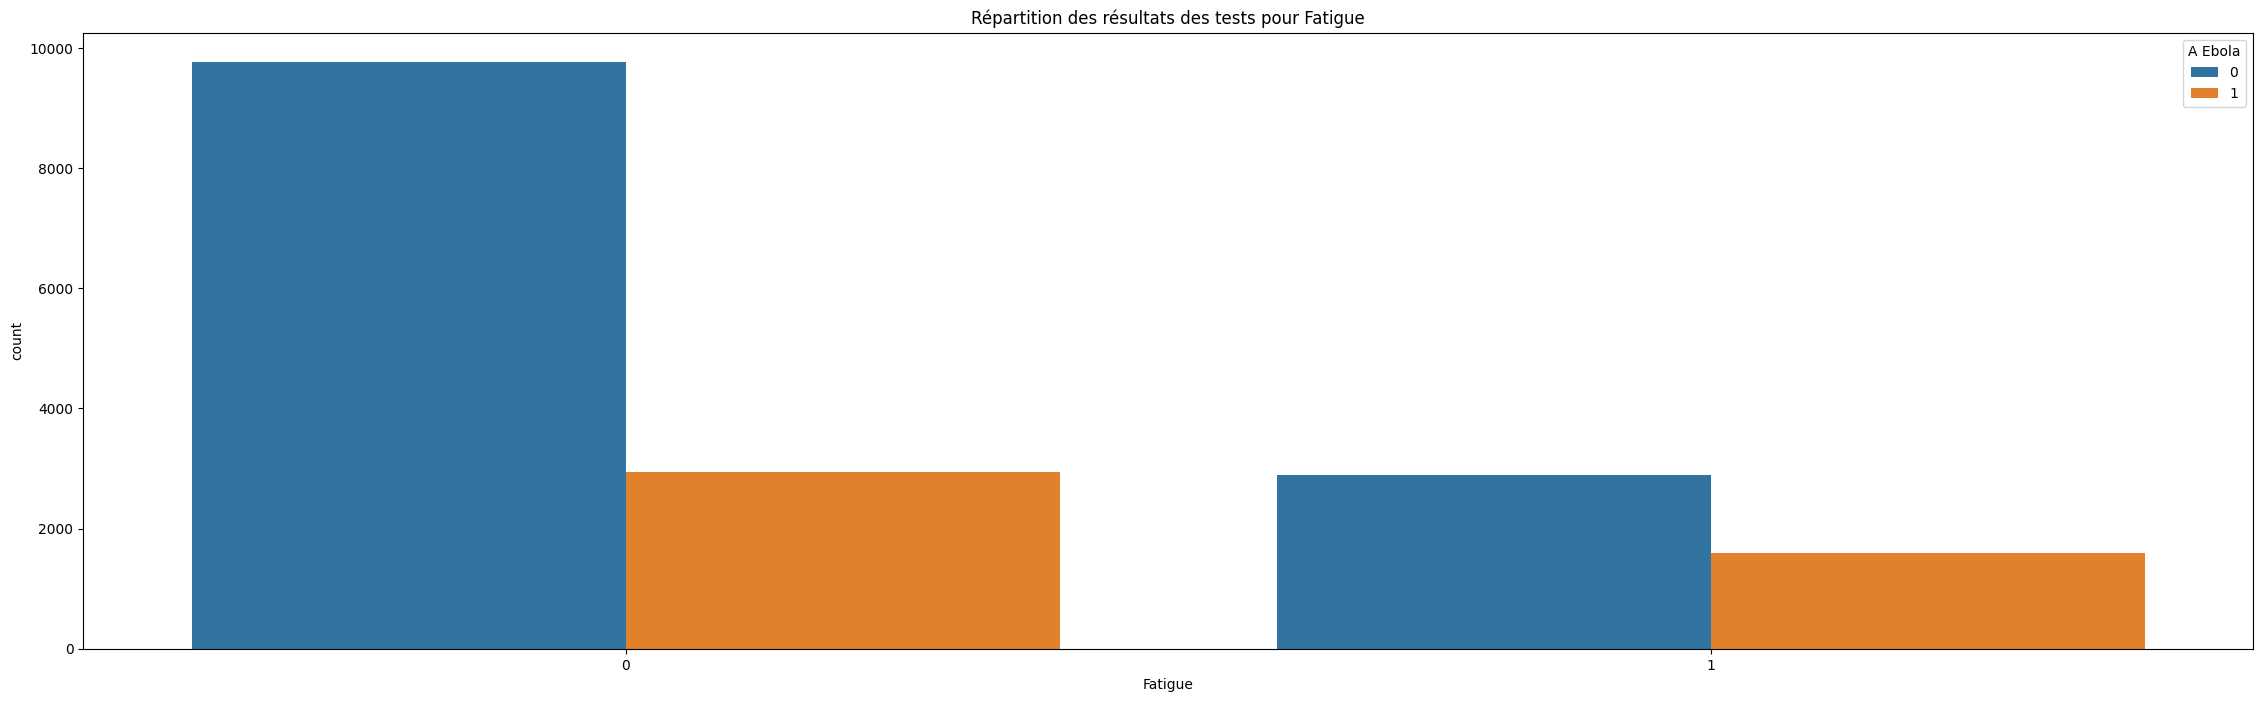

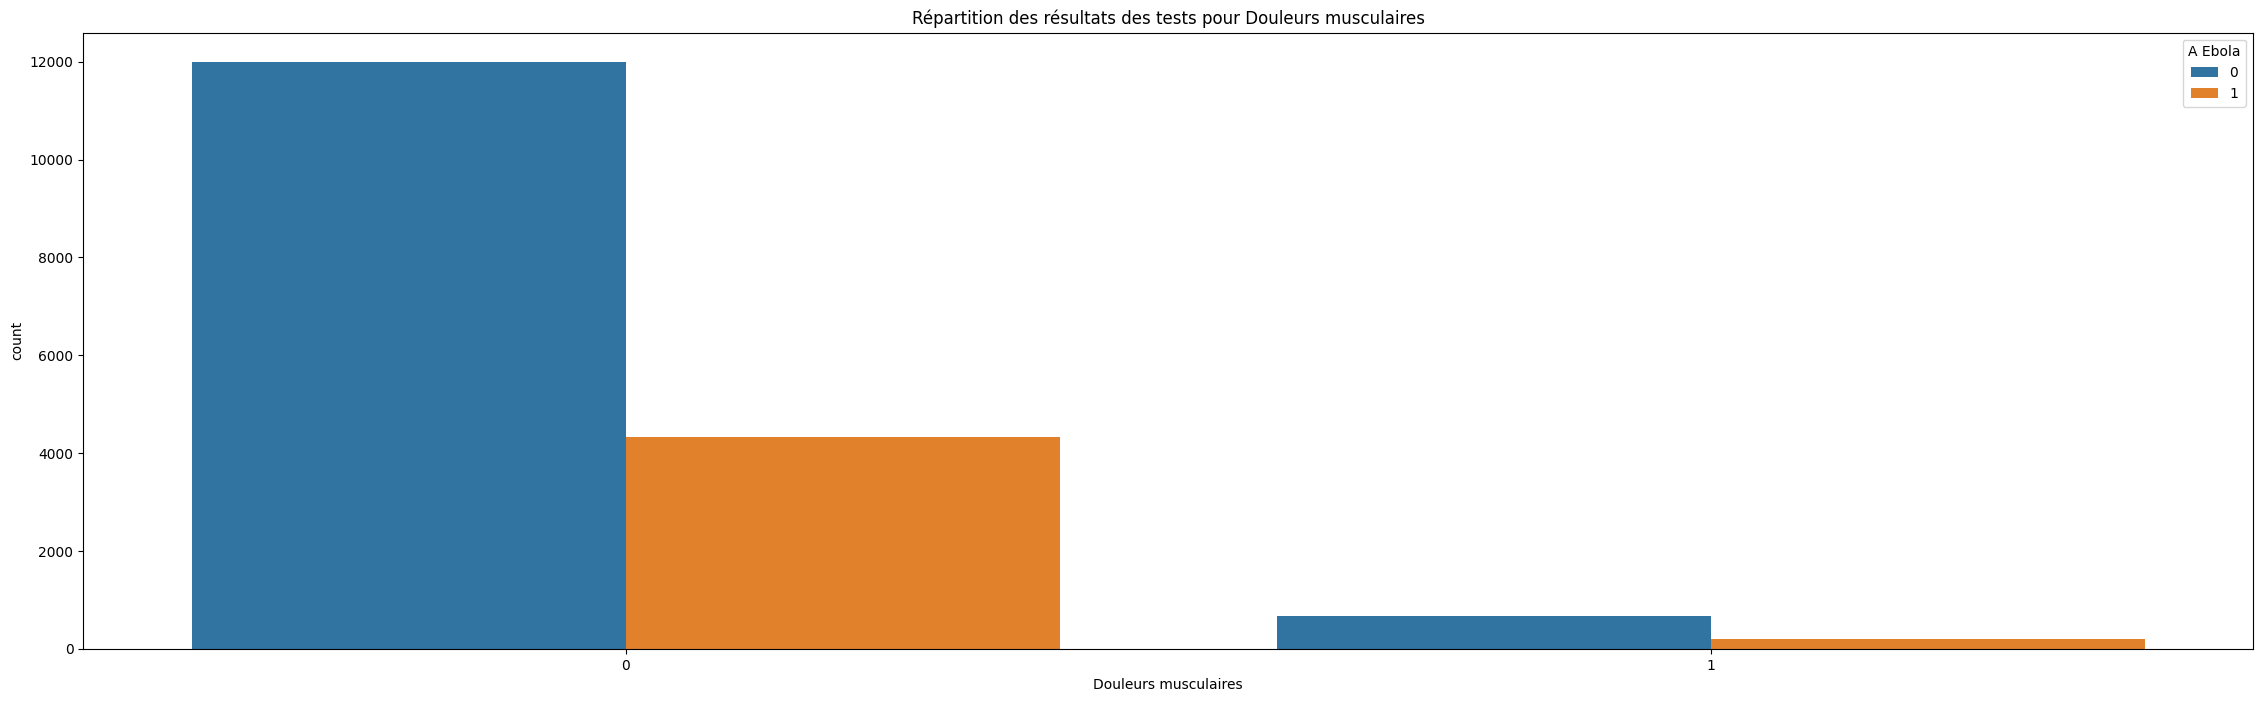

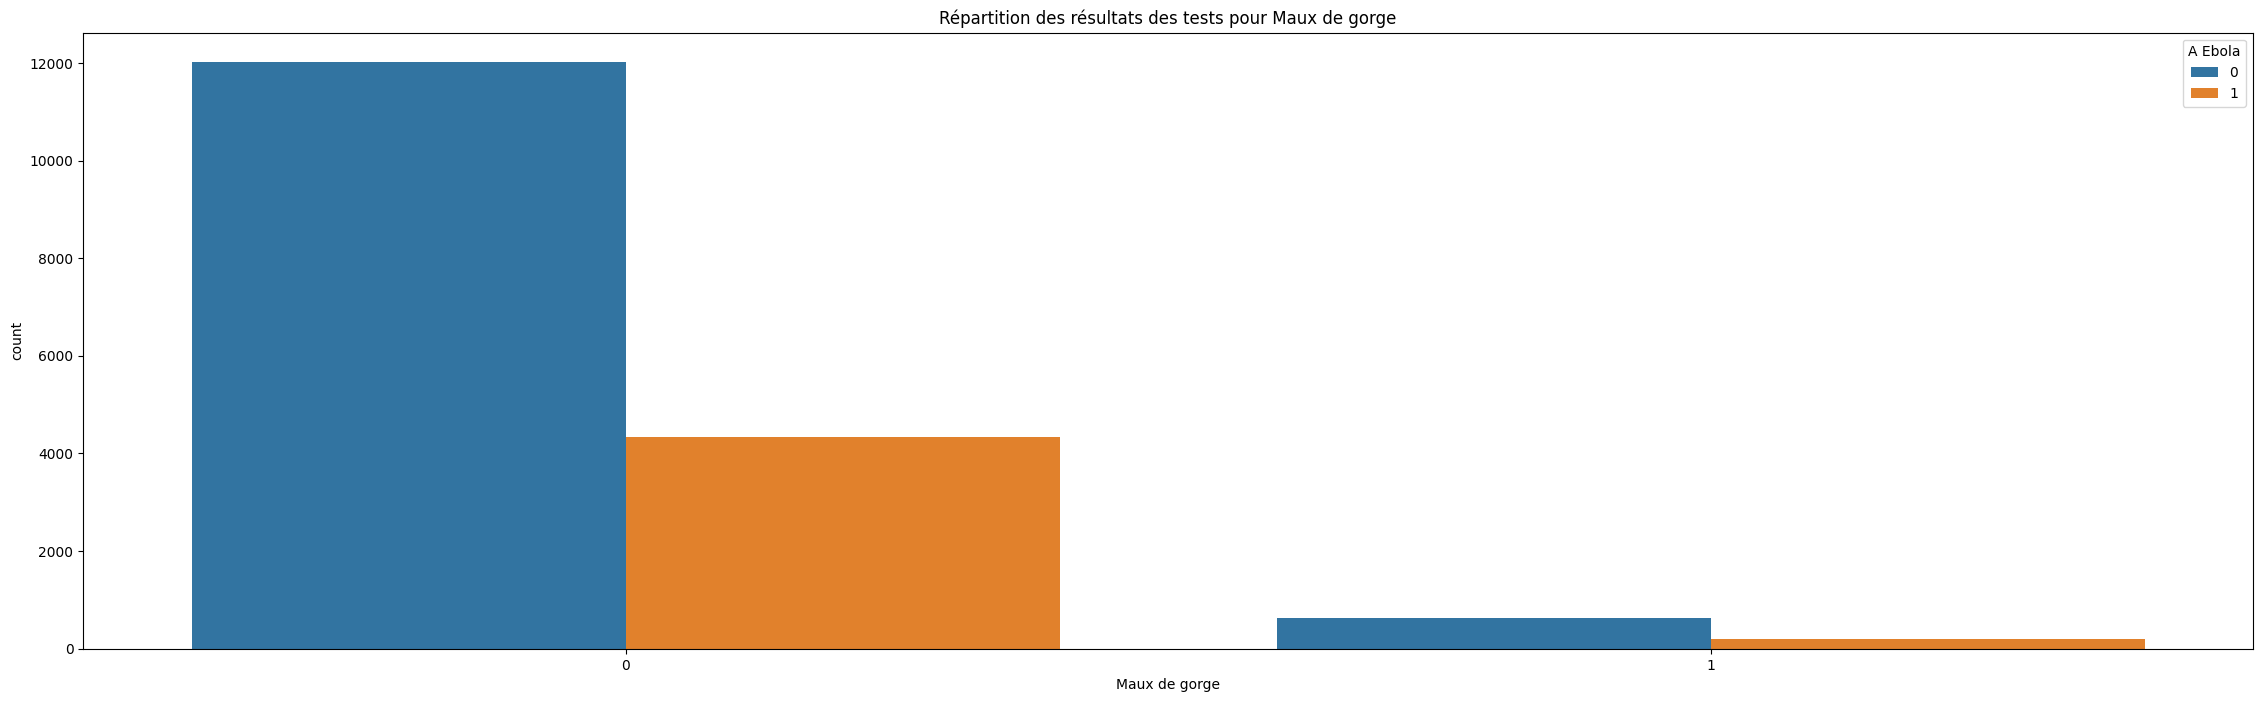

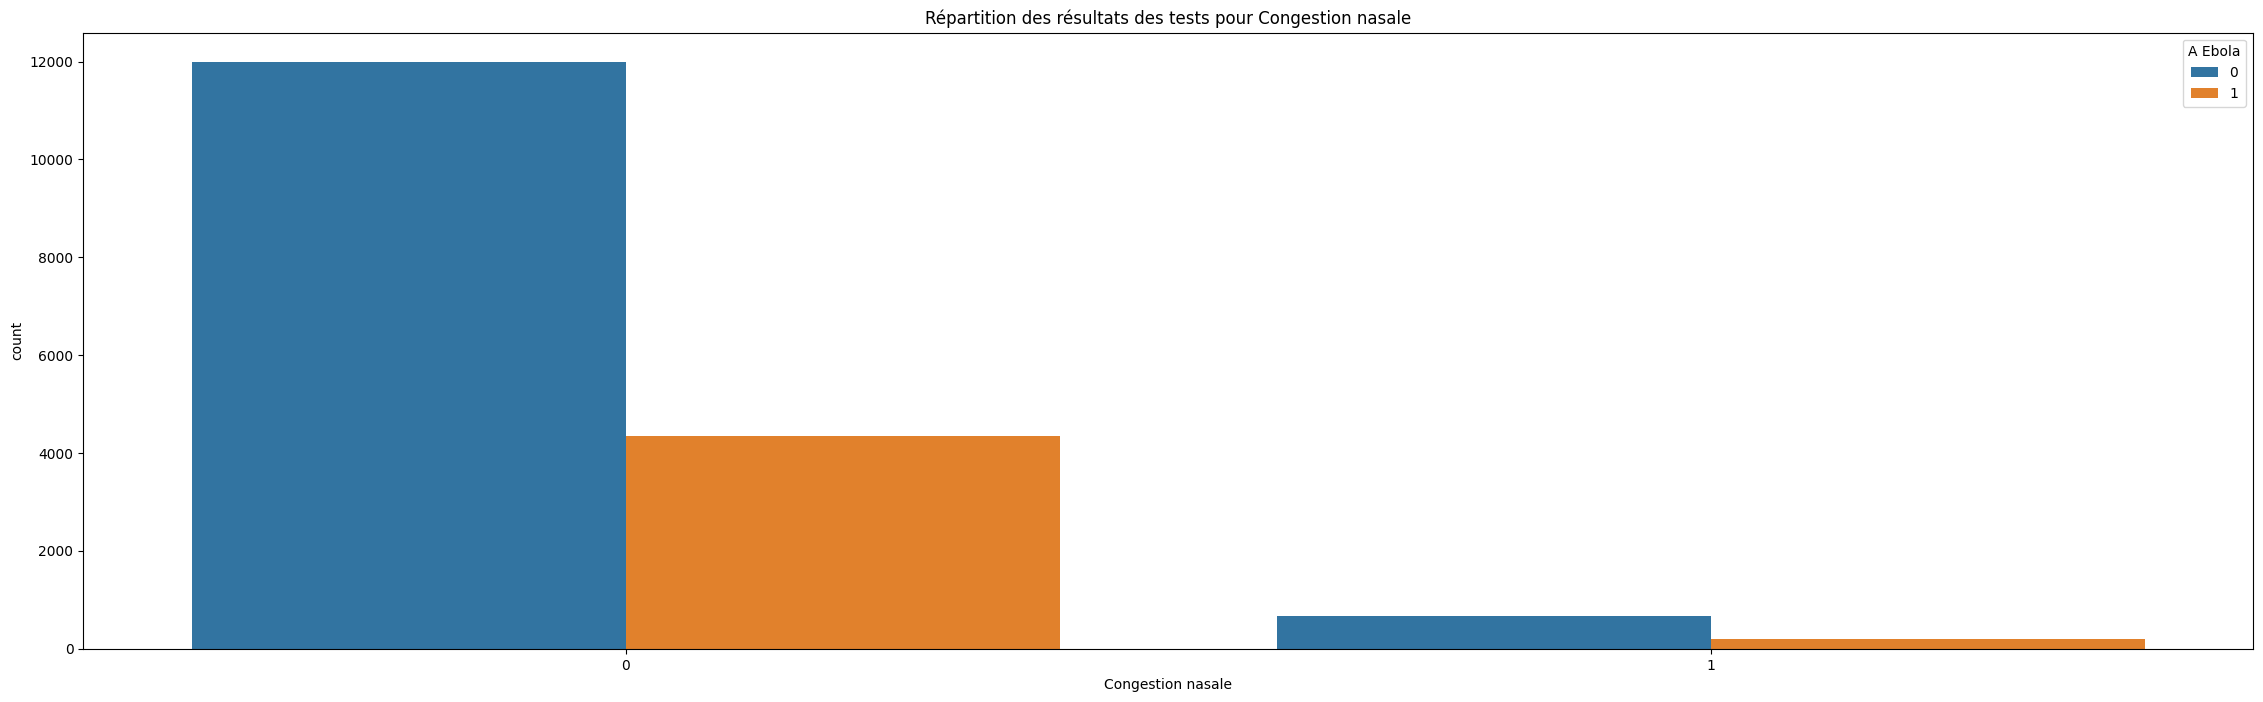

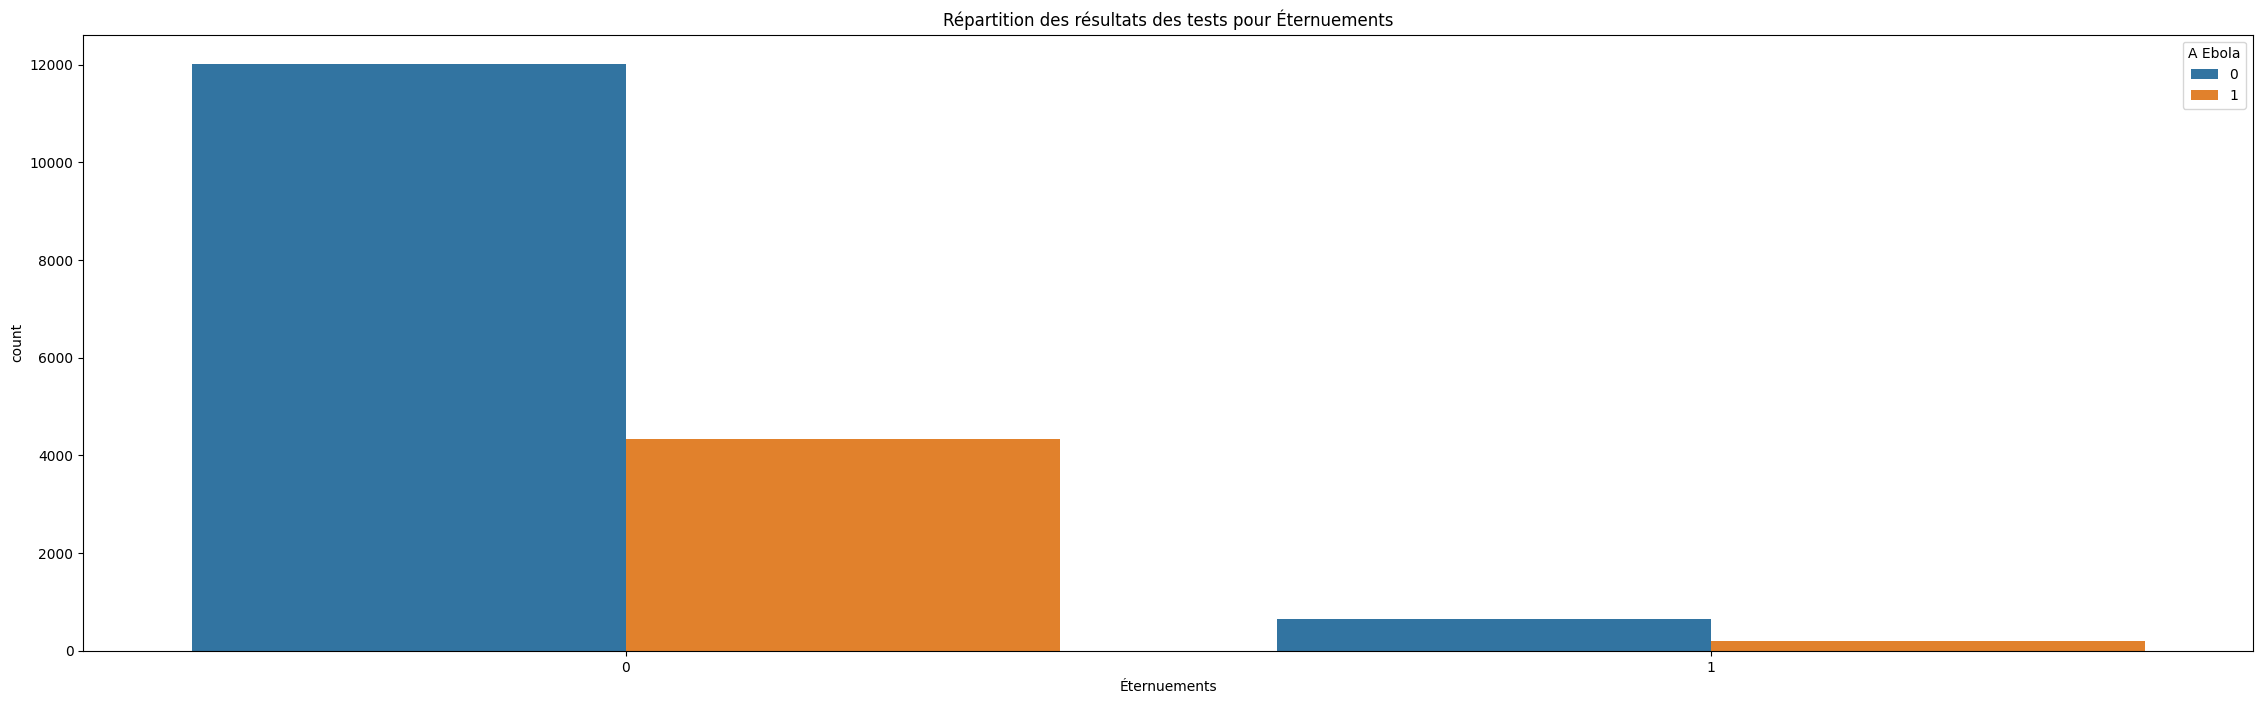

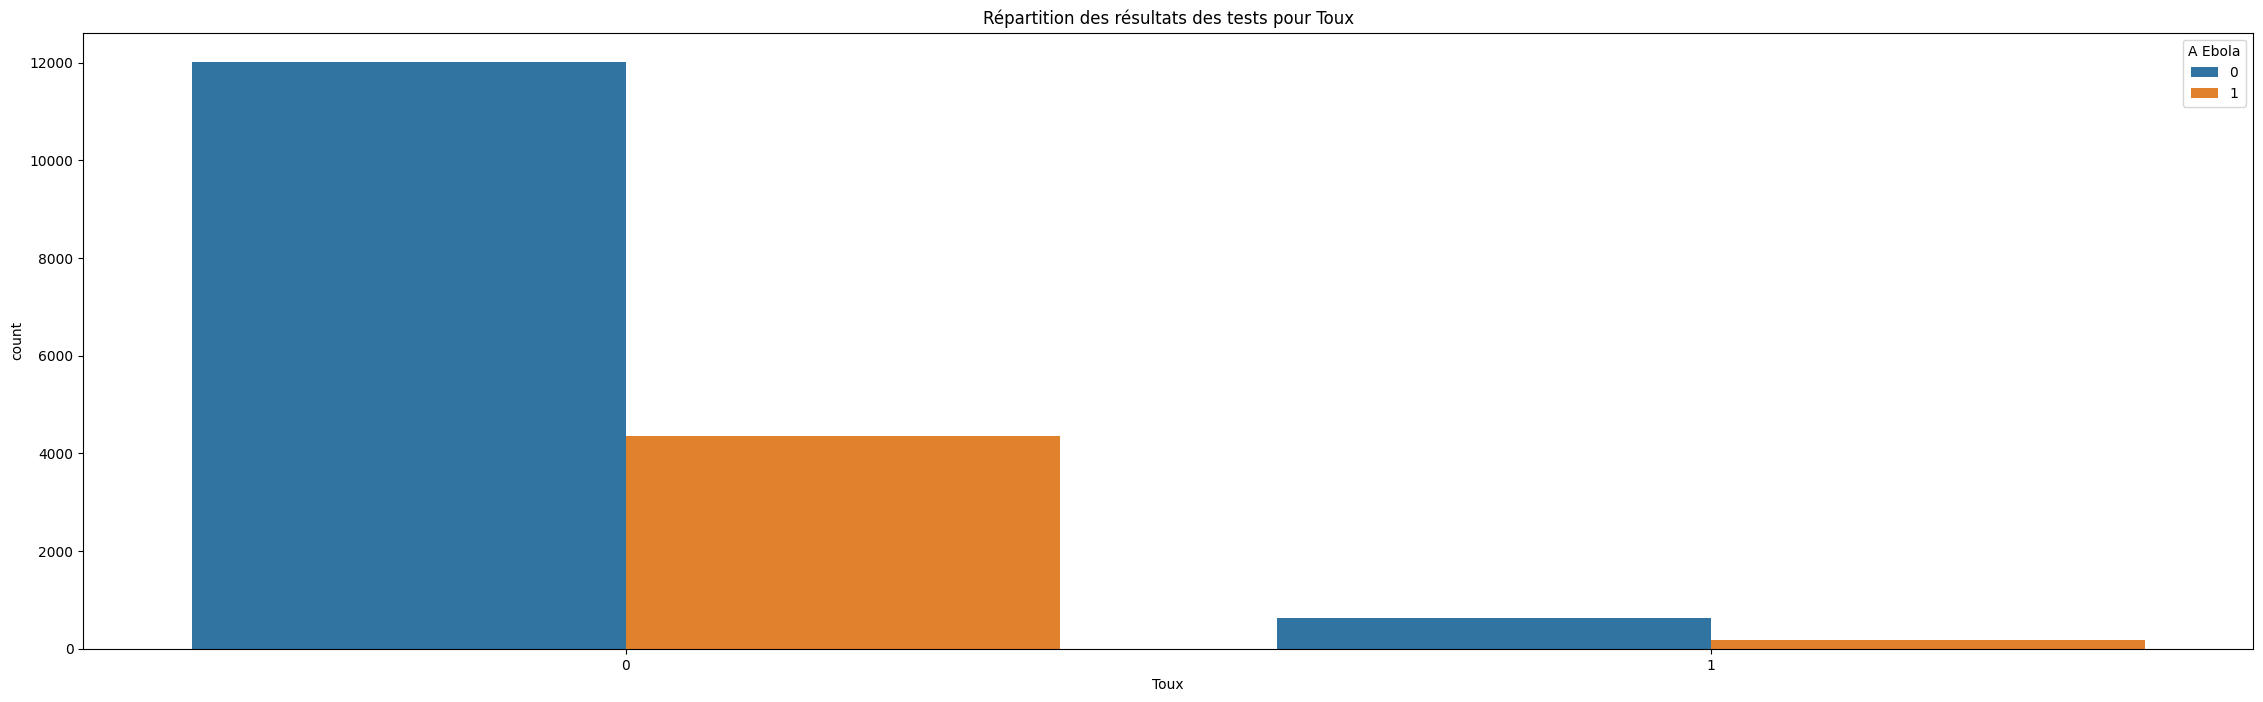

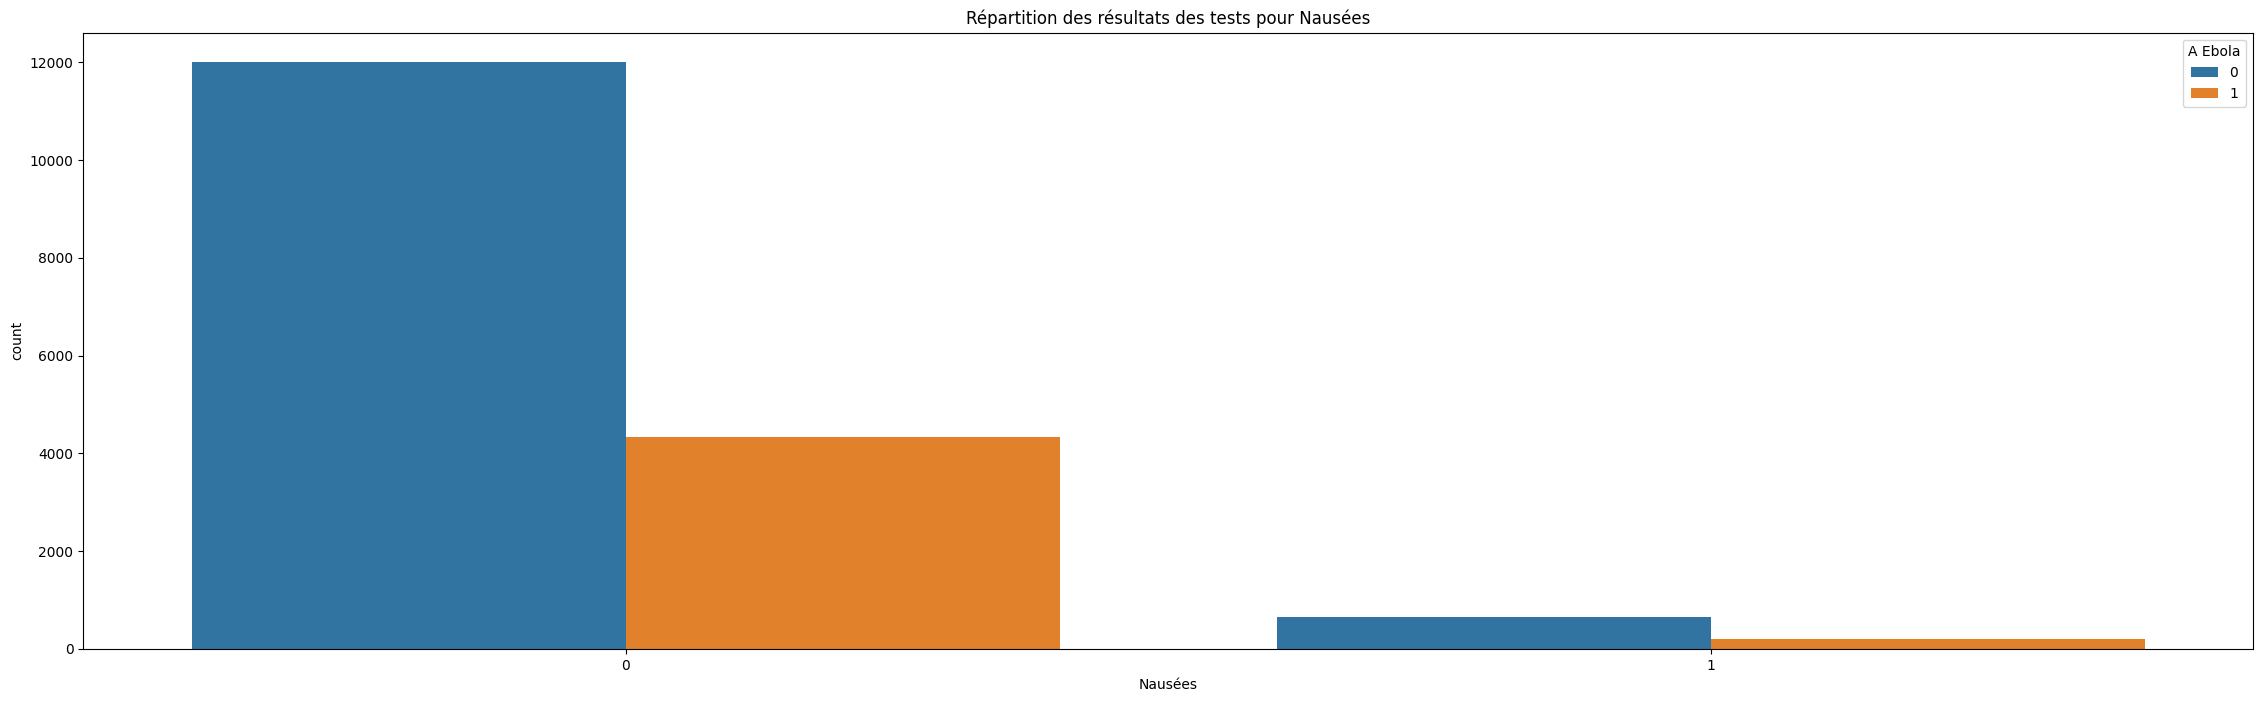

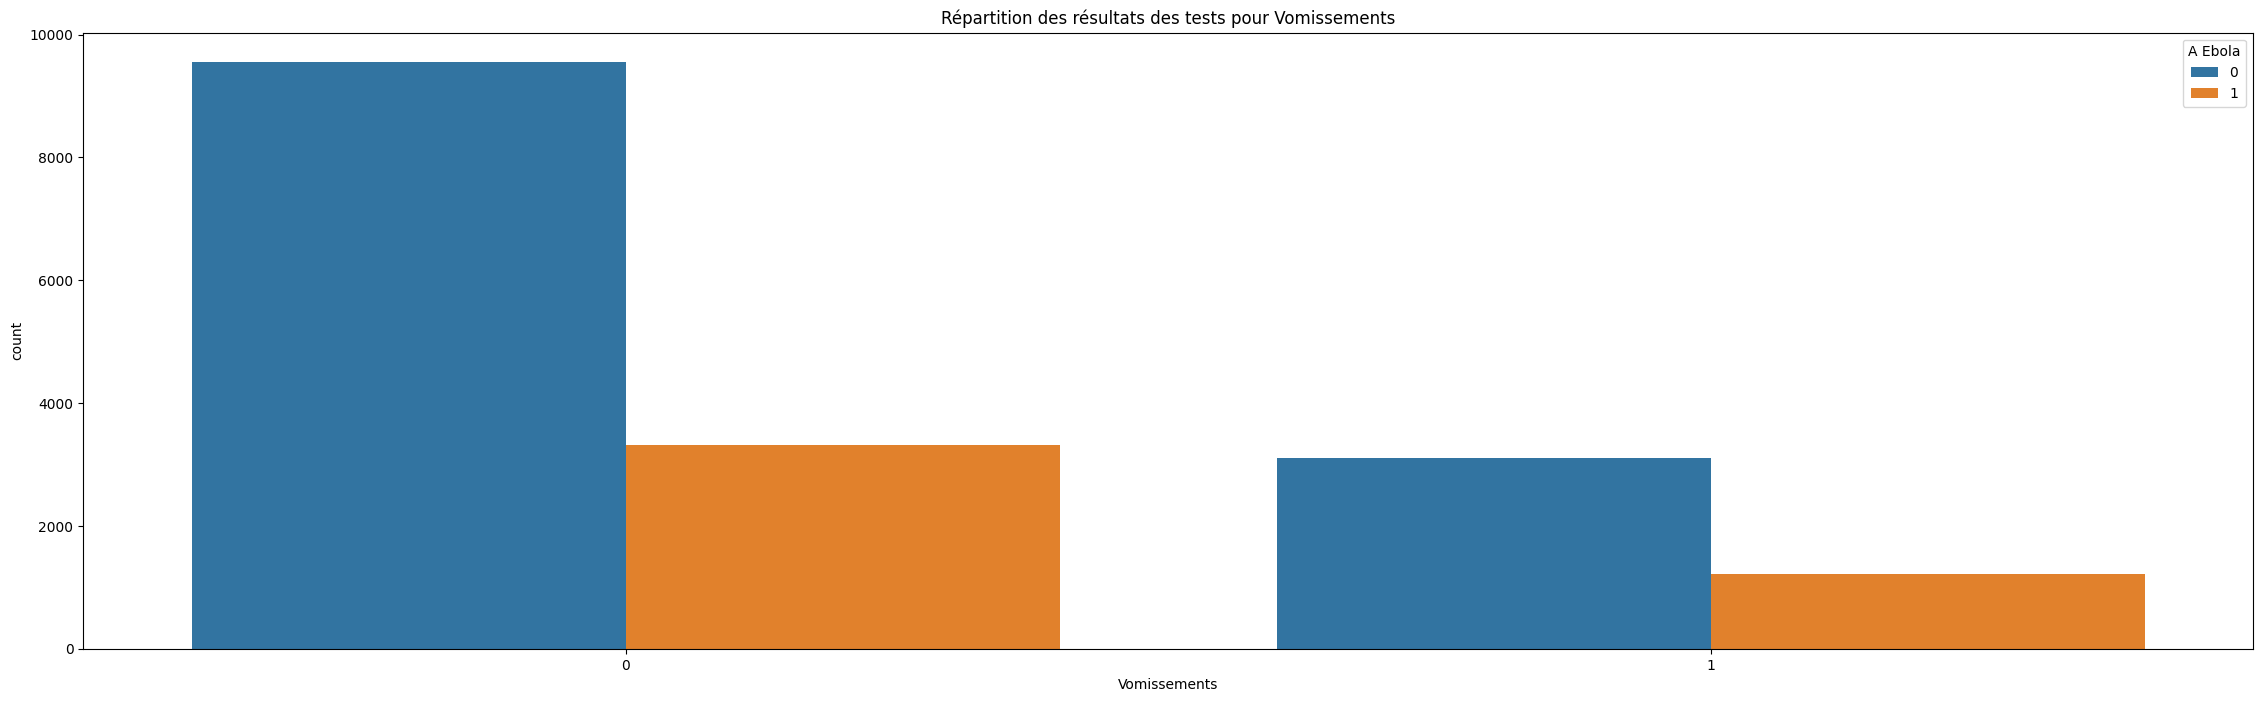

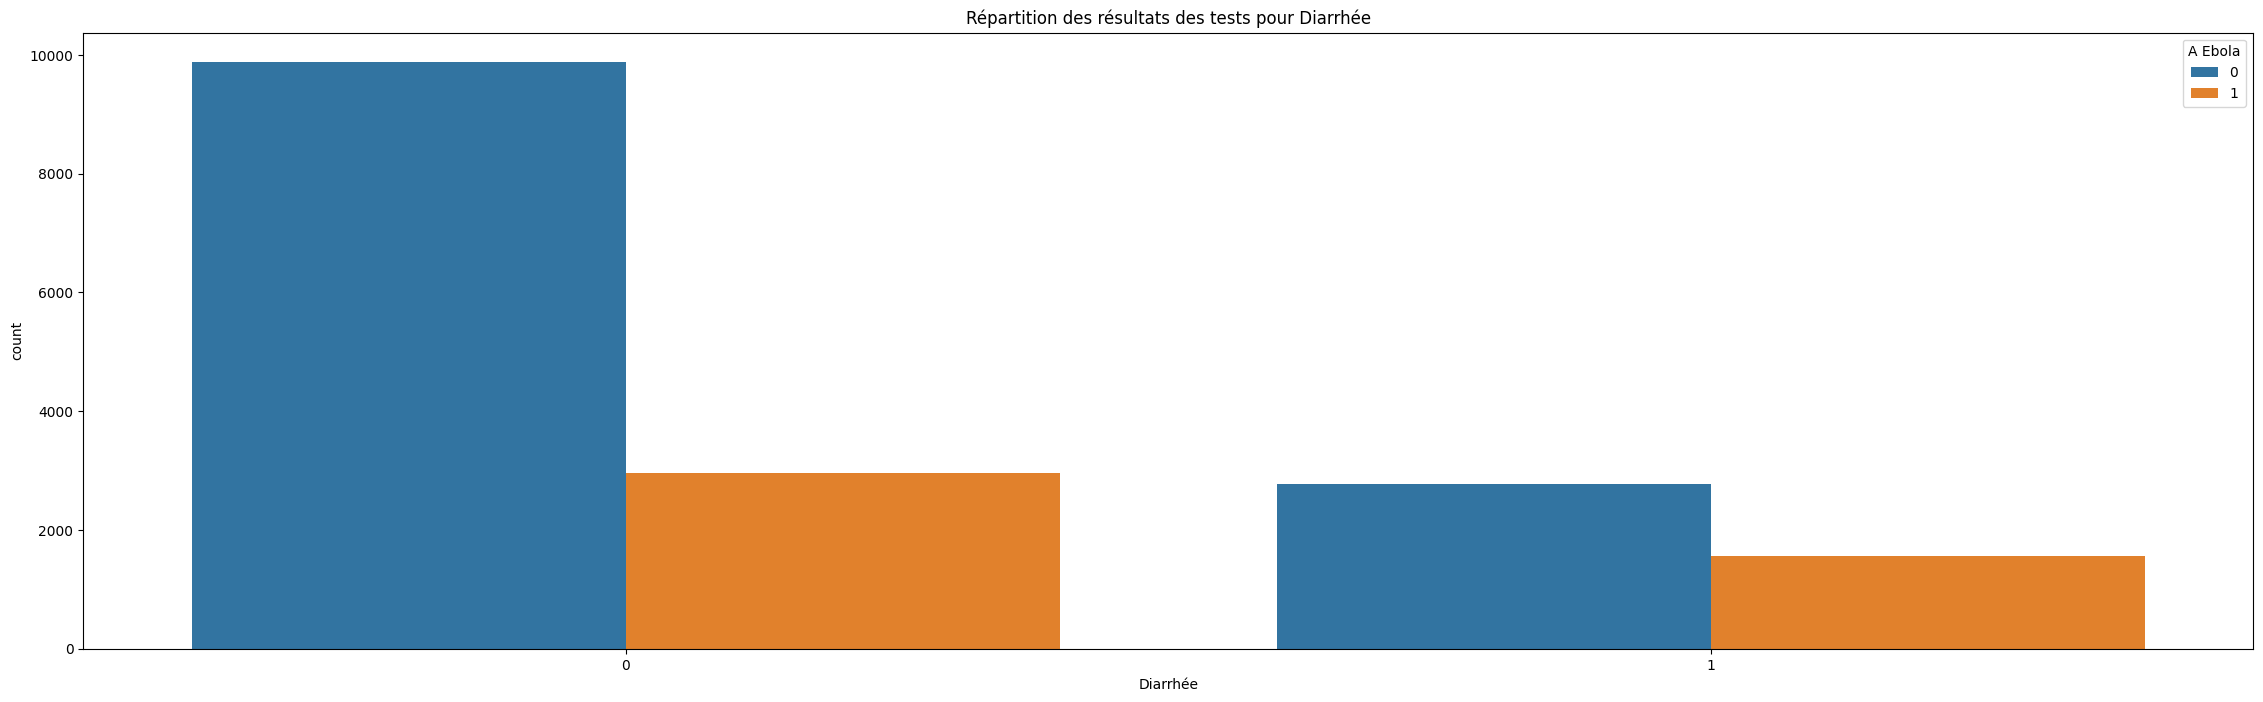

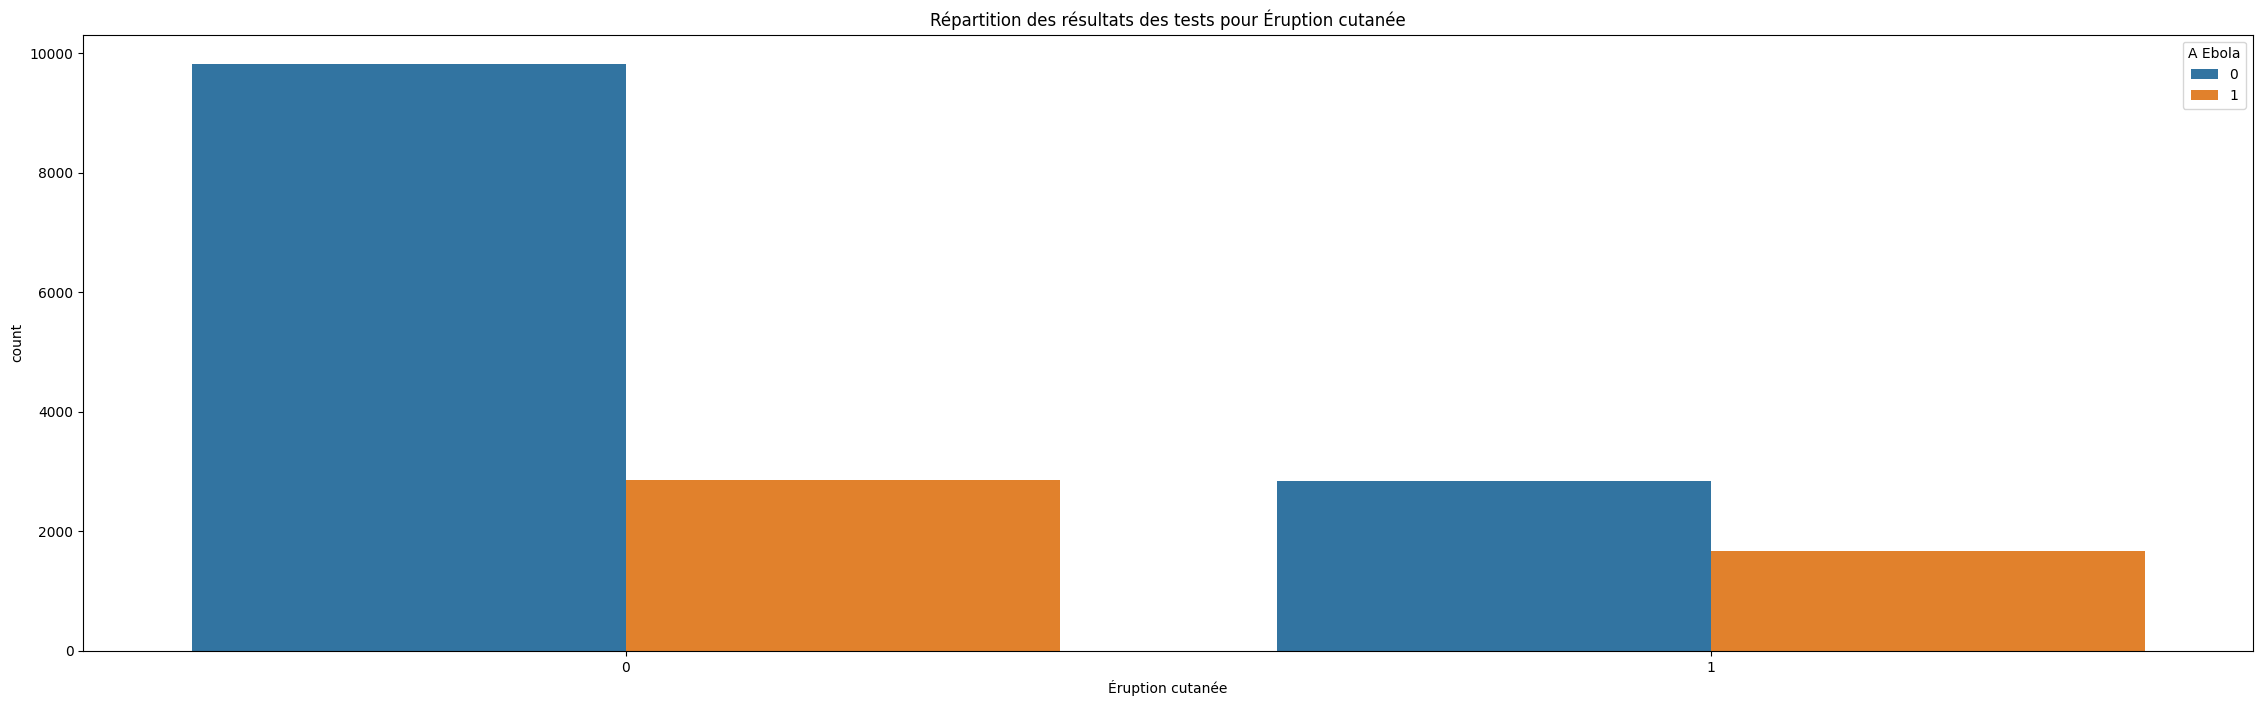

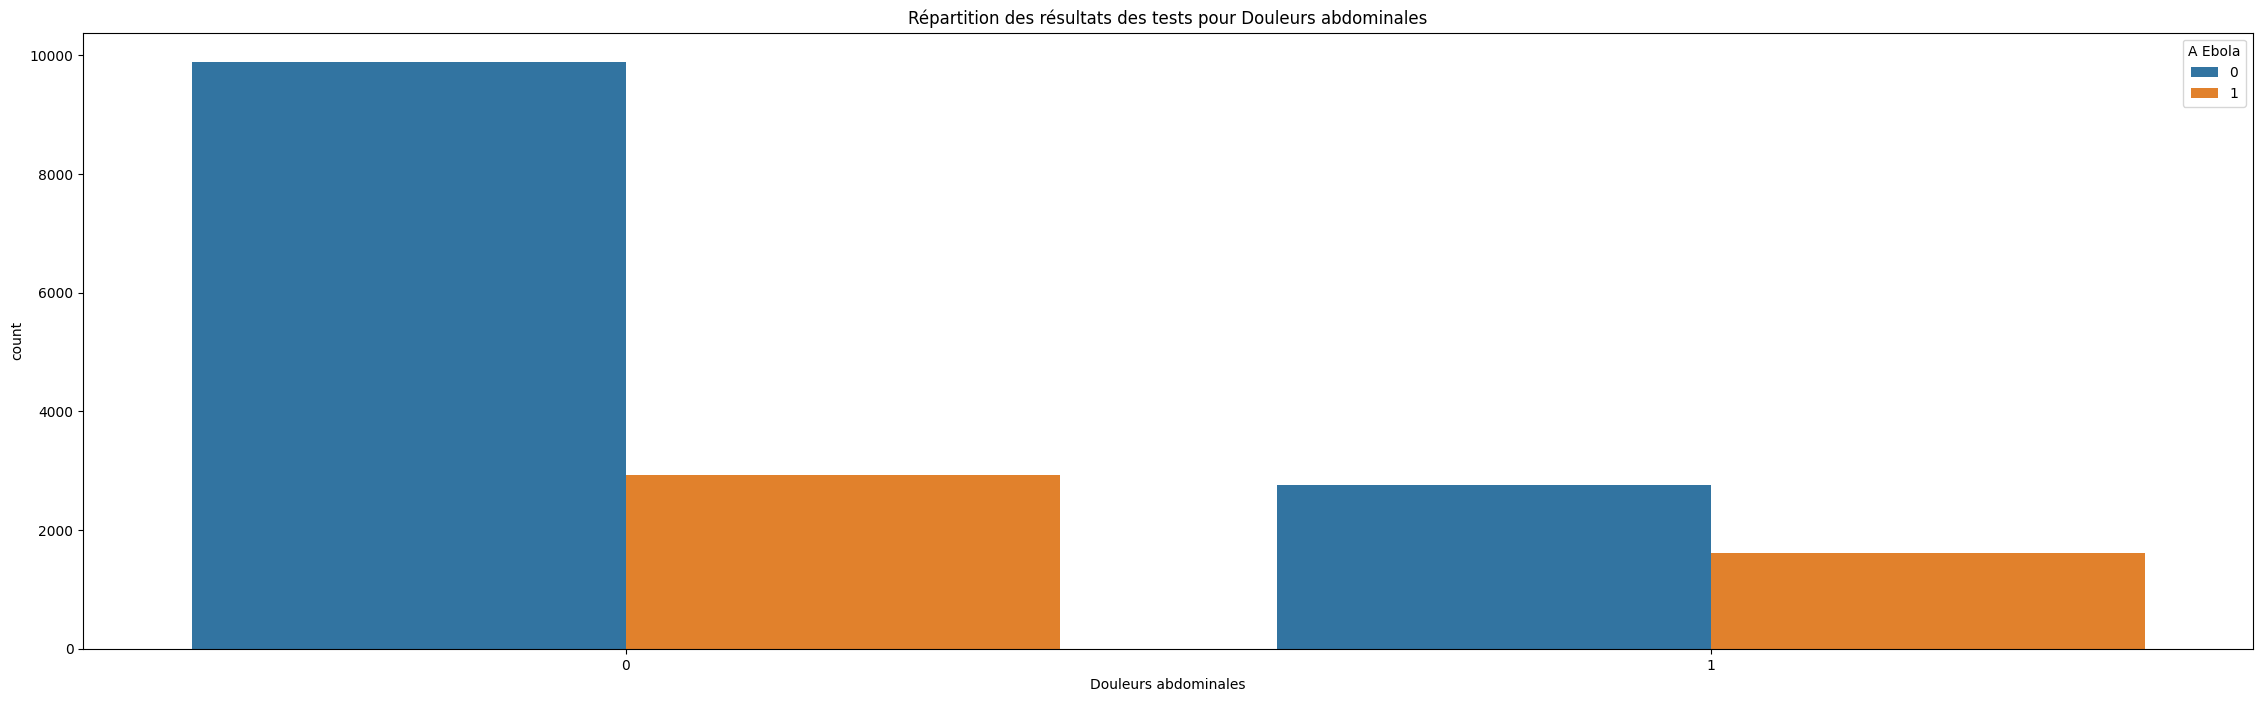

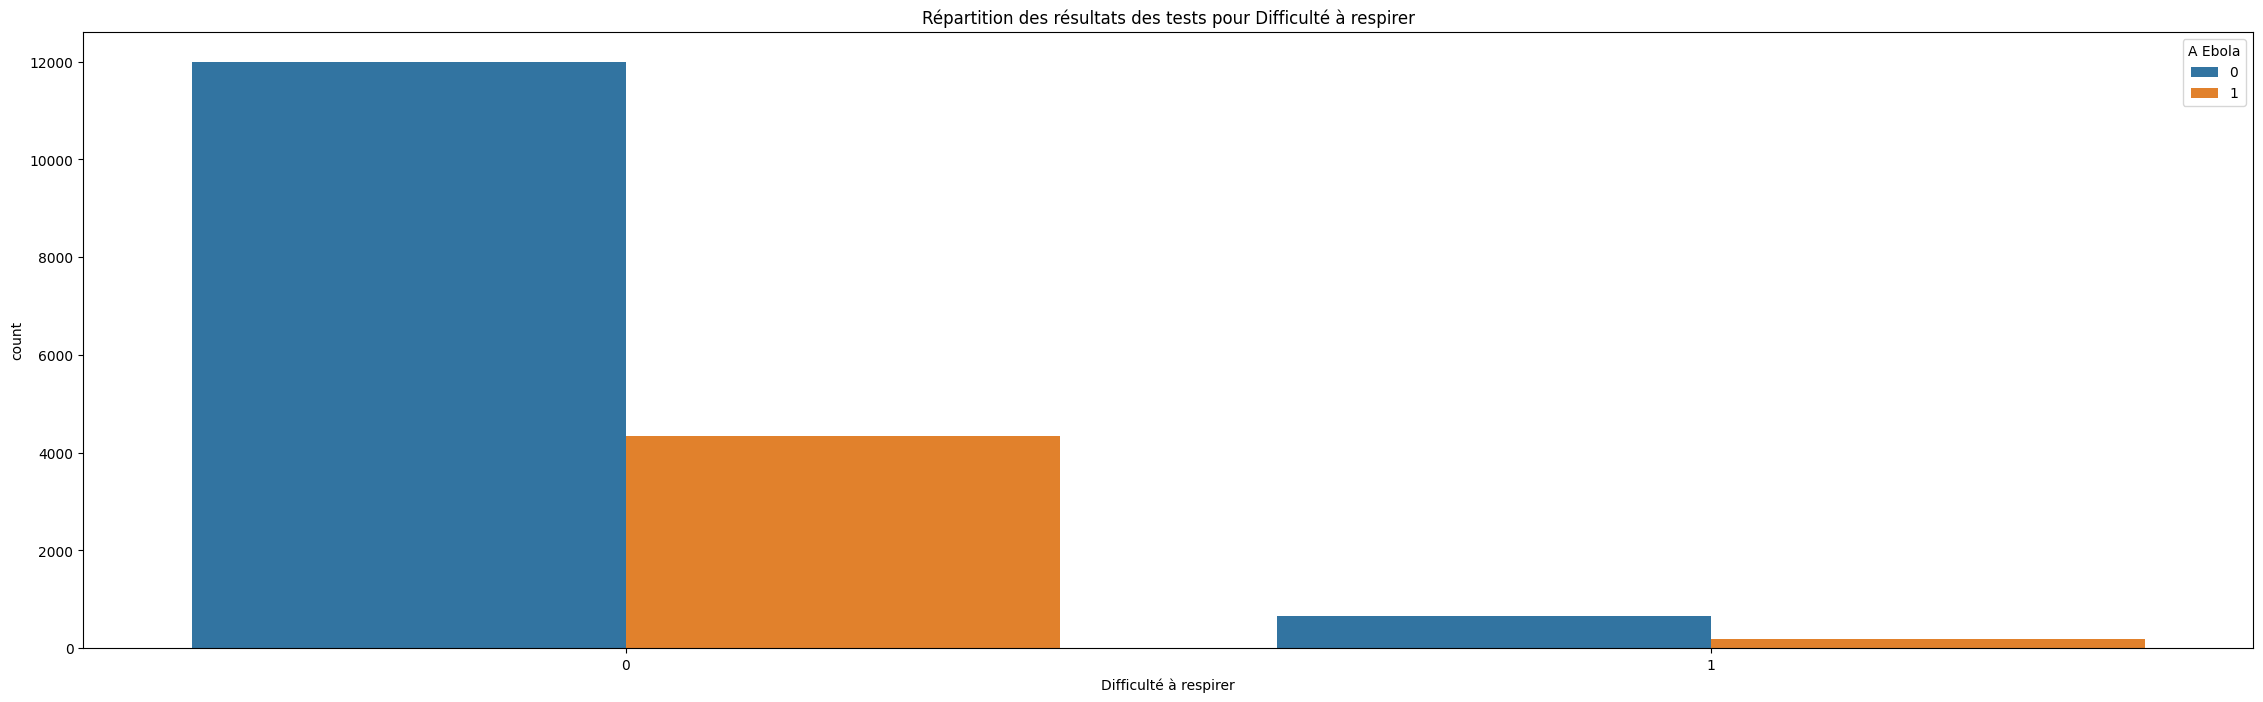

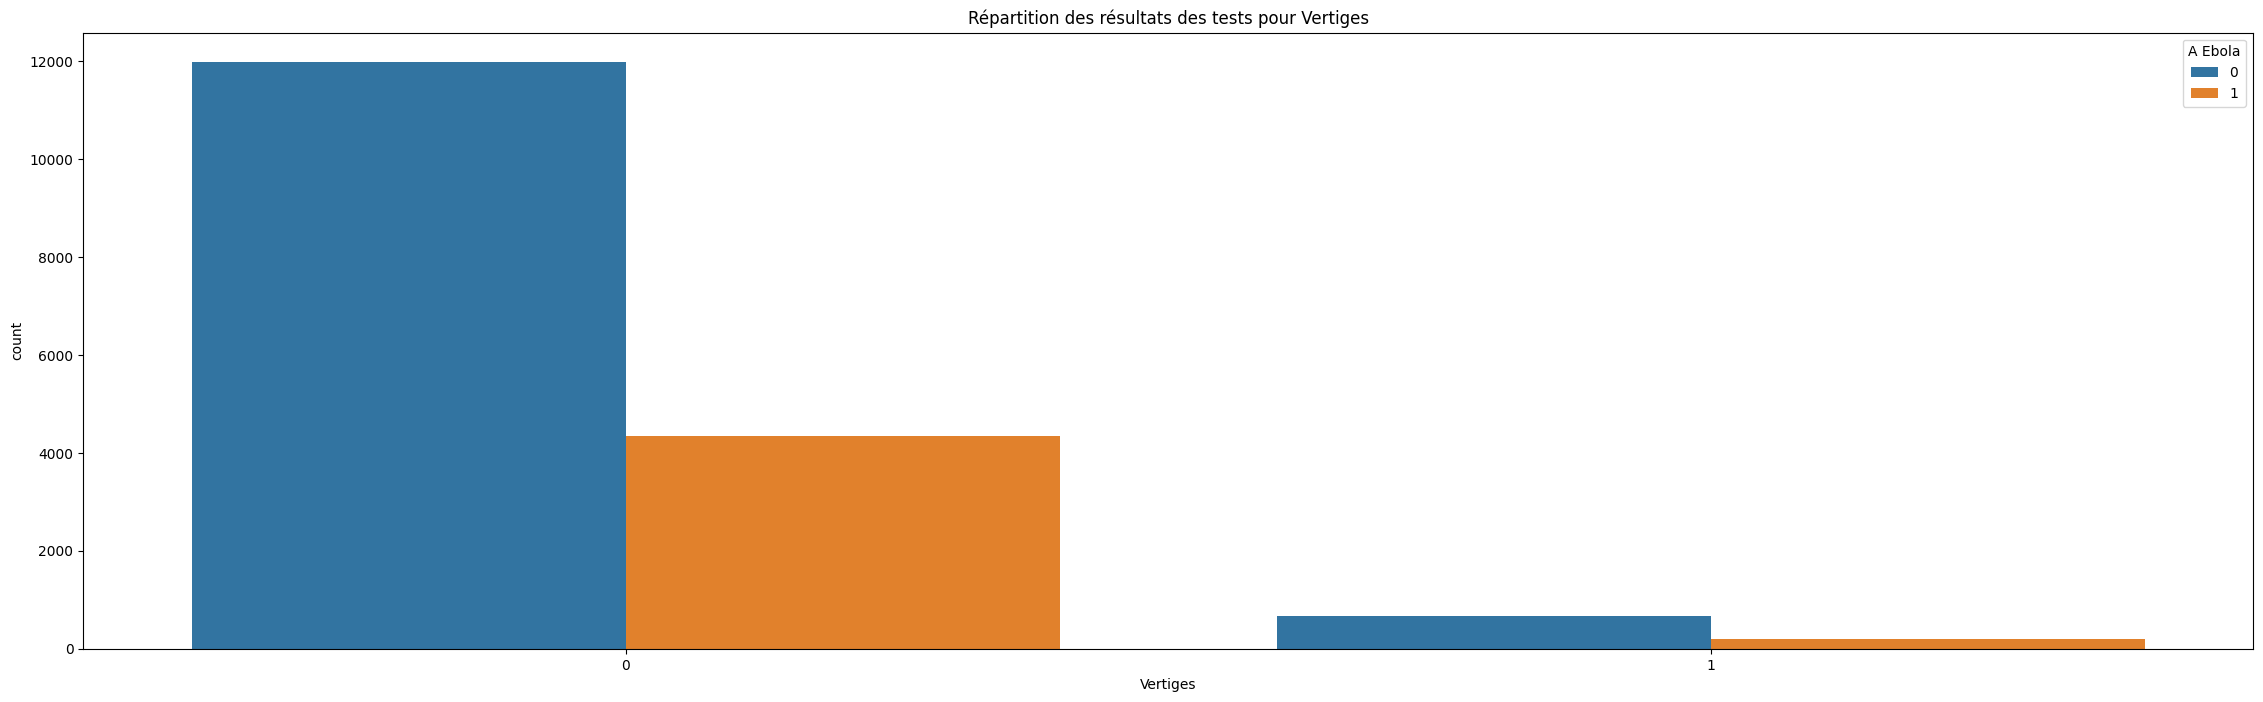

In [27]:
# Supprimez la colonne 'Symptômes' du DataFrame
columns_to_plot = [col for col in df.columns if col != 'Symptômes']

# Créez un graphique pour chaque colonne
for col in columns_to_plot:
    plt.figure(figsize=(28, 8))  # Ajustez la taille du graphique si nécessaire
    sns.countplot(x=col, hue='A Ebola', data=df)
    plt.title(f'Répartition des résultats des tests pour {col}')
    plt.show()

In [28]:
# Le modèle de régression logistique est souvent utilisé # dans le contexte de la classification, en particulier pour
# les tâches de classification binaire, où l'objectif est de prédire une variable binaire (par exemple, présence/absence, oui/non).

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Séparation des variables explicatives et de la variable cible
X = df.drop("A Ebola", axis=1)
y = df["A Ebola"]

# Standardisation des données numériques
numeric_columns = X.columns[4:]
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X)

# Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression logistique
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=50)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7414194299011053
Confusion Matrix:
[[2193  355]
 [ 534  356]]


L'accuracy est une mesure de la performance du modèle, représentant le pourcentage de prédictions correctes parmi toutes les prédictions. Cette partie du code fournit un indicateur de la qualité du modèle sur les données de test. Cependant, dans le cas de données déséquilibrées, l'accuracy seule peut ne pas être suffisante, et d'autres métriques (comme la matrice de confusion, la précision, le rappel, le F1-score) peuvent être nécessaires pour obtenir une évaluation plus complète du modèle.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Définir les hyperparamètres à tester
param_grid = {
    'penalty': ['l1', 'l2'],  # Type de régularisation
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse de la force de régularisation
    'solver': ['liblinear', 'saga'],  # Algorithmes de résolution
    'max_iter': [100, 500, 1000, 1500]  # Nombre maximal d'itérations
}

# Créer le modèle de régression logistique
model = LogisticRegression(random_state=50)

# Utiliser GridSearchCV pour la recherche par grille
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)  # n_jobs=-1 utilise tous les cœurs disponibles
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Entraîner le modèle avec les meilleurs hyperparamètres sur l'ensemble d'apprentissage complet
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy avec les meilleurs hyperparamètres:", accuracy)


Meilleurs hyperparamètres: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy avec les meilleurs hyperparamètres: 0.7417102966841187


## Pour l'enregistrement du modele de regression logistique

In [49]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ... (Votre code pour charger les données, diviser les ensembles, etc.)

# Définir les hyperparamètres à tester
param_grid = {
    'penalty': ['l1', 'l2'],  # Type de régularisation
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse de la force de régularisation
    'solver': ['liblinear', 'saga'],  # Algorithmes de résolution
    'max_iter': [100, 500, 1000, 1500]  # Nombre maximal d'itérations
}

# Créer le modèle de régression logistique
model = LogisticRegression(random_state=50)

# Utiliser GridSearchCV pour la recherche par grille
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Entraîner le modèle avec les meilleurs hyperparamètres sur l'ensemble d'apprentissage complet
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy avec les meilleurs hyperparamètres:", accuracy)



# Enregistrez le meilleur modèle sur le disque

save_path = '/content/drive/MyDrive/DataEbola/'  # Remplacez 'NomDossier' par le nom que vous souhaitez
joblib.dump(best_model, os.path.join(save_path, 'meilleur_modele_regression_logistique.joblib'))

ValueError: ignored

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17187 entries, 1 to 19998
Data columns (total 37 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Age                                                          17187 non-null  int64 
 1   Préfecture                                                   17187 non-null  object
 2   Résultats des tests de laboratoire                           17187 non-null  int64 
 3   Exposition potentielle                                       17187 non-null  int64 
 4   Voyage récent                                                17187 non-null  int64 
 5   Antécédents médicaux                                         17187 non-null  int64 
 6   Contacts avec des animaux                                    17187 non-null  int64 
 7   Pratiques d'hygiène                                          17187 non-null  int64 
 

# les relations entre

<Axes: xlabel="Pratiques d'hygiène", ylabel='count'>

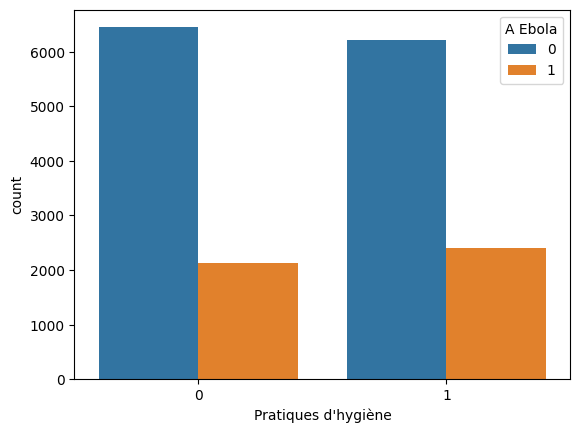

In [32]:
sns.countplot(x='Pratiques d\'hygiène' ,  hue='A Ebola',  data = df)

<Axes: xlabel='Contacts avec des animaux', ylabel='count'>

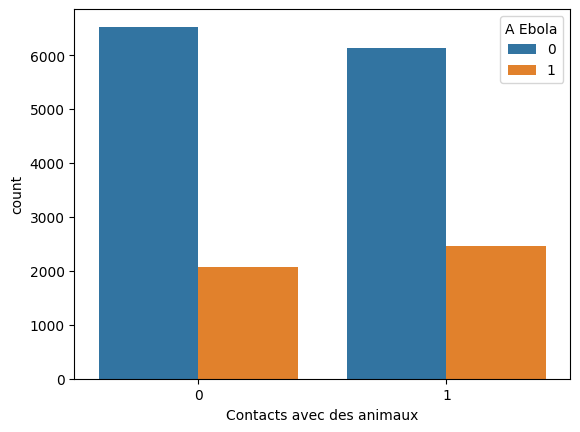

In [33]:
sns.countplot(x='Contacts avec des animaux' ,  hue='A Ebola',  data = df)

<Axes: xlabel='Voyage récent', ylabel='count'>

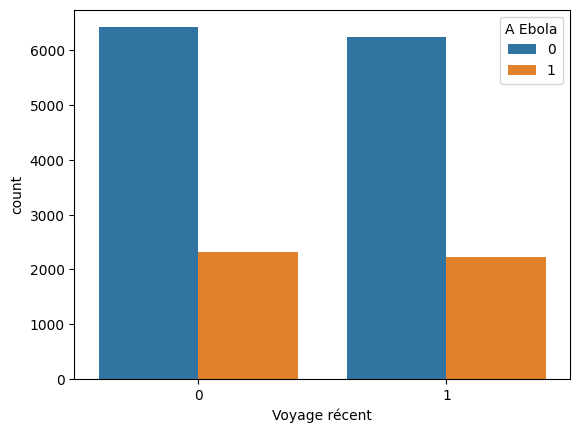

In [34]:
sns.countplot(x='Voyage récent' ,  hue='A Ebola',  data = df)

<Axes: xlabel='Sexe', ylabel='count'>

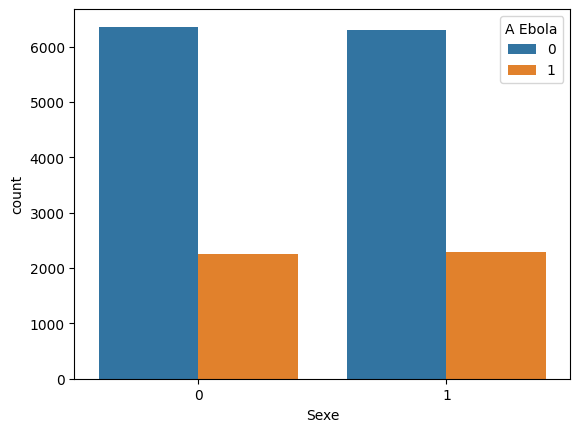

In [35]:
sns.countplot(x='Sexe' ,  hue='A Ebola',  data = df)

<Axes: xlabel='Voyage récent', ylabel='count'>

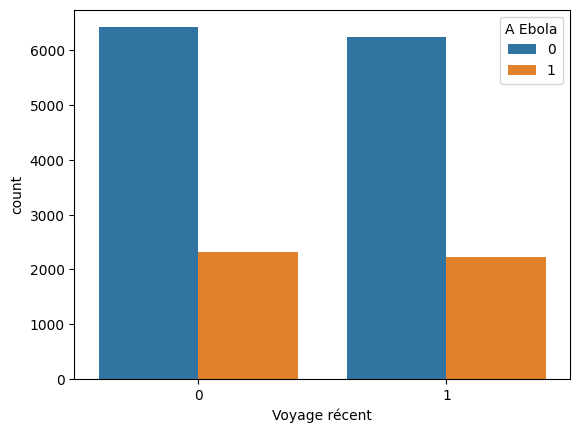

In [36]:
sns.countplot(x='Voyage récent' ,  hue='A Ebola',  data = df)

<Axes: xlabel='Résultats des tests de laboratoire', ylabel='count'>

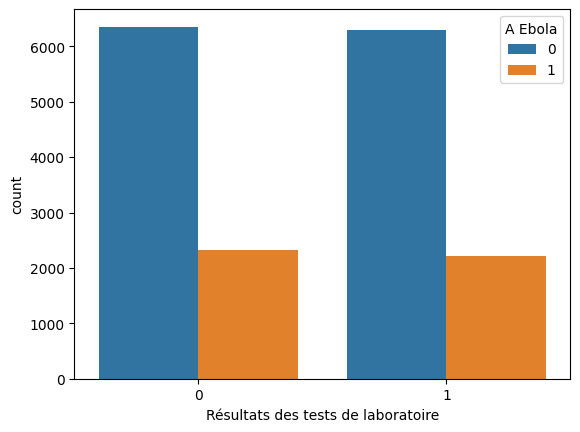

In [37]:
sns.countplot(x='Résultats des tests de laboratoire' ,  hue='A Ebola',  data = df)

<Axes: xlabel='Exposition potentielle', ylabel='count'>

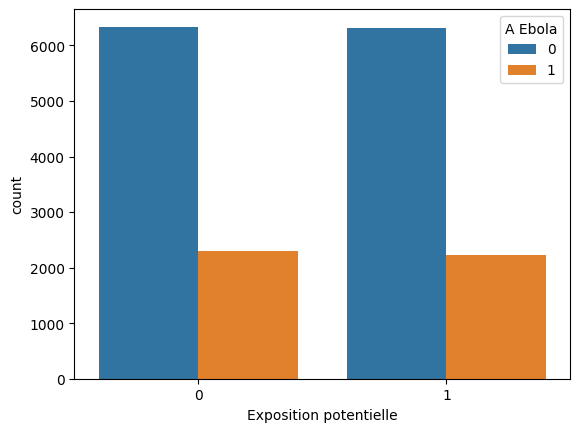

In [38]:
sns.countplot(x='Exposition potentielle' ,  hue='A Ebola',  data = df)

In [39]:
pd.crosstab(df['A Ebola'],df['Exposition potentielle'])



Exposition potentielle     0     1
A Ebola                           
0                       6338  6316
1                       2298  2235

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


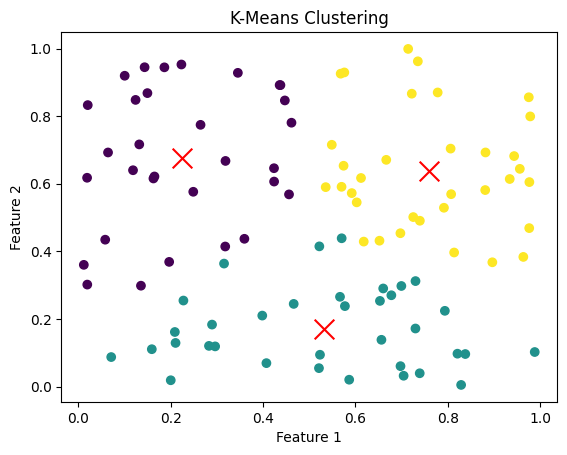

Inertia: 6.0355270719994145


In [40]:
# Importez les bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Générez des données aléatoires (remplacez cette étape par vos données réelles)
np.random.seed(0)
X = np.random.rand(100, 2)

# Créez une instance du modèle K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3)

# Entraînez le modèle K-Means
kmeans.fit(X)

# Obtenez les clusters attribués
labels = kmeans.predict(X)

# Obtenez les coordonnées des centres des clusters
cluster_centers = kmeans.cluster_centers_

# Visualisez les clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

# Évaluez votre modèle (facultatif)
inertia = kmeans.inertia_  # Inertie
print("Inertia:", inertia)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

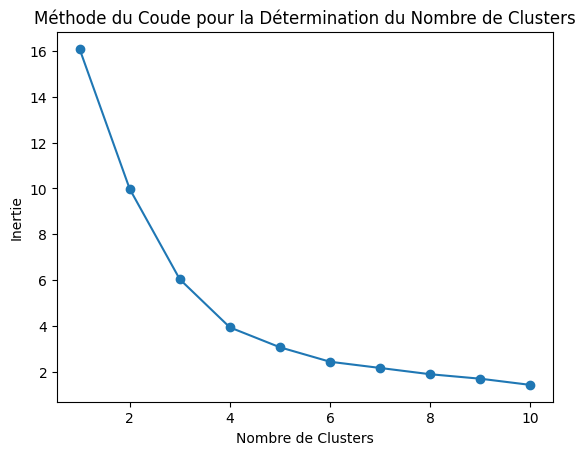

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Générer des données aléatoires (remplacer cette étape par vos données réelles)
np.random.seed(0)
X = np.random.rand(100, 2)

# Essayer différents nombres de clusters
nombre_clusters = range(1, 11)
inertie_values = []

for k in nombre_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertie_values.append(kmeans.inertia_)

# Tracer la courbe de la méthode du coude
plt.plot(nombre_clusters, inertie_values, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour la Détermination du Nombre de Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


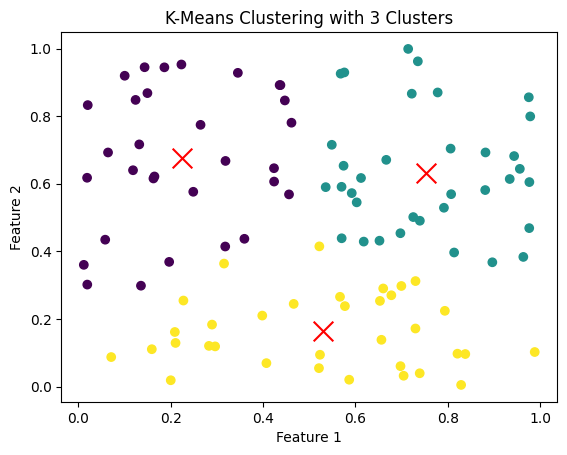

In [42]:
kmeans_optimal = KMeans(n_clusters=3)
kmeans_optimal.fit(X)
labels_optimal = kmeans_optimal.labels_

# Visualiser les clusters
plt.scatter(X[:, 0], X[:, 1], c=labels_optimal)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], marker='x', s=200, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with 3 Clusters')
plt.show()


In [43]:
from sklearn.preprocessing import StandardScaler

# Étape 4 : Normalisation des données (si nécessaire)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [44]:
from sklearn.preprocessing import StandardScaler

# Séparation des variables explicatives et de la variable cible
X = df.drop("A Ebola", axis=1)  # Suppression de la colonne cible
y = df["A Ebola"]

# Standardisation des données numériques (supposons que toutes les colonnes numériques commencent à partir de la colonne 4)
numeric_columns = X.columns[4:]
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Encodage des variables catégorielles (supposons que toutes les colonnes catégorielles sont les 3 premières)
#categorical_columns = X.columns[:3]
#X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Sélectionner automatiquement toutes les colonnes catégorielles
categorical_columns = X.select_dtypes(include=['object']).columns

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Division des données en ensembles d'apprentissage, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Divisez les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez et entraînez un modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faites des prédictions
y_pred = model.predict(X_test)

# Évaluez le modèle
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


ValueError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier

# Creation de modèle de Deep Learning " réseau de neurones artificiels à propagation "
model = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)


In [ ]:
# Étape 6 : Entraîner le modèle
model.fit(X_train, y_train)


In [ ]:
# Étape 7 : Évaluer le modèle
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Matrice de confusion :")
print(conf_matrix)
print("Rapport de classification :")
print(classification_rep)

ENREGISTREMENT DE CE MODELE :

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
from google.colab import drive
drive.mount('/content/drive')

# Séparation des variables explicatives et de la variable cible
X = df.drop("A Ebola", axis=1)
y = df["A Ebola"]

# Standardisation des données numériques
numeric_columns = X.columns[4:]
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X)

# Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Création du modèle de réseau de neurones artificiels
neural_network_model = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)

# Entraînement du modèle
neural_network_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = neural_network_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Réseau de Neurones Artificiels:")
print(f"Accuracy: {accuracy}")
print("Matrice de confusion :")
print(conf_matrix)
print("Rapport de classification :")
print(classification_rep)

# Enregistrez le modèle sur le disque
joblib.dump(neural_network_model, 'modele_reseau_neurones.joblib')


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Création du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
rf_model.fit(X_train, y_train)

# Évaluation du modèle
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Affichage des résultats
print(f"Accuracy (Random Forest): {accuracy_rf}")
print("Matrice de confusion (Random Forest) :")
print(conf_matrix_rf)
print("Rapport de classification (Random Forest) :")
print(classification_rep_rf)


Enregistrement de ce modele

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


# Séparation des variables explicatives et de la variable cible
X = df.drop("A Ebola", axis=1)
y = df["A Ebola"]

# Standardisation des données numériques
numeric_columns = X.columns[4:]
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X)

# Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Création du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print("Matrice de confusion :")
print(conf_matrix_rf)
print("Rapport de classification :")
print(classification_rep_rf)

# Enregistrez le modèle sur le disque
joblib.dump(rf_model, 'modele_random_forest.joblib')


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Création du modèle d'arbre de décision
dt_model = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
dt_model.fit(X_train, y_train)

# Évaluation du modèle
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Affichage des résultats
print(f"Accuracy (Decision Tree): {accuracy_dt}")
print("Matrice de confusion (Decision Tree) :")
print(conf_matrix_dt)
print("Rapport de classification (Decision Tree) :")
print(classification_rep_dt)




Enregistrement de ce modele

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Séparation des variables explicatives et de la variable cible
X = df.drop("A Ebola", axis=1)
y = df["A Ebola"]

# Standardisation des données numériques
numeric_columns = X.columns[4:]
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X)

# Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Création du modèle d'arbre de décision
dt_model = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
dt_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_dt = dt_model.predict(X_test)

# Évaluation du modèle
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree:")
print(f"Accuracy: {accuracy_dt}")
print("Matrice de confusion :")
print(conf_matrix_dt)
print("Rapport de classification :")
print(classification_rep_dt)

# Enregistrez le modèle sur le disque
joblib.dump(dt_model, 'modele_decision_tree.joblib')


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Création du modèle XGBoost
xgb_model = xgb.XGBClassifier()

# Entraînement du modèle
xgb_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_xgb = xgb_model.predict(X_test)

# Calcul de l'exactitude (accuracy), de la matrice de confusion et du rapport de classification
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Affichage des résultats
print(f"Accuracy (XGBoost): {accuracy_xgb}")
print("Matrice de confusion (XGBoost) :")
print(conf_matrix_xgb)
print("Rapport de classification (XGBoost) :")
print(classification_rep_xgb)


Enregistrement de ce modele

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


# Séparation des variables explicatives et de la variable cible
X = df.drop("A Ebola", axis=1)
y = df["A Ebola"]

# Standardisation des données numériques
numeric_columns = X.columns[4:]
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(X)

# Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Création du modèle XGBoost
xgb_model = xgb.XGBClassifier()

# Entraînement du modèle
xgb_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_xgb = xgb_model.predict(X_test)

# Calcul de l'exactitude (accuracy), de la matrice de confusion et du rapport de classification
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost:")
print(f"Accuracy: {accuracy_xgb}")
print("Matrice de confusion :")
print(conf_matrix_xgb)
print("Rapport de classification :")
print(classification_rep_xgb)

# Enregistrez le modèle sur le disque
joblib.dump(xgb_model, 'modele_xgboost.joblib')


In [ ]:
import joblib

# Charger le modèle sauvegardé
loaded_xgb_model = joblib.load('modele_xgboost.joblib')

# Faire des prédictions avec le modèle chargé
predictions = loaded_xgb_model.predict(X_test)
print("Prédictions du modèle chargé:")
print(predictions)



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Gestion du déséquilibre de classe avec SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Réglage des hyperparamètres avec GridSearchCV
parameters = {'max_depth': [3, 6, 9], 'n_estimators': [100, 500, 1000], 'learning_rate': [0.01, 0.1, 0.2]}
xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, scoring='accuracy', cv=5)
grid_search.fit(X_train_res, y_train_res)

# Meilleurs paramètres
best_params = grid_search.best_params_

# Entraînement du modèle avec les meilleurs paramètres
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train_res, y_train_res)

# Prédiction sur les données de test
y_pred_xgb = xgb_model.predict(X_test)

# Calcul de l'exactitude (accuracy), de la matrice de confusion et du rapport de classification
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Affichage des résultats
print(f"Best parameters: {best_params}")
print(f"Accuracy (XGBoost): {accuracy_xgb}")
print("Matrice de confusion (XGBoost) :")
print(conf_matrix_xgb)
print("Rapport de classification (XGBoost) :")
print(classification_rep_xgb)


Les résultats obtenus incluent des mesures de performance du modèle sur l'ensemble de test. Voici une interprétation de ces résultats :

- **Accuracy** (précision) : C'est le pourcentage de prédictions correctes du modèle. Dans votre cas, le modèle a une précision d'environ 74%, ce qui signifie qu'il prédit correctement 74% des cas d'Ebola.

- **Matrice de confusion** : La matrice de confusion montre le nombre de vrais positifs (TP), de vrais négatifs (TN), de faux positifs (FP) et de faux négatifs (FN). Dans votre cas, vous avez :
  - 2020 vrais négatifs (cas non-Ebola correctement prédits comme non-Ebola).
  - 528 faux positifs (cas non-Ebola incorrectement prédits comme Ebola).
  - 363 faux négatifs (cas Ebola incorrectement prédits comme non-Ebola).
  - 527 vrais positifs (cas Ebola correctement prédits comme Ebola).

- **Rapport de classification** : Le rapport de classification fournit des informations détaillées sur la précision, le rappel (recall), le score F1 et le support pour chaque classe (0 pour non-Ebola, 1 pour Ebola). Dans votre cas, la classe 0 (non-Ebola) a une précision de 85%, un rappel de 79%, et un score F1 de 82%. La classe 1 (Ebola) a une précision de 50%, un rappel de 59%, et un score F1 de 54%.

- **Macro avg et weighted avg** : Ce sont des moyennes des mesures de performance pour toutes les classes. La macro avg calcule les moyennes sans prendre en compte la distribution des classes, tandis que le weighted avg tient compte de la distribution des classes. Dans votre cas, les macro avg et weighted avg montrent des moyennes pondérées des précisions, des rappels et des scores F1 pour les deux classes.

En général, ces résultats indiquent que votre modèle a une précision acceptable, mais il peut être encore amélioré. Vous pouvez envisager d'ajuster les hyperparamètres de votre modèle, d'explorer différentes architectures de réseau neuronal, ou d'augmenter la taille de votre ensemble de données pour améliorer les performances, en fonction des besoins de votre projet et de vos objectifs en matière de prédiction de la progression de la maladie à virus Ebola en Guinée.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(64, 64), (128, 64, 32), (32, 32)],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Créer un modèle RNN simple
model = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1], 1)),
    layers.Dense(1, activation='sigmoid')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle (assurez-vous que vos données d'entraînement sont adaptées à un modèle RNN)
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)

# Afficher les résultats
print(f"Accuracy: {accuracy}")


In [ ]:
import numpy as np

# Fonction pour remodeler les données en séquences
def reshape_time_series_data(df, sequence_length):
    X, y = [], []
    # Parcourez les données de la série temporelle
    for i in range(len(df) - sequence_length):
        # Créez une séquence de longueur "sequence_length"
        sequence = df[i:i+sequence_length]
        # L'élément suivant dans la série est la valeur cible
        target = df[i+sequence_length]
        # Ajoutez la séquence et la cible aux ensembles X et y
        X.append(sequence)
        y.append(target)
    # Transformez les listes en tableaux NumPy pour une utilisation plus efficace
    return np.array(X), np.array(y)

# Exemple d'utilisation
sequence_length = 7  # Longueur de la séquence
X, y = reshape_time_series_data(df, sequence_length)


#PREDICTION BY SYMPTOMS

In [48]:
import joblib
import pandas as pd

# Clés correspondant aux colonnes pertinentes
keys = [
    'Fièvre sévère (Oui/Non)',
    'Éruption cutanée accompagnée de saignements ou de pétéchies',
    'Hémorragies internes',
    'Diarrhée sévère et persistante',
    'Vomissements persistants, parfois avec du sang',
    'Douleurs abdominales intenses',
    'Insuffisance rénale et hépatique',
    'Essoufflement ou difficulté à respirer',
    'Confusion mentale, désorientation ou troubles neurologiques',
    'Fatigue extrême et faiblesse générale',
    'Déshydratation sévère',
    'Hypotension artérielle',
    'Problèmes cardiaques',
    'Mal de tête',
    'Fatigue',
    'Douleurs musculaires',
    'Maux de gorge',
    'Congestion nasale',
    'Éternuements',
    'Toux',
    'Nausées',
    'Vomissements',
    'Diarrhée',
    'Éruption cutanée',
    'Douleurs abdominales',
    'Difficulté à respirer',
    'Vertiges'
]

# Valeurs correspondant aux clés
values = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0]

# Créer un dictionnaire avec des valeurs pour chaque clé
new_data_example = {key: [value] for key, value in zip(keys, values)}

# Charger le modèle à partir du fichier
loaded_model = joblib.load('/content/drive/MyDrive/DataEbola/meilleur_modele_regression_logistique.joblib')  # Remplacez le chemin par le vôtre

# Faire une prédiction sur les nouvelles données
prediction = loaded_model.predict(pd.DataFrame(new_data_example))

# Afficher le résultat
if prediction == 1:
    print("La personne a Ebola.")
else:
    print("La personne n'a pas Ebola.")


FileNotFoundError: ignored